[View in Colaboratory](https://colab.research.google.com/github/vocong25/Smart-Advertising-Systems/blob/master/gender.ipynb)

In [1]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
import tensorflow as tf
import os
import keras.utils

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

Using TensorFlow backend.


In [0]:
# Access to Drive 
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# https://drive.google.com/open?id=1lA26Bw6C23oO-c8zzWO6Q0Gk2pxFZ0zb

# Download Dataset with specific ID
downloaded = drive.CreateFile({'id': '1lA26Bw6C23oO-c8zzWO6Q0Gk2pxFZ0zb'})
# Save as compressed file
downloaded.GetContentFile('data.tar.gz')

In [4]:
# Uncompressing
!tar -xvf data.tar.gz

MFIW_Dataset/train/1/88/088_1_00019746.jpg_0_12.jpg
MFIW_Dataset/train/1/50/050_0_00020653.jpg
MFIW_Dataset/train/1/45/045_1_00016647.jpg_0_9880.jpg
MFIW_Dataset/train/1/61/061_1_00003030.jpg
MFIW_Dataset/train/1/29/029_0_00019565.jpg_0_7778.jpg
MFIW_Dataset/train/1/32/032_0_00009931.jpg_0_923.jpg
MFIW_Dataset/train/1/41/041_0_00003877.jpg_0_5024.jpg
MFIW_Dataset/train/1/37/037_0_00016098.jpg_0_7985.jpg
MFIW_Dataset/train/1/50/050_0_00013707.jpg_0_9094.jpg
MFIW_Dataset/train/1/17/17_1_03408.jpg_0_2212.jpg
MFIW_Dataset/train/1/39/039_0_00015183.jpg
MFIW_Dataset/train/1/57/057_0_00005140.jpg
MFIW_Dataset/train/1/22/022_1_00011368.jpg_0_9398.jpg
MFIW_Dataset/train/1/58/058_0_00003239.jpg_0_6336.jpg
MFIW_Dataset/train/1/26/026_1_00017982.jpg_0_7328.jpg
MFIW_Dataset/train/1/22/22_0_05289.jpg_0_9455.jpg
MFIW_Dataset/train/1/11/011_1_00022541.jpg_0_9153.jpg
MFIW_Dataset/train/1/35/035_0_00019340.jpg
MFIW_Dataset/train/1/21/021_1_00019261.jpg_0_8792.jpg
MFIW_Dataset/train/1/36/036_0_00017616.j

MFIW_Dataset/train/1/54/054_1_00015398.jpg_0_2712.jpg
MFIW_Dataset/train/1/20/020_0_00018392.jpg_0_505.jpg
MFIW_Dataset/train/1/52/52_0_01897.jpg_0_550.jpg
MFIW_Dataset/train/1/35/035_1_00022359.jpg_0_5131.jpg
MFIW_Dataset/train/1/24/024_1_00010061.jpg_0_5313.jpg
MFIW_Dataset/train/1/26/026_0_00015098.jpg_0_9982.jpg
MFIW_Dataset/train/1/32/032_1_00018241.jpg_0_5911.jpg
MFIW_Dataset/train/1/53/053_1_00010005.jpg_0_9683.jpg
MFIW_Dataset/train/1/59/059_0_00005471.jpg_0_9000.jpg
MFIW_Dataset/train/1/38/038_1_00020167.jpg_0_1514.jpg
MFIW_Dataset/train/1/31/031_1_00022724.jpg_0_9844.jpg
MFIW_Dataset/train/1/23/023_1_00014265.jpg_0_2158.jpg
MFIW_Dataset/train/1/42/42_0_02019.jpg_0_7976.jpg
MFIW_Dataset/train/1/40/40_0_03074.jpg_0_4571.jpg
MFIW_Dataset/train/1/20/020_1_00003274.jpg_0_3654.jpg
MFIW_Dataset/train/1/29/029_1_00002479.jpg_0_1941.jpg
MFIW_Dataset/train/1/37/37_0_06094.jpg_0_6095.jpg
MFIW_Dataset/train/1/28/028_1_00014273.jpg_0_6104.jpg
MFIW_Dataset/train/1/37/37_1_06099.jpg_0_9883.

MFIW_Dataset/train/1/47/047_0_00004299.jpg_0_8918.jpg
MFIW_Dataset/train/1/26/026_1_00016195.jpg_0_502.jpg
MFIW_Dataset/train/1/60/060_1_00003100.jpg_0_2384.jpg
MFIW_Dataset/train/1/21/021_1_00013301.jpg_0_6408.jpg
MFIW_Dataset/train/1/45/045_1_00007287.jpg_0_5704.jpg
MFIW_Dataset/train/1/43/043_1_00015720.jpg_0_4604.jpg
MFIW_Dataset/train/1/23/023_1_00011077.jpg_0_4761.jpg
MFIW_Dataset/train/1/22/22_1_05097.jpg
MFIW_Dataset/train/1/22/022_1_00022885.jpg
MFIW_Dataset/train/1/35/035_1_00018098.jpg
MFIW_Dataset/train/1/26/026_0_00018927.jpg_0_3793.jpg
MFIW_Dataset/train/1/30/30_1_01405.jpg_0_4475.jpg
MFIW_Dataset/train/1/37/037_1_00017981.jpg_0_2126.jpg
MFIW_Dataset/train/1/37/037_0_00019569.jpg
MFIW_Dataset/train/1/41/41_0_01198.jpg
MFIW_Dataset/train/1/26/26_1_02259.jpg_0_6486.jpg
MFIW_Dataset/train/1/60/060_1_00011918.jpg_0_3264.jpg
MFIW_Dataset/train/1/26/026_0_00009607.jpg_0_3913.jpg
MFIW_Dataset/train/1/28/028_0_00018236.jpg_0_9407.jpg
MFIW_Dataset/train/1/28/028_1_00004239.jpg
MFI

MFIW_Dataset/train/1/26/026_0_00011715.jpg_0_6413.jpg
MFIW_Dataset/train/1/29/029_0_00020747.jpg
MFIW_Dataset/train/1/90/090_0_00021187.jpg
MFIW_Dataset/train/1/12/012_1_00014103.jpg_0_9724.jpg
MFIW_Dataset/train/1/54/054_0_00018112.jpg_0_252.jpg
MFIW_Dataset/train/1/16/016_0_00012374.jpg_0_9866.jpg
MFIW_Dataset/train/1/25/025_1_00011145.jpg_0_3677.jpg
MFIW_Dataset/train/1/22/022_1_00022639.jpg_0_260.jpg
MFIW_Dataset/train/1/27/027_1_00003699.jpg
MFIW_Dataset/train/1/68/068_0_00010432.jpg
MFIW_Dataset/train/1/29/029_0_00005929.jpg_0_9524.jpg
MFIW_Dataset/train/1/32/32_1_03470.jpg_0_5233.jpg
MFIW_Dataset/train/1/35/035_0_00015746.jpg
MFIW_Dataset/train/1/90/090_0_00018835.jpg_0_7930.jpg
MFIW_Dataset/train/1/27/027_0_00008641.jpg_0_9560.jpg
MFIW_Dataset/train/1/60/060_1_00003791.jpg_0_5932.jpg
MFIW_Dataset/train/1/45/045_0_00008403.jpg_0_3486.jpg
MFIW_Dataset/train/1/66/066_1_00013394.jpg
MFIW_Dataset/train/1/20/020_0_00017741.jpg_0_4113.jpg
MFIW_Dataset/train/1/70/070_1_00023098.jpg_0_5

MFIW_Dataset/train/1/40/040_0_00013434.jpg_0_1642.jpg
MFIW_Dataset/train/1/37/037_0_00013487.jpg_0_8756.jpg
MFIW_Dataset/train/1/80/080_1_00005101.jpg
MFIW_Dataset/train/1/28/028_0_00007383.jpg_0_304.jpg
MFIW_Dataset/train/1/27/27_0_00559.jpg_0_1693.jpg
MFIW_Dataset/train/1/86/86_1_02128.jpg_0_5785.jpg
MFIW_Dataset/train/1/35/035_1_00009850.jpg_0_3725.jpg
MFIW_Dataset/train/1/34/034_0_00006005.jpg_0_2627.jpg
MFIW_Dataset/train/1/32/032_0_00011475.jpg_0_6152.jpg
MFIW_Dataset/train/1/19/19_1_06252.jpg
MFIW_Dataset/train/1/40/040_1_00008929.jpg_0_4025.jpg
MFIW_Dataset/train/1/60/060_1_00014184.jpg_0_3010.jpg
MFIW_Dataset/train/1/48/048_0_00003111.jpg_0_7973.jpg
MFIW_Dataset/train/1/65/065_0_00005106.jpg_0_177.jpg
MFIW_Dataset/train/1/29/029_1_00003560.jpg_0_7244.jpg
MFIW_Dataset/train/1/36/036_1_00013240.jpg_0_3723.jpg
MFIW_Dataset/train/1/28/028_0_00011393.jpg_0_6541.jpg
MFIW_Dataset/train/1/61/061_1_00007179.jpg_0_3930.jpg
MFIW_Dataset/train/1/67/067_0_00010779.jpg_0_7380.jpg
MFIW_Datas

MFIW_Dataset/train/1/54/054_1_00010095.jpg_0_4161.jpg
MFIW_Dataset/train/1/29/29_1_05523.jpg
MFIW_Dataset/train/1/60/060_1_00007316.jpg_0_5189.jpg
MFIW_Dataset/train/1/46/046_0_00015906.jpg_0_6652.jpg
MFIW_Dataset/train/1/39/039_0_00012730.jpg_0_6372.jpg
MFIW_Dataset/train/1/58/058_0_00009096.jpg
MFIW_Dataset/train/1/11/11_1_02095.jpg_0_7440.jpg
MFIW_Dataset/train/1/45/045_0_00013071.jpg_0_309.jpg
MFIW_Dataset/train/1/13/013_1_00021361.jpg_0_8748.jpg
MFIW_Dataset/train/1/20/020_0_00022457.jpg_0_1363.jpg
MFIW_Dataset/train/1/7/007_1_00005889.jpg_0_913.jpg
MFIW_Dataset/test/0/035/035_0_00000799.jpg
MFIW_Dataset/train/1/44/44_0_02583.jpg_0_7465.jpg
MFIW_Dataset/train/1/54/054_0_00017878.jpg_0_3719.jpg
MFIW_Dataset/train/1/24/024_0_00023613.jpg_0_4313.jpg
MFIW_Dataset/train/1/28/028_0_00014015.jpg_0_6525.jpg
MFIW_Dataset/train/1/26/026_1_00017846.jpg_0_2016.jpg
MFIW_Dataset/train/1/25/25_1_03688.jpg_0_2321.jpg
MFIW_Dataset/train/1/26/026_1_00011219.jpg
MFIW_Dataset/train/1/49/049_1_0000286

MFIW_Dataset/train/1/24/24_0_02813.jpg_0_4277.jpg
MFIW_Dataset/train/1/37/037_0_00015721.jpg_0_4465.jpg
MFIW_Dataset/train/1/85/085_1_00005606.jpg_0_9739.jpg
MFIW_Dataset/train/1/89/089_1_00012307.jpg_0_9886.jpg
MFIW_Dataset/train/1/26/026_0_00006567.jpg_0_2320.jpg
MFIW_Dataset/train/1/26/026_0_00005110.jpg_0_3182.jpg
MFIW_Dataset/train/1/24/024_1_00020699.jpg_0_7784.jpg
MFIW_Dataset/train/1/42/042_0_00004393.jpg_0_7003.jpg
MFIW_Dataset/train/1/57/57_0_05064.jpg_0_7878.jpg
MFIW_Dataset/train/1/12/012_0_00017273.jpg_0_7756.jpg
MFIW_Dataset/train/1/56/056_1_00011886.jpg_0_5995.jpg
MFIW_Dataset/train/1/38/038_1_00009305.jpg_0_8886.jpg
MFIW_Dataset/train/1/40/040_0_00015121.jpg_0_2195.jpg
MFIW_Dataset/train/1/51/051_0_00005908.jpg_0_3661.jpg
MFIW_Dataset/train/1/52/52_1_01920.jpg_0_9770.jpg
MFIW_Dataset/train/1/37/37_1_05970.jpg_0_3461.jpg
MFIW_Dataset/train/1/30/030_1_00010605.jpg_0_6532.jpg
MFIW_Dataset/train/1/6/006_1_00016959.jpg_0_6468.jpg
MFIW_Dataset/train/1/47/047_0_00009732.jpg_0_

MFIW_Dataset/train/1/27/027_0_00010524.jpg
MFIW_Dataset/train/1/23/23_1_04667.jpg_0_2824.jpg
MFIW_Dataset/train/1/63/063_0_00016062.jpg
MFIW_Dataset/train/1/28/28_0_00303.jpg_0_5333.jpg
MFIW_Dataset/train/1/35/35_1_02455.jpg_0_3121.jpg
MFIW_Dataset/train/1/36/036_0_00007782.jpg
MFIW_Dataset/train/1/42/042_1_00017399.jpg_0_2459.jpg
MFIW_Dataset/train/1/8/008_1_00017298.jpg
MFIW_Dataset/train/1/26/026_1_00002573.jpg_0_3049.jpg
MFIW_Dataset/train/1/34/034_1_00002607.jpg_0_7538.jpg
MFIW_Dataset/train/1/85/085_0_00006585.jpg
MFIW_Dataset/train/1/27/027_1_00010306.jpg_0_9248.jpg
MFIW_Dataset/train/1/31/031_0_00015595.jpg
MFIW_Dataset/train/1/54/054_1_00015934.jpg_0_3854.jpg
MFIW_Dataset/train/1/31/031_1_00007653.jpg_0_9290.jpg
MFIW_Dataset/train/1/9/009_0_00014060.jpg
MFIW_Dataset/train/1/35/35_0_02538.jpg_0_3110.jpg
MFIW_Dataset/train/1/37/37_0_06078.jpg
MFIW_Dataset/train/1/20/20_0_04406.jpg_0_7774.jpg
MFIW_Dataset/train/1/28/028_0_00011864.jpg_0_7497.jpg
MFIW_Dataset/train/1/25/25_1_03742

MFIW_Dataset/train/1/32/032_0_00014674.jpg_0_441.jpg
MFIW_Dataset/train/1/16/016_0_00013610.jpg_0_9071.jpg
MFIW_Dataset/train/1/69/069_1_00012354.jpg_0_824.jpg
MFIW_Dataset/train/1/55/55_0_05919.jpg_0_1846.jpg
MFIW_Dataset/train/1/24/024_1_00015742.jpg_0_2844.jpg
MFIW_Dataset/train/1/62/062_1_00018708.jpg_0_2080.jpg
MFIW_Dataset/train/1/21/021_1_00004106.jpg_0_2381.jpg
MFIW_Dataset/train/1/30/030_1_00008159.jpg
MFIW_Dataset/train/1/24/24_1_02878.jpg_0_7156.jpg
MFIW_Dataset/train/1/9/009_0_00017046.jpg_0_9622.jpg
MFIW_Dataset/train/1/54/054_0_00018771.jpg_0_398.jpg
MFIW_Dataset/train/1/39/039_1_00015582.jpg_0_1049.jpg
MFIW_Dataset/train/1/26/026_0_00003990.jpg_0_6077.jpg
MFIW_Dataset/train/1/6/006_1_00021812.jpg_0_9591.jpg
MFIW_Dataset/train/1/46/46_1_03620.jpg
MFIW_Dataset/train/1/55/055_1_00005938.jpg_0_1270.jpg
MFIW_Dataset/train/1/24/024_1_00023276.jpg
MFIW_Dataset/train/1/26/026_1_00017982.jpg
MFIW_Dataset/train/1/25/025_1_00012102.jpg_0_3632.jpg
MFIW_Dataset/train/1/7/007_0_000094

MFIW_Dataset/train/1/39/039_0_00012437.jpg
MFIW_Dataset/train/1/24/024_1_00021457.jpg_0_6975.jpg
MFIW_Dataset/train/1/37/037_0_00015225.jpg_0_9829.jpg
MFIW_Dataset/train/1/41/041_0_00017932.jpg_0_7012.jpg
MFIW_Dataset/train/1/59/059_0_00015928.jpg_0_3467.jpg
MFIW_Dataset/train/1/70/070_0_00013311.jpg_0_2304.jpg
MFIW_Dataset/train/1/28/028_1_00004819.jpg_0_9361.jpg
MFIW_Dataset/train/1/35/035_0_00015058.jpg_0_1057.jpg
MFIW_Dataset/train/1/10/010_1_00019448.jpg_0_7170.jpg
MFIW_Dataset/train/1/44/44_0_02610.jpg_0_8290.jpg
MFIW_Dataset/train/1/36/036_0_00013289.jpg_0_2697.jpg
MFIW_Dataset/train/1/26/026_0_00010658.jpg_0_32.jpg
MFIW_Dataset/train/1/23/023_1_00011120.jpg_0_3505.jpg
MFIW_Dataset/train/1/26/026_0_00023075.jpg_0_8409.jpg
MFIW_Dataset/train/1/33/033_1_00011255.jpg_0_1370.jpg
MFIW_Dataset/train/1/41/41_1_01120.jpg_0_7225.jpg
MFIW_Dataset/train/1/31/31_1_00951.jpg_0_3869.jpg
MFIW_Dataset/train/1/85/085_0_00002662.jpg_0_7989.jpg
MFIW_Dataset/train/1/50/050_1_00008008.jpg_0_5154.jpg

MFIW_Dataset/train/1/22/022_0_00006018.jpg_0_7254.jpg
MFIW_Dataset/train/1/56/56_0_01816.jpg_0_506.jpg
MFIW_Dataset/train/1/14/14_0_01081.jpg_0_9896.jpg
MFIW_Dataset/train/1/54/054_0_00011957.jpg_0_906.jpg
MFIW_Dataset/train/1/22/22_1_05120.jpg_0_4375.jpg
MFIW_Dataset/train/1/49/049_1_00004171.jpg
MFIW_Dataset/train/1/12/012_1_00014531.jpg_0_5754.jpg
MFIW_Dataset/train/1/60/060_0_00010782.jpg_0_3842.jpg
MFIW_Dataset/train/1/24/024_1_00021565.jpg_0_1970.jpg
MFIW_Dataset/train/1/26/026_0_00022693.jpg
MFIW_Dataset/train/1/32/32_1_03574.jpg_0_5718.jpg
MFIW_Dataset/train/1/75/075_1_00016196.jpg_0_9258.jpg
MFIW_Dataset/train/1/39/039_0_00005248.jpg_0_6760.jpg
MFIW_Dataset/train/1/20/020_0_00002435.jpg_0_2499.jpg
MFIW_Dataset/train/1/21/021_1_00012239.jpg_0_949.jpg
MFIW_Dataset/train/1/23/023_1_00022372.jpg
MFIW_Dataset/test/0/028/028_0_00001976.jpg
MFIW_Dataset/train/1/34/034_0_00011776.jpg_0_5073.jpg
MFIW_Dataset/train/1/45/045_0_00013268.jpg_0_3517.jpg
MFIW_Dataset/train/1/24/024_1_0000326

MFIW_Dataset/train/1/24/024_1_00022201.jpg_0_885.jpg
MFIW_Dataset/train/1/6/6_0_00630.jpg_0_6948.jpg
MFIW_Dataset/train/1/76/076_0_00009097.jpg_0_2418.jpg
MFIW_Dataset/train/1/7/007_0_00013180.jpg
MFIW_Dataset/train/1/52/052_0_00014301.jpg_0_1659.jpg
MFIW_Dataset/train/1/25/025_0_00007686.jpg_0_5581.jpg
MFIW_Dataset/train/1/17/17_0_03333.jpg_0_8896.jpg
MFIW_Dataset/train/1/27/027_0_00022451.jpg_0_396.jpg
MFIW_Dataset/train/1/9/009_0_00015466.jpg_0_7116.jpg
MFIW_Dataset/train/1/60/060_0_00004395.jpg_0_156.jpg
MFIW_Dataset/train/1/16/16_1_00783.jpg_0_7119.jpg
MFIW_Dataset/train/1/25/025_1_00008050.jpg_0_961.jpg
MFIW_Dataset/train/1/40/040_0_00016774.jpg_0_9692.jpg
MFIW_Dataset/train/1/42/042_0_00012075.jpg_0_6322.jpg
MFIW_Dataset/train/1/9/009_0_00013348.jpg_0_7314.jpg
MFIW_Dataset/train/1/52/052_0_00019777.jpg_0_3693.jpg
MFIW_Dataset/train/1/24/24_0_02846.jpg_0_4284.jpg
MFIW_Dataset/train/1/24/24_1_02965.jpg_0_8298.jpg
MFIW_Dataset/train/1/16/016_0_00020142.jpg_0_4872.jpg
MFIW_Dataset/t

MFIW_Dataset/train/1/30/30_1_01460.jpg_0_3264.jpg
MFIW_Dataset/train/1/33/033_0_00009044.jpg_0_5081.jpg
MFIW_Dataset/train/1/30/030_1_00021134.jpg_0_332.jpg
MFIW_Dataset/train/1/50/050_0_00016975.jpg_0_4359.jpg
MFIW_Dataset/train/1/40/040_1_00004941.jpg_0_7151.jpg
MFIW_Dataset/train/1/60/060_1_00017508.jpg_0_7056.jpg
MFIW_Dataset/train/1/40/040_0_00016073.jpg_0_1612.jpg
MFIW_Dataset/train/1/48/48_0_05678.jpg
MFIW_Dataset/train/1/10/010_1_00005692.jpg
MFIW_Dataset/train/1/62/062_0_00021116.jpg
MFIW_Dataset/train/1/38/038_0_00009441.jpg_0_956.jpg
MFIW_Dataset/train/1/53/053_1_00021871.jpg
MFIW_Dataset/train/1/38/038_0_00008860.jpg_0_2127.jpg
MFIW_Dataset/train/1/43/43_0_05016.jpg_0_4831.jpg
MFIW_Dataset/train/1/52/52_1_01954.jpg_0_4974.jpg
MFIW_Dataset/train/1/26/26_1_02373.jpg_0_6770.jpg
MFIW_Dataset/train/1/36/036_0_00016344.jpg_0_383.jpg
MFIW_Dataset/train/1/56/56_1_01797.jpg_0_1535.jpg
MFIW_Dataset/train/1/18/018_1_00009135.jpg_0_4538.jpg
MFIW_Dataset/train/1/70/070_1_00019671.jpg_0_

MFIW_Dataset/train/1/7/007_1_00017099.jpg_0_6345.jpg
MFIW_Dataset/train/1/34/034_1_00020991.jpg_0_2663.jpg
MFIW_Dataset/train/1/69/069_1_00007469.jpg_0_6704.jpg
MFIW_Dataset/train/1/19/19_1_06241.jpg_0_6388.jpg
MFIW_Dataset/train/1/70/070_0_00015728.jpg
MFIW_Dataset/train/1/29/29_1_05623.jpg_0_4963.jpg
MFIW_Dataset/train/1/45/045_0_00003491.jpg_0_7748.jpg
MFIW_Dataset/train/1/23/023_1_00012130.jpg_0_7933.jpg
MFIW_Dataset/train/1/39/039_0_00017032.jpg
MFIW_Dataset/train/1/26/026_0_00022830.jpg_0_6073.jpg
MFIW_Dataset/train/1/36/036_0_00021596.jpg_0_758.jpg
MFIW_Dataset/train/1/89/089_0_00020391.jpg_0_9899.jpg
MFIW_Dataset/train/1/29/029_0_00014345.jpg_0_46.jpg
MFIW_Dataset/train/1/15/015_1_00008195.jpg
MFIW_Dataset/train/1/30/030_0_00018255.jpg_0_5044.jpg
MFIW_Dataset/train/1/22/22_1_05078.jpg_0_6501.jpg
MFIW_Dataset/train/1/36/036_0_00021217.jpg_0_2069.jpg
MFIW_Dataset/train/1/18/018_0_00020544.jpg_0_4689.jpg
MFIW_Dataset/train/1/67/067_0_00020873.jpg_0_2970.jpg
MFIW_Dataset/train/1/34

MFIW_Dataset/train/1/54/054_0_00015072.jpg_0_2349.jpg
MFIW_Dataset/train/1/25/25_0_03911.jpg_0_6354.jpg
MFIW_Dataset/train/1/45/045_0_00018770.jpg_0_5395.jpg
MFIW_Dataset/train/1/26/26_0_02149.jpg_0_3759.jpg
MFIW_Dataset/train/1/42/042_1_00012783.jpg_0_3069.jpg
MFIW_Dataset/train/1/30/030_1_00018139.jpg_0_8971.jpg
MFIW_Dataset/train/1/31/031_0_00010335.jpg_0_8952.jpg
MFIW_Dataset/train/1/52/52_0_01963.jpg_0_6174.jpg
MFIW_Dataset/train/1/26/026_1_00012830.jpg_0_9013.jpg
MFIW_Dataset/test/0/063/063_0_00000960.jpg
MFIW_Dataset/train/1/23/23_0_04721.jpg_0_8936.jpg
MFIW_Dataset/train/1/18/018_1_00018355.jpg_0_9600.jpg
MFIW_Dataset/train/1/47/047_1_00018661.jpg_0_3136.jpg
MFIW_Dataset/train/1/39/39_0_01723.jpg_0_2660.jpg
MFIW_Dataset/train/1/54/054_0_00023216.jpg_0_8864.jpg
MFIW_Dataset/train/1/75/075_0_00012673.jpg_0_2578.jpg
MFIW_Dataset/train/1/46/46_1_03620.jpg_0_7197.jpg
MFIW_Dataset/train/1/32/032_1_00007624.jpg_0_5003.jpg
MFIW_Dataset/train/1/32/032_1_00013841.jpg_0_5891.jpg
MFIW_Data

MFIW_Dataset/train/1/33/033_1_00009759.jpg
MFIW_Dataset/train/1/39/39_0_01687.jpg_0_1793.jpg
MFIW_Dataset/train/1/22/022_1_00018333.jpg_0_6571.jpg
MFIW_Dataset/train/1/23/23_1_04687.jpg_0_34.jpg
MFIW_Dataset/train/1/58/058_0_00007385.jpg_0_6265.jpg
MFIW_Dataset/train/1/49/49_1_00077.jpg
MFIW_Dataset/train/1/36/036_0_00007722.jpg_0_6602.jpg
MFIW_Dataset/train/1/26/026_1_00005008.jpg_0_1720.jpg
MFIW_Dataset/train/1/20/20_1_04500.jpg
MFIW_Dataset/train/1/57/057_0_00005032.jpg_0_5394.jpg
MFIW_Dataset/train/1/65/065_0_00016582.jpg_0_4373.jpg
MFIW_Dataset/train/1/74/074_0_00014178.jpg_0_9011.jpg
MFIW_Dataset/train/1/12/012_0_00010265.jpg_0_3620.jpg
MFIW_Dataset/train/1/28/028_0_00006617.jpg
MFIW_Dataset/train/1/24/024_1_00010483.jpg_0_646.jpg
MFIW_Dataset/train/1/35/035_0_00012809.jpg_0_1079.jpg
MFIW_Dataset/train/1/29/029_1_00007423.jpg_0_6787.jpg
MFIW_Dataset/train/1/26/026_1_00002458.jpg_0_5521.jpg
MFIW_Dataset/train/1/35/035_1_00017960.jpg_0_5543.jpg
MFIW_Dataset/train/1/54/054_1_0001433

MFIW_Dataset/train/1/26/026_0_00021923.jpg_0_5106.jpg
MFIW_Dataset/train/1/11/011_1_00017667.jpg_0_2453.jpg
MFIW_Dataset/train/1/27/27_0_00387.jpg_0_5503.jpg
MFIW_Dataset/train/1/45/045_0_00021368.jpg
MFIW_Dataset/train/1/32/032_0_00019598.jpg_0_3401.jpg
MFIW_Dataset/train/1/46/046_0_00022660.jpg_0_3711.jpg
MFIW_Dataset/train/1/14/014_1_00007586.jpg
MFIW_Dataset/train/1/25/25_1_03691.jpg
MFIW_Dataset/train/1/22/022_1_00009642.jpg_0_2201.jpg
MFIW_Dataset/train/1/24/24_1_02772.jpg
MFIW_Dataset/train/1/24/024_1_00013672.jpg_0_6978.jpg
MFIW_Dataset/train/1/90/090_0_00021187.jpg_0_5987.jpg
MFIW_Dataset/train/1/16/016_0_00014137.jpg_0_5380.jpg
MFIW_Dataset/train/1/22/22_0_05124.jpg_0_4588.jpg
MFIW_Dataset/train/1/27/27_1_00553.jpg
MFIW_Dataset/train/1/8/008_1_00002457.jpg_0_3853.jpg
MFIW_Dataset/train/1/50/50_0_02702.jpg_0_8021.jpg
MFIW_Dataset/train/1/56/056_0_00008889.jpg_0_8707.jpg
MFIW_Dataset/train/1/20/020_1_00004978.jpg
MFIW_Dataset/train/1/8/008_1_00003593.jpg_0_1522.jpg
MFIW_Dataset

MFIW_Dataset/train/1/35/035_0_00021785.jpg_0_4155.jpg
MFIW_Dataset/train/1/40/40_0_03015.jpg
MFIW_Dataset/train/1/38/038_0_00005866.jpg_0_8484.jpg
MFIW_Dataset/train/1/54/054_0_00007411.jpg_0_9522.jpg
MFIW_Dataset/test/0/052/052_0_00000035.jpg
MFIW_Dataset/train/1/54/054_1_00011891.jpg
MFIW_Dataset/train/1/30/030_1_00022220.jpg_0_1626.jpg
MFIW_Dataset/test/0/036/036_0_00000006.jpg
MFIW_Dataset/train/1/25/025_1_00016645.jpg_0_6854.jpg
MFIW_Dataset/train/1/58/058_1_00010642.jpg_0_7033.jpg
MFIW_Dataset/train/1/28/028_1_00013417.jpg_0_1939.jpg
MFIW_Dataset/train/1/52/052_0_00021994.jpg
MFIW_Dataset/train/1/27/027_1_00007625.jpg_0_7123.jpg
MFIW_Dataset/train/1/47/047_0_00022218.jpg_0_8022.jpg
MFIW_Dataset/train/1/26/026_0_00018185.jpg_0_8258.jpg
MFIW_Dataset/train/1/54/054_0_00013480.jpg_0_9526.jpg
MFIW_Dataset/train/1/39/039_0_00014932.jpg_0_6621.jpg
MFIW_Dataset/train/1/39/039_1_00005602.jpg
MFIW_Dataset/train/1/25/25_1_03792.jpg
MFIW_Dataset/train/1/14/014_1_00023442.jpg_0_9811.jpg
MFIW_

MFIW_Dataset/train/1/73/073_0_00010496.jpg_0_6726.jpg
MFIW_Dataset/train/1/70/070_0_00009365.jpg_0_8273.jpg
MFIW_Dataset/train/1/59/059_0_00019787.jpg_0_9576.jpg
MFIW_Dataset/train/1/62/062_0_00009561.jpg
MFIW_Dataset/train/1/23/023_0_00006105.jpg
MFIW_Dataset/train/1/18/18_0_01515.jpg_0_5344.jpg
MFIW_Dataset/train/1/30/030_0_00004029.jpg_0_6681.jpg
MFIW_Dataset/train/1/32/32_1_03456.jpg_0_1807.jpg
MFIW_Dataset/train/1/33/33_0_04158.jpg_0_6238.jpg
MFIW_Dataset/train/1/70/070_1_00004248.jpg_0_9978.jpg
MFIW_Dataset/train/1/27/027_0_00016029.jpg
MFIW_Dataset/train/1/20/020_1_00012250.jpg_0_7673.jpg
MFIW_Dataset/train/1/6/006_1_00013953.jpg_0_500.jpg
MFIW_Dataset/train/1/55/55_0_05916.jpg_0_6177.jpg
MFIW_Dataset/train/1/42/042_0_00012018.jpg_0_1528.jpg
MFIW_Dataset/train/1/25/025_0_00008269.jpg_0_709.jpg
MFIW_Dataset/train/1/16/016_0_00008978.jpg_0_4180.jpg
MFIW_Dataset/train/1/54/054_0_00006813.jpg_0_8897.jpg
MFIW_Dataset/train/1/52/52_1_01955.jpg_0_8036.jpg
MFIW_Dataset/train/1/52/052_1_

MFIW_Dataset/train/1/26/026_0_00013378.jpg_0_4103.jpg
MFIW_Dataset/test/0/061/061_0_00002249.jpg
MFIW_Dataset/train/1/48/048_0_00002629.jpg_0_9227.jpg
MFIW_Dataset/train/1/39/39_1_01738.jpg_0_2546.jpg
MFIW_Dataset/train/1/27/027_0_00013659.jpg_0_4273.jpg
MFIW_Dataset/train/1/30/030_1_00015975.jpg_0_3991.jpg
MFIW_Dataset/train/1/17/17_0_03393.jpg_0_5518.jpg
MFIW_Dataset/train/1/35/035_1_00005389.jpg_0_7276.jpg
MFIW_Dataset/train/1/51/051_0_00021806.jpg_0_4970.jpg
MFIW_Dataset/train/1/48/48_0_05714.jpg_0_4916.jpg
MFIW_Dataset/train/1/40/040_0_00010709.jpg
MFIW_Dataset/train/1/38/38_0_03150.jpg
MFIW_Dataset/train/1/58/058_0_00013420.jpg
MFIW_Dataset/train/1/45/045_0_00017424.jpg_0_1513.jpg
MFIW_Dataset/train/1/21/021_1_00013366.jpg
MFIW_Dataset/train/1/38/038_0_00015295.jpg_0_5550.jpg
MFIW_Dataset/train/1/11/011_1_00013482.jpg_0_9938.jpg
MFIW_Dataset/train/1/41/41_0_01196.jpg_0_8702.jpg
MFIW_Dataset/train/1/39/039_1_00006114.jpg_0_4755.jpg
MFIW_Dataset/train/1/61/061_0_00015174.jpg_0_6011

MFIW_Dataset/train/1/24/024_0_00004848.jpg_0_4497.jpg
MFIW_Dataset/train/1/37/037_0_00009190.jpg_0_2919.jpg
MFIW_Dataset/train/1/26/026_1_00023282.jpg
MFIW_Dataset/train/1/36/036_0_00019149.jpg_0_8876.jpg
MFIW_Dataset/train/1/16/016_1_00002422.jpg_0_3874.jpg
MFIW_Dataset/train/1/58/058_0_00013625.jpg_0_5452.jpg
MFIW_Dataset/train/1/54/054_0_00003542.jpg_0_1842.jpg
MFIW_Dataset/train/1/35/035_0_00012957.jpg_0_268.jpg
MFIW_Dataset/train/1/26/026_1_00017949.jpg_0_8373.jpg
MFIW_Dataset/train/1/50/050_0_00003426.jpg_0_6318.jpg
MFIW_Dataset/train/1/71/071_0_00016658.jpg_0_1691.jpg
MFIW_Dataset/train/1/36/036_1_00005463.jpg_0_2614.jpg
MFIW_Dataset/train/1/56/56_1_01802.jpg_0_9273.jpg
MFIW_Dataset/train/1/39/039_0_00017019.jpg_0_1842.jpg
MFIW_Dataset/train/1/26/26_1_02345.jpg_0_2137.jpg
MFIW_Dataset/train/1/10/10_0_00677.jpg_0_7403.jpg
MFIW_Dataset/train/1/7/007_0_00010510.jpg_0_3433.jpg
MFIW_Dataset/train/1/45/045_0_00010640.jpg_0_4548.jpg
MFIW_Dataset/train/1/24/024_1_00012072.jpg_0_4621.jpg

MFIW_Dataset/train/1/34/034_0_00021648.jpg_0_5973.jpg
MFIW_Dataset/train/1/30/30_0_01366.jpg_0_2206.jpg
MFIW_Dataset/train/1/8/008_1_00017096.jpg_0_2153.jpg
MFIW_Dataset/train/1/36/036_1_00017530.jpg_0_1591.jpg
MFIW_Dataset/train/1/61/061_0_00018397.jpg_0_7193.jpg
MFIW_Dataset/train/1/58/058_1_00018398.jpg_0_8518.jpg
MFIW_Dataset/train/1/25/025_1_00010956.jpg_0_918.jpg
MFIW_Dataset/train/1/34/034_0_00022739.jpg_0_4105.jpg
MFIW_Dataset/train/1/47/047_0_00006084.jpg
MFIW_Dataset/train/1/65/065_0_00007461.jpg_0_4530.jpg
MFIW_Dataset/train/1/24/024_0_00009529.jpg_0_8361.jpg
MFIW_Dataset/train/1/25/025_1_00005666.jpg_0_4874.jpg
MFIW_Dataset/train/1/49/049_0_00021288.jpg_0_8504.jpg
MFIW_Dataset/train/1/80/080_0_00018448.jpg
MFIW_Dataset/train/1/54/054_0_00008957.jpg_0_6050.jpg
MFIW_Dataset/train/1/24/024_1_00014003.jpg_0_7420.jpg
MFIW_Dataset/train/1/26/026_1_00011370.jpg_0_6093.jpg
MFIW_Dataset/train/1/17/017_1_00010190.jpg
MFIW_Dataset/train/1/9/009_0_00014693.jpg_0_6731.jpg
MFIW_Dataset/t

MFIW_Dataset/train/1/31/031_1_00012357.jpg
MFIW_Dataset/train/1/78/078_0_00019132.jpg_0_8772.jpg
MFIW_Dataset/train/1/37/037_0_00003135.jpg
MFIW_Dataset/train/1/34/034_0_00022358.jpg_0_768.jpg
MFIW_Dataset/train/1/20/020_1_00022873.jpg_0_12.jpg
MFIW_Dataset/train/1/45/045_0_00014287.jpg_0_242.jpg
MFIW_Dataset/train/1/70/070_0_00011095.jpg_0_950.jpg
MFIW_Dataset/train/1/31/31_1_00929.jpg_0_3622.jpg
MFIW_Dataset/train/1/25/025_1_00014209.jpg_0_2963.jpg
MFIW_Dataset/train/1/17/017_0_00009545.jpg_0_4303.jpg
MFIW_Dataset/train/1/30/030_0_00011914.jpg
MFIW_Dataset/train/1/26/026_1_00004914.jpg_0_7873.jpg
MFIW_Dataset/train/1/53/053_1_00022773.jpg_0_8993.jpg
MFIW_Dataset/train/1/45/045_1_00014706.jpg_0_7619.jpg
MFIW_Dataset/train/1/26/026_1_00020983.jpg_0_3632.jpg
MFIW_Dataset/train/1/22/022_1_00017654.jpg_0_8026.jpg
MFIW_Dataset/train/1/65/065_1_00003592.jpg
MFIW_Dataset/train/1/27/27_1_00569.jpg_0_7920.jpg
MFIW_Dataset/train/1/51/51_0_01864.jpg_0_5183.jpg
MFIW_Dataset/train/1/29/029_0_00002

MFIW_Dataset/train/1/31/031_1_00004140.jpg_0_5044.jpg
MFIW_Dataset/train/1/24/024_1_00007803.jpg
MFIW_Dataset/train/1/25/025_1_00023189.jpg_0_3329.jpg
MFIW_Dataset/train/1/27/027_0_00022014.jpg_0_5721.jpg
MFIW_Dataset/train/1/25/025_1_00016214.jpg_0_1722.jpg
MFIW_Dataset/train/1/55/055_1_00010592.jpg
MFIW_Dataset/train/1/26/26_1_02147.jpg_0_2578.jpg
MFIW_Dataset/train/1/28/028_1_00010391.jpg_0_8609.jpg
MFIW_Dataset/train/1/28/028_1_00004508.jpg_0_5055.jpg
MFIW_Dataset/train/1/15/015_1_00012463.jpg_0_5275.jpg
MFIW_Dataset/train/1/24/024_1_00015360.jpg_0_888.jpg
MFIW_Dataset/train/1/75/075_0_00011841.jpg_0_4952.jpg
MFIW_Dataset/train/1/22/022_0_00017698.jpg
MFIW_Dataset/train/1/28/028_1_00004781.jpg_0_9572.jpg
MFIW_Dataset/train/1/24/024_0_00004483.jpg_0_2758.jpg
MFIW_Dataset/train/1/35/035_1_00018649.jpg_0_2812.jpg
MFIW_Dataset/train/1/24/024_1_00008935.jpg_0_3420.jpg
MFIW_Dataset/train/1/24/024_0_00021575.jpg_0_7458.jpg
MFIW_Dataset/train/1/24/024_1_00003865.jpg
MFIW_Dataset/train/1/40

MFIW_Dataset/train/1/38/038_0_00010252.jpg
MFIW_Dataset/train/1/35/035_0_00007938.jpg_0_2131.jpg
MFIW_Dataset/train/1/25/025_1_00023071.jpg_0_4831.jpg
MFIW_Dataset/train/1/32/32_0_03513.jpg_0_9486.jpg
MFIW_Dataset/train/1/75/075_1_00010519.jpg_0_1157.jpg
MFIW_Dataset/train/1/25/25_0_03845.jpg_0_3478.jpg
MFIW_Dataset/train/1/25/025_1_00009251.jpg_0_4435.jpg
MFIW_Dataset/train/1/60/060_0_00004737.jpg
MFIW_Dataset/train/1/46/046_1_00022781.jpg_0_9660.jpg
MFIW_Dataset/train/1/26/026_1_00021526.jpg_0_4942.jpg
MFIW_Dataset/train/1/11/011_0_00006333.jpg_0_2443.jpg
MFIW_Dataset/train/1/35/035_0_00011428.jpg_0_5718.jpg
MFIW_Dataset/train/1/26/026_1_00004012.jpg_0_2125.jpg
MFIW_Dataset/train/1/19/019_1_00005632.jpg
MFIW_Dataset/train/1/18/018_1_00019193.jpg_0_7868.jpg
MFIW_Dataset/train/1/22/022_0_00018374.jpg_0_7501.jpg
MFIW_Dataset/train/1/36/036_1_00018510.jpg
MFIW_Dataset/train/1/28/028_1_00013228.jpg
MFIW_Dataset/train/1/27/27_0_00428.jpg_0_5652.jpg
MFIW_Dataset/train/1/47/047_0_00003773.jp

MFIW_Dataset/train/1/29/029_1_00009339.jpg
MFIW_Dataset/train/1/32/032_0_00013050.jpg_0_8553.jpg
MFIW_Dataset/train/1/26/026_1_00002825.jpg_0_7722.jpg
MFIW_Dataset/train/1/23/023_0_00013478.jpg_0_1420.jpg
MFIW_Dataset/train/1/52/052_0_00016506.jpg_0_6673.jpg
MFIW_Dataset/train/1/38/038_0_00016298.jpg
MFIW_Dataset/train/1/56/056_1_00015868.jpg_0_2399.jpg
MFIW_Dataset/train/1/41/41_1_01184.jpg_0_272.jpg
MFIW_Dataset/train/1/19/019_0_00014943.jpg_0_5019.jpg
MFIW_Dataset/train/1/61/061_0_00014188.jpg_0_9379.jpg
MFIW_Dataset/train/1/60/060_0_00023630.jpg
MFIW_Dataset/train/1/54/054_0_00004617.jpg
MFIW_Dataset/train/1/20/020_1_00005639.jpg_0_1554.jpg
MFIW_Dataset/test/1/024/024_1_00001938.jpg
MFIW_Dataset/train/1/55/055_1_00013002.jpg
MFIW_Dataset/train/1/29/029_0_00012306.jpg
MFIW_Dataset/train/1/32/032_1_00019443.jpg_0_5523.jpg
MFIW_Dataset/train/1/24/024_1_00004361.jpg
MFIW_Dataset/train/1/59/059_0_00019196.jpg_0_319.jpg
MFIW_Dataset/train/1/25/025_1_00006691.jpg_0_6805.jpg
MFIW_Dataset/t

MFIW_Dataset/train/1/14/014_1_00004074.jpg
MFIW_Dataset/train/1/24/024_1_00004199.jpg
MFIW_Dataset/train/1/12/012_1_00007278.jpg_0_4251.jpg
MFIW_Dataset/train/1/46/46_1_03652.jpg
MFIW_Dataset/train/1/68/068_0_00023230.jpg_0_4848.jpg
MFIW_Dataset/train/1/42/042_0_00004800.jpg_0_2842.jpg
MFIW_Dataset/train/1/28/028_1_00020934.jpg_0_3210.jpg
MFIW_Dataset/train/1/12/012_1_00011138.jpg_0_7834.jpg
MFIW_Dataset/train/1/36/36_0_05773.jpg_0_7594.jpg
MFIW_Dataset/train/1/12/012_1_00012620.jpg_0_3894.jpg
MFIW_Dataset/train/1/25/025_1_00014663.jpg_0_1053.jpg
MFIW_Dataset/train/1/30/030_1_00009481.jpg_0_103.jpg
MFIW_Dataset/train/1/62/062_1_00009430.jpg_0_9486.jpg
MFIW_Dataset/train/1/24/024_1_00020596.jpg_0_6136.jpg
MFIW_Dataset/train/1/26/026_0_00009901.jpg_0_9413.jpg
MFIW_Dataset/train/1/42/042_1_00020263.jpg_0_3573.jpg
MFIW_Dataset/train/1/46/046_1_00014187.jpg_0_4885.jpg
MFIW_Dataset/train/1/26/026_1_00006502.jpg
MFIW_Dataset/train/1/85/085_1_00005712.jpg_0_7410.jpg
MFIW_Dataset/train/1/9/009_

MFIW_Dataset/train/1/26/026_1_00009453.jpg_0_6922.jpg
MFIW_Dataset/train/1/41/041_0_00004374.jpg
MFIW_Dataset/train/1/11/11_1_02110.jpg_0_6503.jpg
MFIW_Dataset/train/1/36/036_0_00022224.jpg
MFIW_Dataset/train/1/66/66_0_02655.jpg_0_654.jpg
MFIW_Dataset/train/1/32/032_0_00013423.jpg_0_1672.jpg
MFIW_Dataset/train/1/13/13_0_04350.jpg_0_7857.jpg
MFIW_Dataset/train/1/26/026_0_00021497.jpg_0_7493.jpg
MFIW_Dataset/train/1/45/045_0_00019343.jpg_0_5019.jpg
MFIW_Dataset/train/1/58/058_0_00012747.jpg
MFIW_Dataset/train/1/56/56_0_01801.jpg_0_8545.jpg
MFIW_Dataset/train/1/26/026_1_00022555.jpg_0_2594.jpg
MFIW_Dataset/train/1/24/24_1_02934.jpg
MFIW_Dataset/train/1/8/008_0_00021841.jpg_0_4446.jpg
MFIW_Dataset/train/1/62/62_1_02409.jpg_0_6153.jpg
MFIW_Dataset/train/1/36/36_1_05802.jpg_0_4081.jpg
MFIW_Dataset/train/1/40/040_0_00021240.jpg_0_9427.jpg
MFIW_Dataset/train/1/15/015_1_00020926.jpg_0_899.jpg
MFIW_Dataset/train/1/34/34_1_04891.jpg_0_7880.jpg
MFIW_Dataset/test/1/029/029_1_00001894.jpg
MFIW_Datas

MFIW_Dataset/train/1/25/25_1_03705.jpg
MFIW_Dataset/train/1/57/057_0_00014497.jpg
MFIW_Dataset/train/1/56/056_0_00023500.jpg_0_5143.jpg
MFIW_Dataset/train/1/65/065_0_00009778.jpg_0_8692.jpg
MFIW_Dataset/train/1/45/045_0_00013702.jpg_0_1395.jpg
MFIW_Dataset/train/1/26/026_1_00004577.jpg_0_1162.jpg
MFIW_Dataset/train/1/29/29_0_05567.jpg_0_564.jpg
MFIW_Dataset/train/1/17/017_0_00007827.jpg_0_5093.jpg
MFIW_Dataset/train/1/25/025_1_00007030.jpg_0_8927.jpg
MFIW_Dataset/train/1/41/041_0_00004374.jpg_0_2420.jpg
MFIW_Dataset/train/1/50/050_0_00004980.jpg_0_6897.jpg
MFIW_Dataset/train/1/18/018_0_00009283.jpg
MFIW_Dataset/train/1/23/23_1_04529.jpg
MFIW_Dataset/train/1/25/025_1_00002487.jpg
MFIW_Dataset/train/1/32/032_1_00017724.jpg_0_4795.jpg
MFIW_Dataset/train/1/79/079_1_00010849.jpg_0_3616.jpg
MFIW_Dataset/train/1/30/030_0_00011055.jpg_0_5831.jpg
MFIW_Dataset/train/1/37/037_0_00020289.jpg_0_1331.jpg
MFIW_Dataset/train/1/18/018_1_00009361.jpg_0_4149.jpg
MFIW_Dataset/train/1/26/026_1_00014694.jpg

MFIW_Dataset/train/1/29/29_0_05503.jpg_0_8134.jpg
MFIW_Dataset/train/1/9/9_0_01245.jpg_0_9283.jpg
MFIW_Dataset/train/1/20/020_1_00015172.jpg
MFIW_Dataset/train/1/58/58_0_05302.jpg_0_5643.jpg
MFIW_Dataset/train/1/45/045_1_00022285.jpg
MFIW_Dataset/train/1/48/048_0_00007082.jpg_0_497.jpg
MFIW_Dataset/train/1/36/036_0_00016228.jpg_0_7726.jpg
MFIW_Dataset/train/1/36/36_0_05794.jpg_0_5972.jpg
MFIW_Dataset/train/1/36/36_0_05805.jpg_0_3836.jpg
MFIW_Dataset/train/1/36/36_0_05858.jpg
MFIW_Dataset/train/1/49/049_1_00004950.jpg_0_1686.jpg
MFIW_Dataset/train/1/29/029_1_00019792.jpg_0_6061.jpg
MFIW_Dataset/train/1/26/026_1_00020342.jpg
MFIW_Dataset/train/1/34/034_0_00013419.jpg_0_9938.jpg
MFIW_Dataset/train/1/54/054_1_00007821.jpg_0_4495.jpg
MFIW_Dataset/train/1/34/034_0_00004437.jpg
MFIW_Dataset/train/1/60/060_1_00016831.jpg_0_3505.jpg
MFIW_Dataset/train/1/37/37_0_06069.jpg_0_1540.jpg
MFIW_Dataset/train/1/7/007_0_00017752.jpg
MFIW_Dataset/train/1/39/039_1_00015992.jpg
MFIW_Dataset/train/1/70/70_0_

MFIW_Dataset/train/1/45/045_0_00021253.jpg_0_1065.jpg
MFIW_Dataset/train/1/36/036_0_00006324.jpg_0_3500.jpg
MFIW_Dataset/train/1/49/049_1_00017937.jpg_0_6014.jpg
MFIW_Dataset/train/1/66/066_1_00015545.jpg_0_9832.jpg
MFIW_Dataset/train/1/23/23_1_04732.jpg_0_188.jpg
MFIW_Dataset/train/1/26/026_1_00011446.jpg_0_8880.jpg
MFIW_Dataset/train/1/71/071_0_00009990.jpg_0_3223.jpg
MFIW_Dataset/train/1/36/036_0_00016623.jpg_0_528.jpg
MFIW_Dataset/test/1/006/006_1_00000712.jpg
MFIW_Dataset/train/1/43/43_0_04999.jpg_0_785.jpg
MFIW_Dataset/train/1/36/036_1_00015009.jpg_0_3076.jpg
MFIW_Dataset/train/1/65/065_0_00003919.jpg_0_6330.jpg
MFIW_Dataset/train/1/27/027_0_00013271.jpg_0_238.jpg
MFIW_Dataset/train/1/25/25_0_03677.jpg_0_1151.jpg
MFIW_Dataset/train/1/54/054_0_00019155.jpg_0_9247.jpg
MFIW_Dataset/train/1/26/026_0_00009117.jpg_0_7313.jpg
MFIW_Dataset/train/1/31/31_1_00953.jpg_0_9596.jpg
MFIW_Dataset/train/1/55/55_0_05942.jpg_0_4520.jpg
MFIW_Dataset/train/1/47/047_0_00014451.jpg
MFIW_Dataset/train/1

MFIW_Dataset/test/1/038/038_1_00000461.jpg
MFIW_Dataset/train/1/20/020_0_00007151.jpg_0_3357.jpg
MFIW_Dataset/train/1/44/44_0_02629.jpg_0_4214.jpg
MFIW_Dataset/train/1/20/020_1_00012137.jpg_0_2678.jpg
MFIW_Dataset/train/1/36/036_1_00018793.jpg_0_5125.jpg
MFIW_Dataset/train/1/26/026_0_00006981.jpg
MFIW_Dataset/train/1/34/034_1_00005107.jpg_0_9842.jpg
MFIW_Dataset/train/1/58/058_0_00020458.jpg_0_7269.jpg
MFIW_Dataset/train/1/69/069_1_00022439.jpg
MFIW_Dataset/train/1/50/050_0_00011665.jpg_0_8818.jpg
MFIW_Dataset/train/1/26/026_0_00007554.jpg_0_1375.jpg
MFIW_Dataset/train/1/26/026_1_00018635.jpg
MFIW_Dataset/test/1/079/079_1_00000524.jpg
MFIW_Dataset/train/1/20/020_1_00017803.jpg_0_7646.jpg
MFIW_Dataset/train/1/33/33_1_04199.jpg_0_5651.jpg
MFIW_Dataset/train/1/31/031_1_00011795.jpg_0_2483.jpg
MFIW_Dataset/train/1/24/024_1_00007165.jpg_0_9506.jpg
MFIW_Dataset/train/1/49/049_1_00005442.jpg_0_720.jpg
MFIW_Dataset/train/1/46/046_0_00010017.jpg_0_4432.jpg
MFIW_Dataset/train/1/44/44_0_02631.jpg

MFIW_Dataset/train/1/64/64_1_02563.jpg_0_8941.jpg
MFIW_Dataset/train/1/28/028_1_00017610.jpg_0_2118.jpg
MFIW_Dataset/train/1/27/027_1_00021152.jpg_0_6042.jpg
MFIW_Dataset/train/1/40/040_1_00017864.jpg
MFIW_Dataset/train/1/62/062_0_00022696.jpg_0_1718.jpg
MFIW_Dataset/train/1/27/27_1_00487.jpg_0_6096.jpg
MFIW_Dataset/train/1/37/37_1_06103.jpg_0_5055.jpg
MFIW_Dataset/train/1/24/24_1_02985.jpg
MFIW_Dataset/train/1/48/048_1_00020293.jpg_0_6898.jpg
MFIW_Dataset/train/1/34/034_0_00020370.jpg_0_87.jpg
MFIW_Dataset/train/1/23/023_1_00010539.jpg_0_7473.jpg
MFIW_Dataset/train/1/24/024_0_00022811.jpg_0_5678.jpg
MFIW_Dataset/train/1/17/017_1_00018106.jpg_0_4664.jpg
MFIW_Dataset/train/1/30/030_1_00022159.jpg
MFIW_Dataset/train/1/34/034_1_00003982.jpg_0_7533.jpg
MFIW_Dataset/train/1/32/032_1_00005974.jpg_0_6309.jpg
MFIW_Dataset/train/1/58/058_0_00018846.jpg_0_6212.jpg
MFIW_Dataset/train/1/59/059_0_00007386.jpg_0_8649.jpg
MFIW_Dataset/train/1/40/40_0_03048.jpg_0_3424.jpg
MFIW_Dataset/train/1/24/024_1

MFIW_Dataset/train/1/26/026_1_00010797.jpg_0_4771.jpg
MFIW_Dataset/train/1/40/040_1_00008203.jpg_0_7350.jpg
MFIW_Dataset/train/1/8/008_1_00013395.jpg_0_5766.jpg
MFIW_Dataset/train/1/24/024_1_00021244.jpg_0_3522.jpg
MFIW_Dataset/train/1/32/032_1_00014422.jpg_0_609.jpg
MFIW_Dataset/train/1/26/026_0_00009544.jpg
MFIW_Dataset/train/1/18/018_0_00018081.jpg
MFIW_Dataset/train/1/36/036_1_00016565.jpg_0_373.jpg
MFIW_Dataset/train/1/13/13_0_04339.jpg
MFIW_Dataset/train/1/9/009_0_00003557.jpg_0_6851.jpg
MFIW_Dataset/train/1/42/042_0_00011966.jpg
MFIW_Dataset/train/1/55/055_0_00011672.jpg_0_8264.jpg
MFIW_Dataset/train/1/36/036_0_00005236.jpg
MFIW_Dataset/train/1/28/28_1_00345.jpg_0_799.jpg
MFIW_Dataset/train/1/80/080_1_00005077.jpg_0_6729.jpg
MFIW_Dataset/train/1/42/042_1_00013632.jpg_0_8628.jpg
MFIW_Dataset/train/1/42/042_0_00002807.jpg_0_6869.jpg
MFIW_Dataset/train/1/21/021_1_00015131.jpg_0_7029.jpg
MFIW_Dataset/train/1/29/29_0_05654.jpg_0_7811.jpg
MFIW_Dataset/train/1/36/036_0_00008194.jpg_0_1

MFIW_Dataset/train/1/54/054_0_00011778.jpg_0_4052.jpg
MFIW_Dataset/train/1/37/037_0_00019569.jpg_0_8216.jpg
MFIW_Dataset/train/1/30/030_1_00017456.jpg_0_2008.jpg
MFIW_Dataset/train/1/29/029_0_00018184.jpg_0_5800.jpg
MFIW_Dataset/train/1/36/036_1_00011007.jpg_0_3448.jpg
MFIW_Dataset/train/1/24/24_1_02753.jpg_0_9720.jpg
MFIW_Dataset/train/1/25/025_0_00015421.jpg_0_6650.jpg
MFIW_Dataset/train/1/26/026_0_00005618.jpg_0_8449.jpg
MFIW_Dataset/train/1/28/028_0_00023022.jpg_0_366.jpg
MFIW_Dataset/train/1/49/049_0_00016305.jpg_0_6337.jpg
MFIW_Dataset/train/1/32/032_1_00015337.jpg
MFIW_Dataset/train/1/28/28_1_00157.jpg
MFIW_Dataset/train/1/26/026_1_00015778.jpg
MFIW_Dataset/train/1/48/048_0_00012760.jpg_0_8369.jpg
MFIW_Dataset/train/1/26/026_0_00023086.jpg
MFIW_Dataset/train/1/23/023_1_00007820.jpg_0_7361.jpg
MFIW_Dataset/train/1/39/039_0_00011737.jpg_0_2218.jpg
MFIW_Dataset/train/1/23/023_0_00010392.jpg_0_7566.jpg
MFIW_Dataset/train/1/17/017_1_00022331.jpg_0_3689.jpg
MFIW_Dataset/train/1/26/026

MFIW_Dataset/train/1/40/040_0_00010449.jpg_0_5932.jpg
MFIW_Dataset/train/1/29/029_1_00010851.jpg_0_6240.jpg
MFIW_Dataset/train/1/31/031_0_00010450.jpg
MFIW_Dataset/train/1/58/058_0_00010221.jpg_0_4338.jpg
MFIW_Dataset/train/1/20/20_0_04422.jpg
MFIW_Dataset/train/1/24/024_1_00023497.jpg_0_1864.jpg
MFIW_Dataset/train/1/30/030_1_00006954.jpg
MFIW_Dataset/train/1/28/028_0_00007678.jpg_0_4914.jpg
MFIW_Dataset/train/1/35/035_0_00021873.jpg_0_4758.jpg
MFIW_Dataset/train/1/41/41_0_01203.jpg
MFIW_Dataset/train/1/25/025_1_00009449.jpg_0_2074.jpg
MFIW_Dataset/train/1/12/012_1_00003957.jpg_0_7284.jpg
MFIW_Dataset/train/1/75/075_0_00002795.jpg_0_315.jpg
MFIW_Dataset/train/1/26/026_1_00014153.jpg_0_2927.jpg
MFIW_Dataset/train/1/52/52_1_01949.jpg_0_7356.jpg
MFIW_Dataset/train/1/21/021_1_00019509.jpg_0_8502.jpg
MFIW_Dataset/train/1/28/028_0_00009007.jpg_0_4399.jpg
MFIW_Dataset/train/1/44/44_1_02604.jpg
MFIW_Dataset/train/1/30/030_0_00003470.jpg_0_245.jpg
MFIW_Dataset/train/1/8/008_1_00014824.jpg_0_761

MFIW_Dataset/train/1/21/021_1_00004801.jpg_0_1482.jpg
MFIW_Dataset/train/1/23/023_1_00022008.jpg_0_9995.jpg
MFIW_Dataset/train/1/25/025_0_00017882.jpg
MFIW_Dataset/train/1/93/093_1_00018917.jpg
MFIW_Dataset/train/1/40/040_0_00007409.jpg
MFIW_Dataset/train/1/30/030_1_00019145.jpg_0_5246.jpg
MFIW_Dataset/train/1/40/40_0_03047.jpg
MFIW_Dataset/train/1/58/058_0_00016656.jpg
MFIW_Dataset/train/1/54/054_0_00008070.jpg_0_4122.jpg
MFIW_Dataset/train/1/39/039_1_00014628.jpg_0_3693.jpg
MFIW_Dataset/train/1/34/034_0_00021901.jpg_0_5424.jpg
MFIW_Dataset/train/1/44/044_1_00020498.jpg_0_4089.jpg
MFIW_Dataset/train/1/32/032_1_00014422.jpg_0_773.jpg
MFIW_Dataset/train/1/37/37_0_06024.jpg_0_1175.jpg
MFIW_Dataset/train/1/60/060_0_00021463.jpg_0_4261.jpg
MFIW_Dataset/train/1/32/32_1_03563.jpg_0_1946.jpg
MFIW_Dataset/train/1/48/048_0_00002856.jpg_0_6902.jpg
MFIW_Dataset/train/1/26/026_0_00015602.jpg_0_2174.jpg
MFIW_Dataset/train/1/11/11_0_02104.jpg_0_4092.jpg
MFIW_Dataset/train/1/32/032_0_00015748.jpg
MFI

MFIW_Dataset/train/1/28/028_0_00014066.jpg_0_6062.jpg
MFIW_Dataset/train/1/65/065_0_00013309.jpg
MFIW_Dataset/train/1/68/068_0_00010130.jpg_0_8805.jpg
MFIW_Dataset/train/1/65/065_1_00007498.jpg_0_8242.jpg
MFIW_Dataset/train/1/35/035_0_00023531.jpg_0_7604.jpg
MFIW_Dataset/train/1/57/57_0_05037.jpg
MFIW_Dataset/train/1/58/058_0_00018017.jpg_0_9345.jpg
MFIW_Dataset/train/1/25/025_0_00011244.jpg_0_6754.jpg
MFIW_Dataset/train/1/18/18_1_01553.jpg
MFIW_Dataset/train/1/16/16_0_00818.jpg
MFIW_Dataset/train/1/60/060_0_00018543.jpg_0_2241.jpg
MFIW_Dataset/train/1/50/050_0_00007339.jpg_0_6815.jpg
MFIW_Dataset/train/1/24/24_1_02993.jpg_0_5788.jpg
MFIW_Dataset/train/1/47/047_0_00006090.jpg_0_1116.jpg
MFIW_Dataset/train/1/27/27_1_00488.jpg_0_7000.jpg
MFIW_Dataset/train/1/45/045_0_00012452.jpg_0_804.jpg
MFIW_Dataset/train/1/48/048_1_00022037.jpg_0_6980.jpg
MFIW_Dataset/train/1/58/058_0_00003994.jpg_0_4898.jpg
MFIW_Dataset/train/1/24/024_1_00002488.jpg
MFIW_Dataset/train/1/25/025_0_00010073.jpg_0_2029.

MFIW_Dataset/train/1/28/028_0_00006840.jpg
MFIW_Dataset/train/1/55/55_0_05910.jpg_0_3011.jpg
MFIW_Dataset/train/1/25/25_1_03849.jpg_0_484.jpg
MFIW_Dataset/train/1/24/024_1_00013963.jpg_0_5531.jpg
MFIW_Dataset/train/1/47/47_1_04930.jpg
MFIW_Dataset/train/1/46/046_0_00009582.jpg_0_2673.jpg
MFIW_Dataset/train/1/18/018_1_00020210.jpg_0_2060.jpg
MFIW_Dataset/train/1/15/015_1_00009975.jpg
MFIW_Dataset/train/1/25/025_1_00012086.jpg_0_9788.jpg
MFIW_Dataset/train/1/60/060_0_00017259.jpg_0_4424.jpg
MFIW_Dataset/train/1/39/39_0_01662.jpg_0_7435.jpg
MFIW_Dataset/train/1/30/030_1_00010540.jpg_0_9519.jpg
MFIW_Dataset/train/1/55/055_1_00016012.jpg_0_8736.jpg
MFIW_Dataset/train/1/28/028_0_00019804.jpg_0_4830.jpg
MFIW_Dataset/train/1/23/023_1_00010539.jpg_0_6571.jpg
MFIW_Dataset/train/1/24/024_1_00017928.jpg_0_1624.jpg
MFIW_Dataset/train/1/85/085_1_00017499.jpg
MFIW_Dataset/train/1/31/031_1_00015671.jpg_0_4031.jpg
MFIW_Dataset/train/1/40/40_0_03066.jpg_0_6416.jpg
MFIW_Dataset/train/1/41/41_0_01175.jpg


MFIW_Dataset/train/1/68/068_0_00009469.jpg_0_54.jpg
MFIW_Dataset/train/1/61/061_0_00015174.jpg
MFIW_Dataset/train/1/51/51_0_01866.jpg_0_571.jpg
MFIW_Dataset/train/1/16/016_1_00016355.jpg_0_3020.jpg
MFIW_Dataset/train/1/22/022_1_00017439.jpg_0_432.jpg
MFIW_Dataset/train/1/40/040_0_00009989.jpg_0_962.jpg
MFIW_Dataset/train/1/25/25_1_03793.jpg_0_2154.jpg
MFIW_Dataset/train/1/26/26_1_02311.jpg_0_5895.jpg
MFIW_Dataset/train/1/21/21_0_03977.jpg_0_5089.jpg
MFIW_Dataset/train/1/62/062_1_00009430.jpg_0_9076.jpg
MFIW_Dataset/train/1/14/014_0_00018159.jpg_0_8172.jpg
MFIW_Dataset/train/1/72/072_0_00019270.jpg_0_348.jpg
MFIW_Dataset/train/1/29/029_0_00022485.jpg
MFIW_Dataset/train/1/53/053_1_00020303.jpg_0_9290.jpg
MFIW_Dataset/train/1/42/42_0_02060.jpg_0_2213.jpg
MFIW_Dataset/train/1/32/032_1_00006173.jpg_0_5683.jpg
MFIW_Dataset/train/1/61/061_0_00004906.jpg_0_8172.jpg
MFIW_Dataset/train/1/13/013_1_00022244.jpg
MFIW_Dataset/train/1/27/027_0_00015501.jpg_0_4218.jpg
MFIW_Dataset/train/1/58/058_1_000

MFIW_Dataset/train/1/46/046_1_00022642.jpg_0_6115.jpg
MFIW_Dataset/train/1/26/026_1_00014754.jpg_0_800.jpg
MFIW_Dataset/train/1/17/017_0_00002430.jpg_0_1253.jpg
MFIW_Dataset/train/1/37/037_1_00016111.jpg_0_7951.jpg
MFIW_Dataset/train/1/51/051_1_00005419.jpg_0_5407.jpg
MFIW_Dataset/train/1/38/038_0_00018444.jpg_0_4249.jpg
MFIW_Dataset/train/1/36/36_0_05812.jpg_0_1174.jpg
MFIW_Dataset/test/1/028/028_1_00001566.jpg
MFIW_Dataset/train/1/72/072_0_00013750.jpg_0_7254.jpg
MFIW_Dataset/train/1/48/48_1_05733.jpg_0_7296.jpg
MFIW_Dataset/train/1/43/043_0_00015302.jpg_0_378.jpg
MFIW_Dataset/train/1/32/032_0_00006439.jpg_0_7017.jpg
MFIW_Dataset/train/1/58/058_0_00023009.jpg
MFIW_Dataset/train/1/61/061_1_00020907.jpg_0_1911.jpg
MFIW_Dataset/train/1/31/31_1_01029.jpg_0_1446.jpg
MFIW_Dataset/train/1/66/066_1_00006791.jpg_0_6711.jpg
MFIW_Dataset/train/1/28/028_0_00020092.jpg
MFIW_Dataset/train/1/7/007_1_00022856.jpg
MFIW_Dataset/train/1/16/016_1_00020068.jpg_0_4780.jpg
MFIW_Dataset/train/1/31/31_1_0095

MFIW_Dataset/train/1/55/55_0_05915.jpg_0_4378.jpg
MFIW_Dataset/train/1/27/27_1_00488.jpg
MFIW_Dataset/train/1/30/30_0_01418.jpg_0_5427.jpg
MFIW_Dataset/train/1/26/026_0_00012971.jpg
MFIW_Dataset/train/1/78/078_0_00013688.jpg
MFIW_Dataset/train/1/37/37_0_06029.jpg_0_9172.jpg
MFIW_Dataset/train/1/50/050_0_00004564.jpg_0_8763.jpg
MFIW_Dataset/train/1/44/044_0_00017672.jpg_0_5733.jpg
MFIW_Dataset/train/1/31/031_1_00005498.jpg_0_2548.jpg
MFIW_Dataset/test/0/009/009_0_00001966.jpg
MFIW_Dataset/train/1/22/022_1_00012390.jpg_0_5689.jpg
MFIW_Dataset/train/1/32/032_1_00007249.jpg
MFIW_Dataset/train/1/14/014_0_00009662.jpg_0_1849.jpg
MFIW_Dataset/train/1/24/24_1_02807.jpg_0_8859.jpg
MFIW_Dataset/train/1/32/32_0_03510.jpg_0_6014.jpg
MFIW_Dataset/train/1/51/051_0_00023352.jpg_0_2760.jpg
MFIW_Dataset/train/1/30/030_0_00011478.jpg_0_4298.jpg
MFIW_Dataset/train/1/33/033_1_00006606.jpg_0_3657.jpg
MFIW_Dataset/train/1/65/065_0_00018536.jpg_0_9811.jpg
MFIW_Dataset/train/1/55/055_0_00015284.jpg_0_6153.jpg

MFIW_Dataset/test/0/029/029_0_00001215.jpg
MFIW_Dataset/train/1/19/019_1_00021689.jpg_0_6501.jpg
MFIW_Dataset/train/1/25/25_1_03789.jpg_0_6052.jpg
MFIW_Dataset/train/1/11/011_1_00002661.jpg_0_3810.jpg
MFIW_Dataset/train/1/28/028_0_00016599.jpg_0_8123.jpg
MFIW_Dataset/train/1/56/056_0_00008051.jpg_0_9266.jpg
MFIW_Dataset/train/1/34/034_1_00023256.jpg_0_2324.jpg
MFIW_Dataset/train/1/25/25_0_03820.jpg
MFIW_Dataset/train/1/9/009_0_00011933.jpg_0_7945.jpg
MFIW_Dataset/train/1/10/010_0_00022644.jpg
MFIW_Dataset/train/1/26/026_1_00015423.jpg_0_9829.jpg
MFIW_Dataset/train/1/28/028_0_00021493.jpg_0_1600.jpg
MFIW_Dataset/train/1/24/024_1_00013359.jpg_0_2835.jpg
MFIW_Dataset/train/1/24/024_0_00005669.jpg_0_402.jpg
MFIW_Dataset/train/1/63/063_0_00016211.jpg_0_2698.jpg
MFIW_Dataset/train/1/41/041_0_00014036.jpg_0_1637.jpg
MFIW_Dataset/train/1/21/21_1_04075.jpg
MFIW_Dataset/train/1/30/030_0_00009383.jpg_0_2276.jpg
MFIW_Dataset/train/1/22/22_0_05099.jpg_0_2243.jpg
MFIW_Dataset/train/1/42/042_0_000211

MFIW_Dataset/train/1/53/053_0_00002948.jpg_0_5479.jpg
MFIW_Dataset/train/1/45/045_1_00005895.jpg_0_9660.jpg
MFIW_Dataset/train/1/54/054_1_00020698.jpg_0_5099.jpg
MFIW_Dataset/train/1/26/026_1_00005012.jpg_0_159.jpg
MFIW_Dataset/train/1/29/29_1_05497.jpg_0_9510.jpg
MFIW_Dataset/train/1/32/032_0_00005831.jpg
MFIW_Dataset/train/1/40/40_0_03084.jpg_0_503.jpg
MFIW_Dataset/train/1/74/074_0_00012242.jpg_0_6537.jpg
MFIW_Dataset/train/1/60/060_0_00010333.jpg_0_6225.jpg
MFIW_Dataset/train/1/17/17_1_03407.jpg_0_9654.jpg
MFIW_Dataset/train/1/31/031_1_00005186.jpg_0_1240.jpg
MFIW_Dataset/train/1/50/050_0_00004511.jpg_0_4224.jpg
MFIW_Dataset/train/1/96/096_1_00022653.jpg_0_4794.jpg
MFIW_Dataset/train/1/20/020_1_00004318.jpg_0_3080.jpg
MFIW_Dataset/train/1/26/026_0_00008299.jpg
MFIW_Dataset/train/1/48/048_0_00009762.jpg_0_877.jpg
MFIW_Dataset/train/1/9/009_1_00008155.jpg_0_6563.jpg
MFIW_Dataset/train/1/52/52_1_01940.jpg_0_5356.jpg
MFIW_Dataset/train/1/6/6_1_00645.jpg_0_6846.jpg
MFIW_Dataset/test/0/03

MFIW_Dataset/train/1/25/25_0_03759.jpg
MFIW_Dataset/train/1/25/025_1_00013013.jpg_0_7555.jpg
MFIW_Dataset/train/1/65/65_0_02718.jpg
MFIW_Dataset/train/1/25/025_1_00017123.jpg_0_7804.jpg
MFIW_Dataset/train/1/21/021_1_00004694.jpg
MFIW_Dataset/train/1/55/055_0_00016911.jpg_0_9113.jpg
MFIW_Dataset/train/1/29/29_1_05497.jpg_0_5328.jpg
MFIW_Dataset/train/1/28/028_0_00002801.jpg_0_6076.jpg
MFIW_Dataset/train/1/23/023_1_00015983.jpg_0_9353.jpg
MFIW_Dataset/train/1/35/035_0_00011850.jpg
MFIW_Dataset/train/1/8/008_1_00020373.jpg_0_9328.jpg
MFIW_Dataset/test/0/034/034_0_00000529.jpg
MFIW_Dataset/train/1/24/024_1_00015738.jpg_0_1812.jpg
MFIW_Dataset/train/1/24/024_1_00010483.jpg_0_9650.jpg
MFIW_Dataset/train/1/24/024_1_00010792.jpg_0_1125.jpg
MFIW_Dataset/train/1/55/055_0_00004756.jpg_0_7040.jpg
MFIW_Dataset/train/1/32/032_1_00017753.jpg_0_6448.jpg
MFIW_Dataset/train/1/35/35_1_02533.jpg_0_4284.jpg
MFIW_Dataset/train/1/28/028_1_00002668.jpg_0_3.jpg
MFIW_Dataset/train/1/39/039_1_00006205.jpg_0_4399

MFIW_Dataset/train/1/26/026_0_00008171.jpg_0_382.jpg
MFIW_Dataset/train/1/30/030_1_00008707.jpg_0_4295.jpg
MFIW_Dataset/train/1/13/013_0_00010213.jpg_0_3922.jpg
MFIW_Dataset/train/1/20/20_0_04393.jpg_0_2814.jpg
MFIW_Dataset/train/1/28/028_0_00012287.jpg_0_1690.jpg
MFIW_Dataset/train/1/15/015_1_00015593.jpg_0_313.jpg
MFIW_Dataset/train/1/24/024_1_00010410.jpg_0_5342.jpg
MFIW_Dataset/train/1/45/045_0_00014039.jpg_0_7438.jpg
MFIW_Dataset/train/1/66/066_1_00005703.jpg_0_6917.jpg
MFIW_Dataset/train/1/35/35_1_02478.jpg_0_6196.jpg
MFIW_Dataset/train/1/36/36_0_05835.jpg_0_3442.jpg
MFIW_Dataset/train/1/30/030_0_00002542.jpg_0_1852.jpg
MFIW_Dataset/test/1/024/024_1_00001311.jpg
MFIW_Dataset/train/1/50/050_0_00017226.jpg_0_1471.jpg
MFIW_Dataset/train/1/60/060_1_00020952.jpg_0_423.jpg
MFIW_Dataset/train/1/56/056_1_00005125.jpg_0_5550.jpg
MFIW_Dataset/train/1/36/036_0_00019083.jpg_0_5112.jpg
MFIW_Dataset/train/1/35/035_1_00013425.jpg_0_6543.jpg
MFIW_Dataset/train/1/85/085_0_00020970.jpg_0_3817.jpg


MFIW_Dataset/train/1/24/024_1_00006821.jpg_0_9828.jpg
MFIW_Dataset/train/1/8/008_1_00017970.jpg_0_693.jpg
MFIW_Dataset/train/1/7/007_0_00014243.jpg_0_9500.jpg
MFIW_Dataset/train/1/28/28_0_00285.jpg_0_5516.jpg
MFIW_Dataset/train/1/58/58_0_05318.jpg_0_9.jpg
MFIW_Dataset/train/1/35/035_0_00009243.jpg
MFIW_Dataset/train/1/6/006_0_00015066.jpg_0_4291.jpg
MFIW_Dataset/train/1/52/52_0_01911.jpg_0_6835.jpg
MFIW_Dataset/train/1/46/46_0_03599.jpg_0_5065.jpg
MFIW_Dataset/train/1/77/077_0_00012848.jpg_0_2321.jpg
MFIW_Dataset/train/1/67/067_1_00012831.jpg_0_6135.jpg
MFIW_Dataset/train/1/53/053_0_00020093.jpg_0_247.jpg
MFIW_Dataset/train/1/30/030_1_00012254.jpg_0_658.jpg
MFIW_Dataset/train/1/18/18_1_01466.jpg_0_4318.jpg
MFIW_Dataset/train/1/77/077_0_00012848.jpg_0_4495.jpg
MFIW_Dataset/train/1/19/019_0_00011874.jpg_0_8990.jpg
MFIW_Dataset/train/1/34/034_0_00010817.jpg
MFIW_Dataset/train/1/60/060_1_00012681.jpg_0_6154.jpg
MFIW_Dataset/train/1/85/085_1_00005519.jpg_0_1193.jpg
MFIW_Dataset/train/1/46/0

MFIW_Dataset/train/1/24/024_1_00016367.jpg_0_522.jpg
MFIW_Dataset/train/1/21/021_1_00008495.jpg_0_4705.jpg
MFIW_Dataset/train/1/38/038_0_00011029.jpg_0_4353.jpg
MFIW_Dataset/train/1/22/22_1_05125.jpg_0_7114.jpg
MFIW_Dataset/train/1/45/045_0_00014019.jpg_0_8586.jpg
MFIW_Dataset/train/1/36/36_0_05803.jpg
MFIW_Dataset/train/1/27/27_1_00583.jpg
MFIW_Dataset/train/1/33/33_0_04161.jpg_0_7512.jpg
MFIW_Dataset/train/1/31/31_1_00853.jpg
MFIW_Dataset/train/1/40/40_0_03074.jpg_0_4368.jpg
MFIW_Dataset/train/1/19/19_0_06208.jpg_0_1242.jpg
MFIW_Dataset/train/1/39/39_0_01769.jpg_0_4935.jpg
MFIW_Dataset/train/1/17/17_1_03330.jpg_0_3974.jpg
MFIW_Dataset/train/1/32/32_0_03443.jpg_0_5214.jpg
MFIW_Dataset/train/1/31/031_1_00021671.jpg_0_9956.jpg
MFIW_Dataset/train/1/58/058_0_00003834.jpg_0_9099.jpg
MFIW_Dataset/train/1/63/063_0_00003373.jpg_0_6836.jpg
MFIW_Dataset/train/1/14/014_0_00009450.jpg_0_2166.jpg
MFIW_Dataset/train/1/53/053_1_00011156.jpg_0_5188.jpg
MFIW_Dataset/train/1/59/059_0_00015928.jpg
MFIW_

MFIW_Dataset/train/1/51/051_0_00005331.jpg
MFIW_Dataset/train/1/26/026_0_00018989.jpg_0_7256.jpg
MFIW_Dataset/train/1/37/037_0_00010323.jpg_0_5736.jpg
MFIW_Dataset/train/1/18/018_1_00010528.jpg_0_5278.jpg
MFIW_Dataset/test/0/009/009_0_00002015.jpg
MFIW_Dataset/train/1/30/30_0_01336.jpg
MFIW_Dataset/train/1/50/050_1_00022086.jpg_0_3630.jpg
MFIW_Dataset/train/1/29/029_1_00017840.jpg_0_8714.jpg
MFIW_Dataset/train/1/40/040_0_00012945.jpg_0_9689.jpg
MFIW_Dataset/train/1/56/056_1_00008317.jpg_0_5537.jpg
MFIW_Dataset/train/1/33/33_1_04256.jpg_0_6933.jpg
MFIW_Dataset/train/1/79/079_0_00012389.jpg
MFIW_Dataset/train/1/16/016_1_00020068.jpg_0_347.jpg
MFIW_Dataset/train/1/20/020_0_00018051.jpg_0_6889.jpg
MFIW_Dataset/train/1/32/032_1_00007214.jpg_0_4641.jpg
MFIW_Dataset/train/1/40/40_0_03020.jpg_0_4530.jpg
MFIW_Dataset/train/1/18/018_1_00013754.jpg_0_5486.jpg
MFIW_Dataset/train/1/36/036_1_00003537.jpg_0_5744.jpg
MFIW_Dataset/train/1/60/060_1_00009655.jpg_0_514.jpg
MFIW_Dataset/train/1/53/53_1_032

MFIW_Dataset/train/1/96/096_1_00023163.jpg
MFIW_Dataset/train/1/40/040_0_00007557.jpg_0_6318.jpg
MFIW_Dataset/train/1/20/020_0_00004308.jpg_0_9955.jpg
MFIW_Dataset/train/1/43/043_1_00018715.jpg_0_5563.jpg
MFIW_Dataset/train/1/25/025_1_00017192.jpg
MFIW_Dataset/train/1/23/23_0_04636.jpg_0_3881.jpg
MFIW_Dataset/train/1/15/015_0_00006484.jpg_0_9479.jpg
MFIW_Dataset/train/1/65/065_0_00007563.jpg_0_5361.jpg
MFIW_Dataset/train/1/36/036_1_00022726.jpg_0_6932.jpg
MFIW_Dataset/train/1/35/35_1_02502.jpg
MFIW_Dataset/train/1/41/41_0_01103.jpg_0_2823.jpg
MFIW_Dataset/train/1/28/028_0_00020092.jpg_0_5329.jpg
MFIW_Dataset/train/1/42/042_1_00015776.jpg_0_3806.jpg
MFIW_Dataset/train/1/25/25_1_03810.jpg_0_1317.jpg
MFIW_Dataset/train/1/62/062_0_00017688.jpg_0_7178.jpg
MFIW_Dataset/train/1/37/037_0_00012096.jpg
MFIW_Dataset/train/1/22/22_0_05285.jpg_0_6608.jpg
MFIW_Dataset/train/1/35/035_0_00005443.jpg_0_1873.jpg
MFIW_Dataset/train/1/28/028_0_00007977.jpg
MFIW_Dataset/train/1/25/025_0_00020817.jpg_0_3932

MFIW_Dataset/test/0/029/029_0_00000734.jpg
MFIW_Dataset/train/1/72/072_1_00006040.jpg_0_6453.jpg
MFIW_Dataset/train/1/72/072_1_00010266.jpg_0_4203.jpg
MFIW_Dataset/train/1/31/031_0_00018741.jpg_0_3460.jpg
MFIW_Dataset/train/1/80/080_1_00020113.jpg
MFIW_Dataset/train/1/61/061_0_00015635.jpg_0_9179.jpg
MFIW_Dataset/train/1/14/014_1_00004074.jpg_0_9613.jpg
MFIW_Dataset/train/1/57/057_0_00004333.jpg_0_7970.jpg
MFIW_Dataset/train/1/26/026_1_00008592.jpg_0_3866.jpg
MFIW_Dataset/test/1/026/026_1_00002014.jpg
MFIW_Dataset/train/1/88/088_1_00011346.jpg_0_4085.jpg
MFIW_Dataset/train/1/14/014_0_00020537.jpg_0_2005.jpg
MFIW_Dataset/train/1/6/006_1_00009961.jpg_0_759.jpg
MFIW_Dataset/train/1/65/065_1_00007585.jpg_0_2257.jpg
MFIW_Dataset/train/1/85/085_1_00020685.jpg_0_8372.jpg
MFIW_Dataset/train/1/25/025_1_00013712.jpg_0_7819.jpg
MFIW_Dataset/train/1/27/027_1_00005191.jpg_0_6098.jpg
MFIW_Dataset/train/1/57/57_0_05046.jpg_0_8421.jpg
MFIW_Dataset/train/1/35/035_0_00017283.jpg_0_8560.jpg
MFIW_Dataset/

MFIW_Dataset/train/1/21/21_1_04101.jpg
MFIW_Dataset/train/1/80/080_0_00015863.jpg
MFIW_Dataset/train/1/45/045_0_00010405.jpg_0_4447.jpg
MFIW_Dataset/train/1/24/024_1_00006968.jpg
MFIW_Dataset/train/1/40/040_0_00007281.jpg
MFIW_Dataset/train/1/46/046_1_00018767.jpg
MFIW_Dataset/train/1/61/061_0_00002537.jpg_0_7996.jpg
MFIW_Dataset/train/1/30/030_0_00009844.jpg_0_921.jpg
MFIW_Dataset/train/1/29/029_1_00016568.jpg_0_7485.jpg
MFIW_Dataset/train/1/67/67_0_02579.jpg_0_5070.jpg
MFIW_Dataset/train/1/41/41_0_01121.jpg
MFIW_Dataset/train/1/19/19_0_06232.jpg_0_7392.jpg
MFIW_Dataset/train/1/42/42_0_02040.jpg
MFIW_Dataset/train/1/21/021_1_00023369.jpg_0_7306.jpg
MFIW_Dataset/train/1/27/027_1_00017072.jpg_0_6850.jpg
MFIW_Dataset/train/1/40/040_0_00008970.jpg_0_4420.jpg
MFIW_Dataset/train/1/75/075_0_00013427.jpg_0_6516.jpg
MFIW_Dataset/train/1/48/048_0_00018666.jpg_0_8195.jpg
MFIW_Dataset/train/1/23/023_0_00018088.jpg
MFIW_Dataset/train/1/25/25_0_03887.jpg_0_8386.jpg
MFIW_Dataset/train/1/36/036_1_000

MFIW_Dataset/train/1/25/025_1_00015537.jpg_0_2255.jpg
MFIW_Dataset/train/1/45/045_0_00008276.jpg_0_1538.jpg
MFIW_Dataset/train/1/34/34_1_04818.jpg_0_5068.jpg
MFIW_Dataset/train/1/53/53_0_03267.jpg_0_2793.jpg
MFIW_Dataset/train/1/35/035_0_00003701.jpg_0_5996.jpg
MFIW_Dataset/train/1/37/37_1_06091.jpg_0_8602.jpg
MFIW_Dataset/train/1/26/026_0_00021735.jpg
MFIW_Dataset/train/1/29/29_1_05474.jpg_0_4252.jpg
MFIW_Dataset/train/1/24/024_1_00020264.jpg
MFIW_Dataset/train/1/38/38_1_03113.jpg_0_7106.jpg
MFIW_Dataset/train/1/45/045_0_00012483.jpg_0_2623.jpg
MFIW_Dataset/train/1/64/064_0_00021837.jpg_0_5201.jpg
MFIW_Dataset/train/1/29/029_0_00006653.jpg_0_2259.jpg
MFIW_Dataset/train/1/29/029_0_00020339.jpg_0_9340.jpg
MFIW_Dataset/train/1/46/46_0_03595.jpg
MFIW_Dataset/train/1/27/027_0_00003748.jpg_0_8337.jpg
MFIW_Dataset/train/1/34/034_0_00018372.jpg
MFIW_Dataset/train/1/19/019_0_00006879.jpg
MFIW_Dataset/train/1/36/36_1_05753.jpg_0_465.jpg
MFIW_Dataset/train/1/52/052_0_00012061.jpg_0_561.jpg
MFIW_

MFIW_Dataset/train/1/26/26_0_02220.jpg_0_6330.jpg
MFIW_Dataset/train/1/26/026_0_00012918.jpg_0_7297.jpg
MFIW_Dataset/train/1/72/072_0_00018673.jpg
MFIW_Dataset/train/1/47/047_0_00011002.jpg_0_8937.jpg
MFIW_Dataset/train/1/26/026_0_00007026.jpg_0_338.jpg
MFIW_Dataset/train/1/49/049_1_00013457.jpg
MFIW_Dataset/train/1/25/025_1_00013013.jpg_0_4711.jpg
MFIW_Dataset/train/1/35/035_0_00002518.jpg_0_5693.jpg
MFIW_Dataset/train/1/45/045_0_00022465.jpg
MFIW_Dataset/train/1/31/031_0_00006113.jpg_0_7680.jpg
MFIW_Dataset/train/1/12/012_0_00022920.jpg_0_6557.jpg
MFIW_Dataset/train/1/35/035_1_00009446.jpg_0_7479.jpg
MFIW_Dataset/train/1/70/070_1_00006233.jpg_0_2464.jpg
MFIW_Dataset/train/1/24/024_0_00011485.jpg
MFIW_Dataset/train/1/24/024_0_00006740.jpg_0_5332.jpg
MFIW_Dataset/train/1/59/59_0_01576.jpg_0_7634.jpg
MFIW_Dataset/train/1/26/026_1_00022405.jpg
MFIW_Dataset/train/1/32/032_0_00010372.jpg_0_579.jpg
MFIW_Dataset/train/1/68/068_0_00006031.jpg_0_6013.jpg
MFIW_Dataset/train/1/76/76_1_02092.jpg


MFIW_Dataset/train/1/28/28_0_00348.jpg_0_343.jpg
MFIW_Dataset/train/1/53/53_0_03299.jpg_0_8504.jpg
MFIW_Dataset/train/1/40/040_0_00023612.jpg_0_7667.jpg
MFIW_Dataset/train/1/57/57_1_05048.jpg
MFIW_Dataset/train/1/30/030_0_00004961.jpg_0_3627.jpg
MFIW_Dataset/train/1/27/27_0_00549.jpg_0_2849.jpg
MFIW_Dataset/train/1/35/035_0_00022210.jpg_0_8538.jpg
MFIW_Dataset/train/1/27/027_1_00020042.jpg
MFIW_Dataset/train/1/78/078_0_00006158.jpg_0_7008.jpg
MFIW_Dataset/train/1/22/22_1_05117.jpg_0_9162.jpg
MFIW_Dataset/train/1/57/057_1_00015997.jpg
MFIW_Dataset/train/1/40/040_0_00010226.jpg_0_268.jpg
MFIW_Dataset/train/1/16/16_1_00829.jpg
MFIW_Dataset/train/1/33/033_0_00019943.jpg_0_816.jpg
MFIW_Dataset/train/1/58/058_0_00003994.jpg_0_1289.jpg
MFIW_Dataset/train/1/28/028_1_00007984.jpg_0_8559.jpg
MFIW_Dataset/train/1/18/18_1_01523.jpg_0_2650.jpg
MFIW_Dataset/train/1/42/042_0_00010786.jpg_0_6653.jpg
MFIW_Dataset/train/1/21/021_1_00019790.jpg_0_8483.jpg
MFIW_Dataset/train/1/57/057_1_00022028.jpg_0_7195

MFIW_Dataset/train/1/45/045_1_00006497.jpg_0_5083.jpg
MFIW_Dataset/train/1/27/027_1_00009171.jpg_0_102.jpg
MFIW_Dataset/train/1/14/014_0_00019008.jpg
MFIW_Dataset/train/1/22/22_1_05213.jpg_0_5783.jpg
MFIW_Dataset/train/1/28/028_0_00008118.jpg_0_9298.jpg
MFIW_Dataset/train/1/7/007_1_00012356.jpg_0_5588.jpg
MFIW_Dataset/train/1/34/034_1_00008745.jpg_0_7927.jpg
MFIW_Dataset/train/1/65/065_0_00021278.jpg_0_8291.jpg
MFIW_Dataset/train/1/25/025_0_00023258.jpg_0_6221.jpg
MFIW_Dataset/train/1/45/045_0_00015087.jpg_0_9411.jpg
MFIW_Dataset/train/1/49/049_1_00015102.jpg_0_9122.jpg
MFIW_Dataset/train/1/47/047_0_00020865.jpg
MFIW_Dataset/train/1/40/040_0_00016256.jpg_0_8966.jpg
MFIW_Dataset/train/1/9/009_1_00008155.jpg_0_414.jpg
MFIW_Dataset/train/1/80/80_0_02124.jpg_0_6747.jpg
MFIW_Dataset/train/1/90/090_1_00020557.jpg_0_5777.jpg
MFIW_Dataset/train/1/41/41_1_01107.jpg_0_2850.jpg
MFIW_Dataset/train/1/21/21_1_04039.jpg_0_6693.jpg
MFIW_Dataset/train/1/69/069_1_00018386.jpg_0_1824.jpg
MFIW_Dataset/tra

MFIW_Dataset/train/1/26/026_1_00007972.jpg_0_7088.jpg
MFIW_Dataset/train/1/32/032_1_00014892.jpg
MFIW_Dataset/train/1/65/065_1_00004452.jpg_0_3295.jpg
MFIW_Dataset/train/1/54/054_0_00021845.jpg_0_8723.jpg
MFIW_Dataset/train/1/35/035_1_00020341.jpg_0_125.jpg
MFIW_Dataset/train/1/30/30_0_01414.jpg
MFIW_Dataset/train/1/32/032_0_00014509.jpg_0_2231.jpg
MFIW_Dataset/train/1/29/029_1_00005735.jpg
MFIW_Dataset/train/1/23/023_1_00010427.jpg_0_3666.jpg
MFIW_Dataset/train/1/8/008_1_00018179.jpg
MFIW_Dataset/train/1/45/045_0_00007969.jpg
MFIW_Dataset/train/1/66/66_0_02648.jpg_0_8673.jpg
MFIW_Dataset/train/1/44/44_0_02624.jpg_0_3712.jpg
MFIW_Dataset/train/1/34/34_0_04892.jpg
MFIW_Dataset/train/1/33/33_0_04171.jpg
MFIW_Dataset/train/1/48/048_0_00005330.jpg_0_5033.jpg
MFIW_Dataset/train/1/53/53_1_03308.jpg
MFIW_Dataset/train/1/93/093_1_00003202.jpg_0_302.jpg
MFIW_Dataset/train/1/39/039_1_00003048.jpg_0_9419.jpg
MFIW_Dataset/train/1/45/45_0_03264.jpg_0_9542.jpg
MFIW_Dataset/train/1/62/062_1_00018708.

MFIW_Dataset/train/1/34/34_0_04823.jpg_0_8347.jpg
MFIW_Dataset/train/1/32/032_1_00005616.jpg_0_5803.jpg
MFIW_Dataset/train/1/25/025_0_00009676.jpg_0_1114.jpg
MFIW_Dataset/train/1/14/014_0_00002771.jpg
MFIW_Dataset/train/1/51/051_0_00011176.jpg
MFIW_Dataset/train/1/25/025_1_00009947.jpg_0_822.jpg
MFIW_Dataset/train/1/26/026_1_00003871.jpg_0_8271.jpg
MFIW_Dataset/train/1/56/056_0_00012025.jpg_0_4810.jpg
MFIW_Dataset/train/1/30/030_1_00005461.jpg
MFIW_Dataset/train/1/13/13_0_04335.jpg
MFIW_Dataset/train/1/29/029_1_00019720.jpg_0_6524.jpg
MFIW_Dataset/train/1/29/029_0_00019253.jpg_0_9855.jpg
MFIW_Dataset/train/1/37/037_0_00016921.jpg_0_8457.jpg
MFIW_Dataset/train/1/99/099_1_00004297.jpg_0_4780.jpg
MFIW_Dataset/train/1/58/058_0_00014958.jpg_0_7025.jpg
MFIW_Dataset/train/1/44/44_0_02639.jpg_0_9643.jpg
MFIW_Dataset/train/1/18/018_0_00021797.jpg_0_673.jpg
MFIW_Dataset/train/1/18/018_1_00010558.jpg
MFIW_Dataset/train/1/17/17_0_03380.jpg
MFIW_Dataset/train/1/49/049_0_00015213.jpg
MFIW_Dataset/tr

MFIW_Dataset/train/1/26/026_1_00002733.jpg_0_3015.jpg
MFIW_Dataset/train/1/8/008_0_00021307.jpg_0_2826.jpg
MFIW_Dataset/train/1/25/25_0_03816.jpg_0_3577.jpg
MFIW_Dataset/train/1/24/024_0_00022810.jpg_0_1546.jpg
MFIW_Dataset/train/1/22/022_0_00022459.jpg_0_3943.jpg
MFIW_Dataset/train/1/14/014_0_00007669.jpg_0_4383.jpg
MFIW_Dataset/train/1/26/026_0_00009474.jpg
MFIW_Dataset/train/1/23/23_0_04569.jpg_0_8615.jpg
MFIW_Dataset/train/1/54/054_0_00020169.jpg_0_7372.jpg
MFIW_Dataset/train/1/28/28_0_00188.jpg_0_6227.jpg
MFIW_Dataset/train/1/60/060_1_00013217.jpg
MFIW_Dataset/train/1/8/008_1_00006819.jpg_0_2282.jpg
MFIW_Dataset/train/1/57/057_0_00016491.jpg
MFIW_Dataset/train/1/47/047_0_00002644.jpg_0_942.jpg
MFIW_Dataset/train/1/26/26_1_02253.jpg_0_6583.jpg
MFIW_Dataset/train/1/38/038_1_00023345.jpg_0_5532.jpg
MFIW_Dataset/train/1/10/010_1_00009099.jpg_0_4427.jpg
MFIW_Dataset/train/1/28/028_0_00015478.jpg_0_2893.jpg
MFIW_Dataset/train/1/26/026_0_00012054.jpg_0_6848.jpg
MFIW_Dataset/train/1/36/03

MFIW_Dataset/train/1/28/028_0_00008336.jpg_0_5404.jpg
MFIW_Dataset/train/1/28/028_0_00013586.jpg_0_8108.jpg
MFIW_Dataset/train/1/34/034_0_00002939.jpg_0_9908.jpg
MFIW_Dataset/train/1/12/012_1_00020898.jpg
MFIW_Dataset/train/1/56/056_0_00020127.jpg_0_7433.jpg
MFIW_Dataset/train/1/8/008_0_00020726.jpg_0_3499.jpg
MFIW_Dataset/train/1/37/037_1_00003324.jpg_0_192.jpg
MFIW_Dataset/train/1/16/016_0_00020084.jpg_0_5817.jpg
MFIW_Dataset/train/1/32/032_0_00009579.jpg_0_3248.jpg
MFIW_Dataset/train/1/33/33_0_04171.jpg_0_3299.jpg
MFIW_Dataset/train/1/32/032_1_00003427.jpg_0_7075.jpg
MFIW_Dataset/train/1/35/035_0_00010623.jpg_0_466.jpg
MFIW_Dataset/train/1/37/037_1_00018539.jpg
MFIW_Dataset/train/1/30/030_0_00006234.jpg
MFIW_Dataset/train/1/29/029_1_00016848.jpg_0_2946.jpg
MFIW_Dataset/train/1/28/028_0_00011114.jpg_0_1822.jpg
MFIW_Dataset/train/1/25/25_1_03827.jpg_0_5178.jpg
MFIW_Dataset/train/1/25/025_1_00003831.jpg_0_7151.jpg
MFIW_Dataset/train/1/25/025_1_00022084.jpg
MFIW_Dataset/train/1/35/35_1_

MFIW_Dataset/test/1/072/
MFIW_Dataset/test/1/071/
MFIW_Dataset/test/1/070/
MFIW_Dataset/train/1/30/030_1_00020765.jpg_0_8210.jpg
MFIW_Dataset/train/1/26/026_1_00003782.jpg_0_7558.jpg
MFIW_Dataset/train/1/36/036_1_00008772.jpg_0_9357.jpg
MFIW_Dataset/train/1/51/51_1_01831.jpg
MFIW_Dataset/train/1/40/040_0_00012885.jpg_0_7947.jpg
MFIW_Dataset/train/1/25/025_1_00003823.jpg
MFIW_Dataset/train/1/26/026_0_00012407.jpg_0_2756.jpg
MFIW_Dataset/train/1/28/028_0_00020921.jpg_0_4095.jpg
MFIW_Dataset/train/1/26/26_0_02378.jpg
MFIW_Dataset/train/1/77/077_0_00008455.jpg_0_8812.jpg
MFIW_Dataset/train/1/39/039_1_00021028.jpg_0_2774.jpg
MFIW_Dataset/train/1/40/040_0_00010512.jpg_0_5762.jpg
MFIW_Dataset/train/1/35/035_0_00022245.jpg_0_347.jpg
MFIW_Dataset/train/1/40/040_0_00009784.jpg_0_4433.jpg
MFIW_Dataset/train/1/60/060_1_00010478.jpg
MFIW_Dataset/train/1/38/38_0_03171.jpg_0_12.jpg
MFIW_Dataset/train/1/29/029_1_00013033.jpg_0_9054.jpg
MFIW_Dataset/train/1/35/035_0_00009293.jpg_0_3718.jpg
MFIW_Dataset

MFIW_Dataset/train/1/38/038_1_00004994.jpg
MFIW_Dataset/train/1/18/018_0_00022966.jpg
MFIW_Dataset/train/1/37/37_0_06015.jpg_0_8936.jpg
MFIW_Dataset/train/1/48/048_0_00006626.jpg_0_181.jpg
MFIW_Dataset/train/1/40/040_0_00004098.jpg_0_8084.jpg
MFIW_Dataset/train/1/26/026_1_00006348.jpg_0_8851.jpg
MFIW_Dataset/train/1/27/027_1_00003605.jpg_0_9506.jpg
MFIW_Dataset/train/1/65/065_1_00008995.jpg_0_4251.jpg
MFIW_Dataset/train/1/70/070_0_00014801.jpg_0_575.jpg
MFIW_Dataset/train/1/84/084_1_00007849.jpg_0_3934.jpg
MFIW_Dataset/train/1/49/049_0_00008421.jpg_0_4630.jpg
MFIW_Dataset/train/1/46/046_0_00020362.jpg_0_8147.jpg
MFIW_Dataset/train/1/8/008_1_00020835.jpg_0_2666.jpg
MFIW_Dataset/train/1/28/28_0_00143.jpg_0_3677.jpg
MFIW_Dataset/train/1/31/031_1_00004266.jpg_0_7283.jpg
MFIW_Dataset/train/1/31/031_1_00004626.jpg_0_5139.jpg
MFIW_Dataset/train/1/85/085_1_00018557.jpg_0_8757.jpg
MFIW_Dataset/train/1/60/060_0_00018321.jpg_0_4114.jpg
MFIW_Dataset/train/1/36/036_0_00003930.jpg
MFIW_Dataset/train

MFIW_Dataset/train/1/35/035_1_00023078.jpg_0_2407.jpg
MFIW_Dataset/train/1/26/026_0_00012332.jpg_0_3779.jpg
MFIW_Dataset/train/1/43/043_0_00020903.jpg_0_2916.jpg
MFIW_Dataset/train/1/26/026_0_00004618.jpg_0_4405.jpg
MFIW_Dataset/train/1/56/056_0_00022274.jpg
MFIW_Dataset/train/1/44/44_0_02616.jpg_0_9457.jpg
MFIW_Dataset/train/1/34/034_1_00019276.jpg_0_9476.jpg
MFIW_Dataset/train/1/31/031_1_00014877.jpg
MFIW_Dataset/train/1/9/009_0_00020444.jpg_0_2764.jpg
MFIW_Dataset/train/1/65/065_0_00006087.jpg_0_5678.jpg
MFIW_Dataset/train/1/60/060_0_00021294.jpg_0_1917.jpg
MFIW_Dataset/train/1/56/056_0_00006518.jpg_0_4289.jpg
MFIW_Dataset/train/1/7/007_0_00012724.jpg_0_8458.jpg
MFIW_Dataset/train/1/40/040_0_00006145.jpg_0_7361.jpg
MFIW_Dataset/train/1/61/061_0_00021404.jpg_0_2145.jpg
MFIW_Dataset/train/1/17/017_0_00005290.jpg_0_9655.jpg
MFIW_Dataset/train/1/27/027_1_00005826.jpg_0_7789.jpg
MFIW_Dataset/train/1/24/024_0_00007422.jpg_0_763.jpg
MFIW_Dataset/train/1/42/42_1_02082.jpg
MFIW_Dataset/train

MFIW_Dataset/train/1/40/040_1_00017864.jpg_0_8901.jpg
MFIW_Dataset/train/1/38/38_0_03128.jpg
MFIW_Dataset/train/1/24/024_0_00011546.jpg
MFIW_Dataset/train/1/21/021_0_00023584.jpg_0_5220.jpg
MFIW_Dataset/train/1/21/021_1_00006955.jpg
MFIW_Dataset/train/1/17/017_1_00022943.jpg_0_1949.jpg
MFIW_Dataset/train/1/34/34_1_04853.jpg_0_2849.jpg
MFIW_Dataset/train/1/26/026_1_00005864.jpg_0_8006.jpg
MFIW_Dataset/train/1/40/040_0_00016869.jpg_0_2803.jpg
MFIW_Dataset/train/1/24/24_1_02792.jpg_0_5432.jpg
MFIW_Dataset/train/1/40/040_1_00018464.jpg_0_2733.jpg
MFIW_Dataset/train/1/26/26_1_02371.jpg_0_3681.jpg
MFIW_Dataset/train/1/8/008_1_00017254.jpg_0_4966.jpg
MFIW_Dataset/train/1/41/041_0_00023495.jpg_0_4609.jpg
MFIW_Dataset/train/1/6/006_1_00005810.jpg_0_5613.jpg
MFIW_Dataset/train/1/35/035_0_00007190.jpg_0_6025.jpg
MFIW_Dataset/test/1/033/033_1_00000811.jpg
MFIW_Dataset/train/1/70/070_1_00006001.jpg_0_4976.jpg
MFIW_Dataset/train/1/44/044_1_00015486.jpg_0_9212.jpg
MFIW_Dataset/train/1/39/039_0_000183

MFIW_Dataset/train/1/38/038_1_00011399.jpg
MFIW_Dataset/train/1/53/053_1_00006248.jpg_0_2677.jpg
MFIW_Dataset/train/1/24/024_0_00018848.jpg_0_1003.jpg
MFIW_Dataset/train/1/18/18_0_01477.jpg_0_6086.jpg
MFIW_Dataset/train/1/24/024_1_00020382.jpg_0_6762.jpg
MFIW_Dataset/train/1/27/027_0_00008139.jpg_0_6036.jpg
MFIW_Dataset/train/1/35/035_0_00015684.jpg_0_4903.jpg
MFIW_Dataset/train/1/18/18_0_01476.jpg_0_1312.jpg
MFIW_Dataset/train/1/65/065_0_00004611.jpg_0_93.jpg
MFIW_Dataset/train/1/28/028_0_00009202.jpg
MFIW_Dataset/train/1/15/015_0_00019767.jpg_0_2739.jpg
MFIW_Dataset/train/1/25/25_1_03834.jpg_0_5137.jpg
MFIW_Dataset/train/1/24/024_1_00018961.jpg_0_289.jpg
MFIW_Dataset/train/1/26/026_0_00014526.jpg_0_9199.jpg
MFIW_Dataset/train/1/23/023_0_00003058.jpg_0_7539.jpg
MFIW_Dataset/train/1/16/16_0_00830.jpg
MFIW_Dataset/train/1/32/032_1_00005643.jpg_0_1552.jpg
MFIW_Dataset/train/1/75/075_1_00006681.jpg
MFIW_Dataset/train/1/8/008_1_00003966.jpg_0_7659.jpg
MFIW_Dataset/train/1/15/15_1_01059.jpg

MFIW_Dataset/train/1/65/065_0_00020033.jpg
MFIW_Dataset/train/1/29/029_0_00015104.jpg_0_2159.jpg
MFIW_Dataset/train/1/45/045_0_00012835.jpg_0_4290.jpg
MFIW_Dataset/train/1/28/028_0_00005670.jpg_0_7750.jpg
MFIW_Dataset/train/1/45/045_0_00019557.jpg
MFIW_Dataset/train/1/30/30_0_01403.jpg_0_5831.jpg
MFIW_Dataset/train/1/26/26_0_02314.jpg_0_5584.jpg
MFIW_Dataset/train/1/37/037_0_00009205.jpg_0_596.jpg
MFIW_Dataset/train/1/45/45_0_03240.jpg_0_4198.jpg
MFIW_Dataset/train/1/52/52_0_01888.jpg_0_5038.jpg
MFIW_Dataset/train/1/37/037_0_00003148.jpg_0_7205.jpg
MFIW_Dataset/train/1/80/080_0_00003127.jpg
MFIW_Dataset/train/1/28/028_1_00008621.jpg_0_2227.jpg
MFIW_Dataset/train/1/28/28_1_00187.jpg
MFIW_Dataset/train/1/28/028_0_00009645.jpg_0_2010.jpg
MFIW_Dataset/train/1/63/063_0_00016222.jpg_0_2912.jpg
MFIW_Dataset/train/1/28/28_0_00356.jpg_0_1889.jpg
MFIW_Dataset/train/1/27/027_0_00016119.jpg
MFIW_Dataset/train/1/25/025_1_00009477.jpg
MFIW_Dataset/train/1/28/028_0_00012997.jpg_0_5899.jpg
MFIW_Datase

MFIW_Dataset/train/1/51/51_0_01868.jpg_0_525.jpg
MFIW_Dataset/train/1/50/050_0_00015211.jpg
MFIW_Dataset/train/1/8/008_1_00008148.jpg_0_8139.jpg
MFIW_Dataset/train/1/47/47_1_04944.jpg
MFIW_Dataset/train/1/23/023_0_00006931.jpg
MFIW_Dataset/train/1/22/022_1_00004081.jpg_0_7223.jpg
MFIW_Dataset/train/1/26/26_0_02257.jpg_0_4411.jpg
MFIW_Dataset/train/1/23/023_0_00004672.jpg
MFIW_Dataset/train/1/24/024_1_00007186.jpg_0_238.jpg
MFIW_Dataset/train/1/52/052_0_00010767.jpg_0_2236.jpg
MFIW_Dataset/train/1/60/060_1_00005728.jpg_0_1955.jpg
MFIW_Dataset/train/1/35/035_0_00014255.jpg_0_2148.jpg
MFIW_Dataset/train/1/23/023_1_00022375.jpg_0_9708.jpg
MFIW_Dataset/train/1/24/24_1_02844.jpg_0_8604.jpg
MFIW_Dataset/train/1/27/27_1_00366.jpg
MFIW_Dataset/train/1/26/026_1_00007611.jpg_0_5087.jpg
MFIW_Dataset/train/1/41/41_0_01189.jpg
MFIW_Dataset/train/1/24/024_1_00019713.jpg_0_1173.jpg
MFIW_Dataset/train/1/23/023_0_00003734.jpg_0_8025.jpg
MFIW_Dataset/train/1/25/025_1_00019571.jpg_0_3174.jpg
MFIW_Dataset/

MFIW_Dataset/train/1/23/023_1_00005350.jpg_0_1363.jpg
MFIW_Dataset/train/1/27/027_0_00019123.jpg
MFIW_Dataset/train/1/59/059_0_00009233.jpg_0_4560.jpg
MFIW_Dataset/train/1/14/014_1_00009072.jpg_0_8729.jpg
MFIW_Dataset/train/1/33/33_0_04229.jpg_0_1847.jpg
MFIW_Dataset/train/1/40/040_0_00023486.jpg_0_7928.jpg
MFIW_Dataset/train/1/26/026_0_00014578.jpg_0_3941.jpg
MFIW_Dataset/train/1/73/073_1_00021285.jpg_0_9930.jpg
MFIW_Dataset/train/1/37/037_0_00007047.jpg_0_2377.jpg
MFIW_Dataset/train/1/29/029_1_00014762.jpg_0_390.jpg
MFIW_Dataset/train/1/26/026_1_00013932.jpg
MFIW_Dataset/train/1/26/026_0_00011583.jpg_0_469.jpg
MFIW_Dataset/train/1/45/045_1_00016647.jpg_0_4550.jpg
MFIW_Dataset/train/1/23/023_1_00008501.jpg_0_3277.jpg
MFIW_Dataset/train/1/24/024_0_00017153.jpg_0_4886.jpg
MFIW_Dataset/train/1/22/22_1_05198.jpg_0_4446.jpg
MFIW_Dataset/train/1/15/15_1_01062.jpg_0_9674.jpg
MFIW_Dataset/train/1/56/056_1_00008669.jpg_0_1035.jpg
MFIW_Dataset/train/1/54/054_1_00015398.jpg_0_6468.jpg
MFIW_Datas

MFIW_Dataset/train/1/29/029_0_00019886.jpg
MFIW_Dataset/train/1/21/021_0_00015538.jpg_0_4326.jpg
MFIW_Dataset/train/1/24/24_0_02795.jpg_0_9640.jpg
MFIW_Dataset/train/1/39/039_1_00019217.jpg_0_2354.jpg
MFIW_Dataset/train/1/20/020_1_00009754.jpg_0_3471.jpg
MFIW_Dataset/train/1/23/23_1_04539.jpg_0_6130.jpg
MFIW_Dataset/train/1/50/050_1_00011124.jpg_0_5982.jpg
MFIW_Dataset/train/1/51/051_0_00005505.jpg
MFIW_Dataset/train/1/53/053_0_00017400.jpg_0_3834.jpg
MFIW_Dataset/train/1/15/015_0_00012633.jpg_0_2049.jpg
MFIW_Dataset/train/1/24/024_1_00006965.jpg
MFIW_Dataset/train/1/12/12_0_05884.jpg_0_647.jpg
MFIW_Dataset/train/1/12/012_1_00022044.jpg_0_4065.jpg
MFIW_Dataset/train/1/50/050_0_00011259.jpg_0_5902.jpg
MFIW_Dataset/train/1/65/065_0_00011901.jpg_0_9272.jpg
MFIW_Dataset/train/1/36/036_1_00021230.jpg
MFIW_Dataset/train/1/82/082_0_00007617.jpg
MFIW_Dataset/train/1/67/067_0_00020899.jpg_0_9594.jpg
MFIW_Dataset/train/1/8/008_0_00018307.jpg_0_8623.jpg
MFIW_Dataset/train/1/39/039_0_00021261.jpg


MFIW_Dataset/train/1/62/062_1_00016546.jpg_0_5287.jpg
MFIW_Dataset/train/1/26/026_0_00010131.jpg_0_927.jpg
MFIW_Dataset/train/1/20/20_1_04435.jpg_0_7581.jpg
MFIW_Dataset/train/1/63/063_0_00014248.jpg_0_5851.jpg
MFIW_Dataset/train/1/22/022_0_00018994.jpg_0_9791.jpg
MFIW_Dataset/train/1/80/080_1_00018874.jpg_0_2398.jpg
MFIW_Dataset/train/1/28/028_1_00014195.jpg
MFIW_Dataset/train/1/85/085_1_00006331.jpg_0_8828.jpg
MFIW_Dataset/train/1/81/081_1_00004236.jpg_0_1485.jpg
MFIW_Dataset/train/1/35/035_1_00014507.jpg_0_2854.jpg
MFIW_Dataset/train/1/41/041_0_00014310.jpg
MFIW_Dataset/train/1/29/029_1_00010383.jpg
MFIW_Dataset/train/1/25/25_0_03869.jpg_0_4439.jpg
MFIW_Dataset/train/1/14/014_0_00010856.jpg_0_7148.jpg
MFIW_Dataset/train/1/21/021_1_00006902.jpg
MFIW_Dataset/train/1/70/070_1_00009712.jpg_0_2847.jpg
MFIW_Dataset/train/1/26/026_0_00003779.jpg_0_6033.jpg
MFIW_Dataset/train/1/40/040_0_00010556.jpg_0_8667.jpg
MFIW_Dataset/train/1/22/022_1_00011275.jpg_0_1583.jpg
MFIW_Dataset/train/1/23/23_

MFIW_Dataset/train/1/27/027_1_00008268.jpg_0_1072.jpg
MFIW_Dataset/train/1/69/069_1_00003950.jpg
MFIW_Dataset/train/1/26/026_0_00015394.jpg_0_8725.jpg
MFIW_Dataset/train/1/65/065_1_00016710.jpg_0_5107.jpg
MFIW_Dataset/train/1/8/008_1_00012788.jpg_0_8471.jpg
MFIW_Dataset/train/1/29/029_1_00016853.jpg_0_6457.jpg
MFIW_Dataset/train/1/53/053_0_00007539.jpg
MFIW_Dataset/train/1/74/074_1_00012928.jpg_0_1887.jpg
MFIW_Dataset/train/1/45/045_0_00007743.jpg_0_395.jpg
MFIW_Dataset/train/1/30/30_1_01346.jpg
MFIW_Dataset/train/1/9/009_0_00013049.jpg_0_2753.jpg
MFIW_Dataset/train/1/26/26_0_02254.jpg_0_9706.jpg
MFIW_Dataset/train/1/35/35_0_02472.jpg_0_3210.jpg
MFIW_Dataset/train/1/54/054_0_00008201.jpg_0_3522.jpg
MFIW_Dataset/train/1/25/025_1_00004734.jpg_0_3603.jpg
MFIW_Dataset/train/1/26/026_1_00009197.jpg
MFIW_Dataset/train/1/50/050_0_00022800.jpg_0_6266.jpg
MFIW_Dataset/train/1/61/61_0_01982.jpg_0_8493.jpg
MFIW_Dataset/train/1/26/026_0_00020959.jpg
MFIW_Dataset/train/1/26/026_0_00018154.jpg_0_664

MFIW_Dataset/train/1/28/028_0_00016923.jpg_0_9479.jpg
MFIW_Dataset/train/1/27/027_0_00022024.jpg_0_713.jpg
MFIW_Dataset/train/1/39/39_1_01733.jpg_0_7563.jpg
MFIW_Dataset/train/1/29/029_0_00005572.jpg
MFIW_Dataset/train/1/30/030_0_00021407.jpg_0_6823.jpg
MFIW_Dataset/train/1/26/026_1_00003282.jpg
MFIW_Dataset/train/1/40/040_1_00018834.jpg_0_6977.jpg
MFIW_Dataset/train/1/22/022_1_00019105.jpg_0_4262.jpg
MFIW_Dataset/train/1/20/20_1_04465.jpg
MFIW_Dataset/train/1/31/31_0_00875.jpg_0_7392.jpg
MFIW_Dataset/train/1/31/031_0_00016137.jpg_0_5411.jpg
MFIW_Dataset/train/1/40/040_1_00020782.jpg
MFIW_Dataset/train/1/22/22_1_05288.jpg_0_1617.jpg
MFIW_Dataset/train/1/24/024_0_00009825.jpg_0_1934.jpg
MFIW_Dataset/train/1/35/035_0_00012765.jpg_0_1912.jpg
MFIW_Dataset/train/1/22/022_1_00020948.jpg_0_7823.jpg
MFIW_Dataset/train/1/80/080_1_00015861.jpg_0_1693.jpg
MFIW_Dataset/train/1/20/020_1_00016391.jpg_0_6235.jpg
MFIW_Dataset/train/1/35/035_1_00012612.jpg_0_4353.jpg
MFIW_Dataset/train/1/21/021_1_00016

MFIW_Dataset/train/1/31/031_1_00019345.jpg_0_1482.jpg
MFIW_Dataset/train/1/28/28_0_00169.jpg_0_1669.jpg
MFIW_Dataset/train/1/27/27_1_00611.jpg_0_5604.jpg
MFIW_Dataset/train/1/25/025_0_00019333.jpg_0_9911.jpg
MFIW_Dataset/train/1/38/038_1_00003357.jpg_0_8067.jpg
MFIW_Dataset/train/1/42/042_1_00016164.jpg_0_1139.jpg
MFIW_Dataset/train/1/27/027_0_00015540.jpg
MFIW_Dataset/train/1/38/38_1_03113.jpg_0_2540.jpg
MFIW_Dataset/train/1/42/042_0_00020719.jpg_0_1664.jpg
MFIW_Dataset/train/1/29/029_1_00007943.jpg_0_4703.jpg
MFIW_Dataset/train/1/32/032_0_00022257.jpg_0_1154.jpg
MFIW_Dataset/train/1/25/025_1_00020895.jpg
MFIW_Dataset/train/1/36/36_0_05738.jpg_0_9517.jpg
MFIW_Dataset/train/1/85/085_1_00005042.jpg_0_5916.jpg
MFIW_Dataset/train/1/26/026_1_00007611.jpg
MFIW_Dataset/train/1/29/029_0_00012763.jpg_0_6184.jpg
MFIW_Dataset/train/1/60/060_0_00021919.jpg_0_3253.jpg
MFIW_Dataset/train/1/27/027_1_00006171.jpg
MFIW_Dataset/train/1/23/023_1_00006488.jpg_0_6866.jpg
MFIW_Dataset/train/1/26/026_0_0001

MFIW_Dataset/train/1/22/22_0_05114.jpg_0_8159.jpg
MFIW_Dataset/train/1/72/072_0_00023370.jpg_0_150.jpg
MFIW_Dataset/train/1/53/053_0_00020093.jpg_0_5539.jpg
MFIW_Dataset/train/1/69/069_1_00009123.jpg
MFIW_Dataset/train/1/50/050_1_00008177.jpg_0_725.jpg
MFIW_Dataset/train/1/22/022_1_00015953.jpg_0_6848.jpg
MFIW_Dataset/train/1/26/026_1_00006657.jpg_0_7411.jpg
MFIW_Dataset/train/1/36/036_0_00020445.jpg_0_3653.jpg
MFIW_Dataset/test/0/026/026_0_00000232.jpg
MFIW_Dataset/train/1/48/48_0_05700.jpg_0_3030.jpg
MFIW_Dataset/train/1/45/045_0_00013573.jpg_0_9644.jpg
MFIW_Dataset/train/1/65/065_1_00004622.jpg_0_9689.jpg
MFIW_Dataset/train/1/27/027_1_00016913.jpg
MFIW_Dataset/train/1/25/025_0_00003286.jpg_0_1893.jpg
MFIW_Dataset/train/1/27/027_1_00013296.jpg
MFIW_Dataset/train/1/26/026_0_00015020.jpg
MFIW_Dataset/train/1/31/031_0_00020931.jpg
MFIW_Dataset/train/1/28/028_0_00012005.jpg_0_268.jpg
MFIW_Dataset/train/1/47/047_1_00004348.jpg
MFIW_Dataset/train/1/22/22_0_05138.jpg_0_6116.jpg
MFIW_Dataset

MFIW_Dataset/train/1/7/007_0_00012199.jpg_0_4138.jpg
MFIW_Dataset/train/1/53/053_1_00012431.jpg_0_1871.jpg
MFIW_Dataset/train/1/60/060_1_00013390.jpg_0_9802.jpg
MFIW_Dataset/train/1/40/040_1_00003016.jpg_0_1509.jpg
MFIW_Dataset/train/1/43/43_1_04983.jpg_0_3491.jpg
MFIW_Dataset/train/1/66/066_0_00005492.jpg_0_8384.jpg
MFIW_Dataset/train/1/68/068_0_00018511.jpg
MFIW_Dataset/train/1/46/046_0_00023005.jpg_0_4462.jpg
MFIW_Dataset/train/1/50/050_1_00014269.jpg_0_1858.jpg
MFIW_Dataset/train/1/52/52_0_01922.jpg_0_1503.jpg
MFIW_Dataset/train/1/55/055_0_00020857.jpg_0_4734.jpg
MFIW_Dataset/train/1/24/024_1_00004850.jpg_0_2363.jpg
MFIW_Dataset/train/1/35/035_1_00012416.jpg
MFIW_Dataset/train/1/30/030_0_00005676.jpg_0_1496.jpg
MFIW_Dataset/train/1/24/024_1_00009347.jpg_0_9603.jpg
MFIW_Dataset/train/1/69/069_1_00012354.jpg
MFIW_Dataset/train/1/25/025_1_00014303.jpg_0_282.jpg
MFIW_Dataset/train/1/66/66_0_02661.jpg_0_3569.jpg
MFIW_Dataset/train/1/27/027_1_00003297.jpg_0_9534.jpg
MFIW_Dataset/train/1/

MFIW_Dataset/train/1/25/025_0_00021553.jpg
MFIW_Dataset/train/1/31/031_1_00018145.jpg
MFIW_Dataset/train/1/32/032_0_00003094.jpg_0_6684.jpg
MFIW_Dataset/train/1/55/055_0_00017733.jpg_0_3674.jpg
MFIW_Dataset/train/1/35/35_0_02439.jpg_0_4044.jpg
MFIW_Dataset/train/1/54/054_1_00017984.jpg_0_1316.jpg
MFIW_Dataset/train/1/24/024_1_00008771.jpg_0_2490.jpg
MFIW_Dataset/train/1/54/054_0_00021800.jpg_0_317.jpg
MFIW_Dataset/train/1/35/035_0_00018479.jpg_0_3163.jpg
MFIW_Dataset/train/1/54/054_0_00007961.jpg_0_2440.jpg
MFIW_Dataset/train/1/40/040_0_00015799.jpg_0_7066.jpg
MFIW_Dataset/train/1/23/23_0_04617.jpg_0_9957.jpg
MFIW_Dataset/train/1/26/026_0_00008813.jpg_0_4320.jpg
MFIW_Dataset/train/1/30/030_1_00020624.jpg_0_3734.jpg
MFIW_Dataset/train/1/46/46_1_03585.jpg_0_4879.jpg
MFIW_Dataset/train/1/25/025_1_00011280.jpg_0_7069.jpg
MFIW_Dataset/train/1/85/085_0_00023447.jpg_0_7337.jpg
MFIW_Dataset/train/1/74/074_0_00017765.jpg
MFIW_Dataset/train/1/96/096_1_00020414.jpg
MFIW_Dataset/train/1/23/023_0_0

MFIW_Dataset/train/1/28/028_1_00010804.jpg_0_4342.jpg
MFIW_Dataset/train/1/58/58_0_05315.jpg_0_9294.jpg
MFIW_Dataset/train/1/29/29_0_05504.jpg
MFIW_Dataset/train/1/27/27_0_00585.jpg_0_8372.jpg
MFIW_Dataset/train/1/54/054_0_00010447.jpg_0_9835.jpg
MFIW_Dataset/train/1/26/026_0_00022860.jpg_0_8033.jpg
MFIW_Dataset/train/1/45/045_1_00013375.jpg_0_7031.jpg
MFIW_Dataset/train/1/44/044_1_00005062.jpg_0_5928.jpg
MFIW_Dataset/train/1/26/26_1_02308.jpg_0_6313.jpg
MFIW_Dataset/train/1/43/043_1_00019050.jpg_0_3741.jpg
MFIW_Dataset/train/1/30/030_1_00005295.jpg_0_8006.jpg
MFIW_Dataset/train/1/31/031_0_00003572.jpg_0_6170.jpg
MFIW_Dataset/train/1/68/068_0_00003489.jpg_0_5711.jpg
MFIW_Dataset/train/1/23/23_1_04556.jpg
MFIW_Dataset/train/1/32/032_1_00012234.jpg_0_261.jpg
MFIW_Dataset/train/1/80/080_0_00010530.jpg_0_496.jpg
MFIW_Dataset/train/1/15/015_1_00020542.jpg
MFIW_Dataset/train/1/40/040_0_00018126.jpg
MFIW_Dataset/train/1/26/26_0_02166.jpg_0_2337.jpg
MFIW_Dataset/train/1/52/52_1_01936.jpg_0_711

MFIW_Dataset/train/1/40/040_1_00019282.jpg_0_8385.jpg
MFIW_Dataset/train/1/42/042_1_00008318.jpg
MFIW_Dataset/train/1/52/52_0_01913.jpg_0_9392.jpg
MFIW_Dataset/train/1/23/023_1_00018164.jpg_0_9237.jpg
MFIW_Dataset/train/1/32/032_1_00015562.jpg
MFIW_Dataset/train/1/66/066_0_00003379.jpg_0_308.jpg
MFIW_Dataset/train/1/29/029_1_00006750.jpg
MFIW_Dataset/train/1/29/029_1_00010696.jpg_0_1384.jpg
MFIW_Dataset/train/1/47/047_1_00007195.jpg_0_73.jpg
MFIW_Dataset/train/1/75/075_1_00004141.jpg_0_3889.jpg
MFIW_Dataset/train/1/54/054_1_00010810.jpg_0_7802.jpg
MFIW_Dataset/train/1/35/035_1_00004050.jpg
MFIW_Dataset/train/1/56/056_0_00008889.jpg_0_7617.jpg
MFIW_Dataset/train/1/24/024_1_00014218.jpg
MFIW_Dataset/train/1/8/008_1_00013509.jpg_0_9588.jpg
MFIW_Dataset/train/1/26/026_1_00018538.jpg_0_5974.jpg
MFIW_Dataset/train/1/42/042_1_00011352.jpg_0_7653.jpg
MFIW_Dataset/train/1/32/32_1_03539.jpg_0_3267.jpg
MFIW_Dataset/train/1/20/20_1_04397.jpg_0_6432.jpg
MFIW_Dataset/train/1/38/038_0_00020252.jpg_0_

MFIW_Dataset/train/1/17/017_1_00002877.jpg_0_7991.jpg
MFIW_Dataset/train/1/22/022_1_00008438.jpg_0_8576.jpg
MFIW_Dataset/train/1/25/025_1_00021932.jpg_0_7487.jpg
MFIW_Dataset/train/1/18/018_1_00005201.jpg_0_6805.jpg
MFIW_Dataset/train/1/27/27_1_00605.jpg_0_3352.jpg
MFIW_Dataset/train/1/30/030_1_00004936.jpg_0_5214.jpg
MFIW_Dataset/train/1/46/46_1_03594.jpg_0_9663.jpg
MFIW_Dataset/train/1/35/035_1_00009506.jpg_0_6369.jpg
MFIW_Dataset/train/1/31/031_1_00010871.jpg_0_4191.jpg
MFIW_Dataset/train/1/27/027_1_00002764.jpg_0_2091.jpg
MFIW_Dataset/train/1/19/19_1_06153.jpg_0_5848.jpg
MFIW_Dataset/train/1/28/028_1_00022510.jpg
MFIW_Dataset/train/1/46/046_0_00012385.jpg_0_7842.jpg
MFIW_Dataset/train/1/26/026_1_00015778.jpg_0_9319.jpg
MFIW_Dataset/train/1/26/026_0_00022552.jpg
MFIW_Dataset/train/1/16/016_1_00012639.jpg_0_3312.jpg
MFIW_Dataset/train/1/45/045_0_00010526.jpg
MFIW_Dataset/train/1/45/045_1_00003416.jpg
MFIW_Dataset/train/1/24/024_1_00018780.jpg
MFIW_Dataset/train/1/11/11_1_02106.jpg_0_

MFIW_Dataset/train/1/6/006_1_00009086.jpg
MFIW_Dataset/train/1/27/027_1_00022743.jpg_0_9039.jpg
MFIW_Dataset/train/1/28/028_1_00017809.jpg_0_9560.jpg
MFIW_Dataset/train/1/28/28_0_00124.jpg
MFIW_Dataset/train/1/17/17_1_03321.jpg_0_8755.jpg
MFIW_Dataset/train/1/24/024_1_00005914.jpg_0_7944.jpg
MFIW_Dataset/train/1/35/035_1_00019373.jpg_0_4602.jpg
MFIW_Dataset/train/1/30/030_0_00020192.jpg_0_1631.jpg
MFIW_Dataset/train/1/36/036_1_00004405.jpg_0_2947.jpg
MFIW_Dataset/train/1/35/035_0_00008146.jpg_0_4705.jpg
MFIW_Dataset/train/1/24/024_1_00002495.jpg_0_4510.jpg
MFIW_Dataset/train/1/28/028_0_00006459.jpg_0_6020.jpg
MFIW_Dataset/train/1/7/007_1_00021390.jpg_0_8071.jpg
MFIW_Dataset/train/1/55/055_0_00016025.jpg_0_8184.jpg
MFIW_Dataset/train/1/73/73_0_04140.jpg_0_3665.jpg
MFIW_Dataset/train/1/35/035_0_00012696.jpg_0_4897.jpg
MFIW_Dataset/train/1/33/33_0_04213.jpg_0_916.jpg
MFIW_Dataset/train/1/63/063_0_00020126.jpg_0_2149.jpg
MFIW_Dataset/train/1/35/035_0_00017184.jpg
MFIW_Dataset/train/1/48/48

MFIW_Dataset/train/1/25/25_1_03682.jpg
MFIW_Dataset/train/1/46/46_0_03590.jpg
MFIW_Dataset/train/1/24/024_1_00018568.jpg_0_3875.jpg
MFIW_Dataset/train/1/34/034_0_00008092.jpg_0_1389.jpg
MFIW_Dataset/train/1/37/037_0_00012117.jpg_0_8192.jpg
MFIW_Dataset/train/1/20/020_1_00002850.jpg
MFIW_Dataset/train/1/57/057_0_00013479.jpg_0_715.jpg
MFIW_Dataset/train/1/9/009_1_00023620.jpg_0_5214.jpg
MFIW_Dataset/train/1/46/046_0_00022110.jpg_0_4426.jpg
MFIW_Dataset/train/1/61/061_0_00020946.jpg_0_888.jpg
MFIW_Dataset/train/1/23/23_1_04558.jpg_0_9655.jpg
MFIW_Dataset/train/1/28/028_0_00019167.jpg_0_506.jpg
MFIW_Dataset/train/1/27/027_0_00006539.jpg_0_5445.jpg
MFIW_Dataset/train/1/48/048_1_00010345.jpg_0_8289.jpg
MFIW_Dataset/train/1/72/072_0_00023250.jpg
MFIW_Dataset/train/1/19/19_0_06160.jpg_0_1022.jpg
MFIW_Dataset/train/1/42/42_0_02018.jpg_0_3213.jpg
MFIW_Dataset/train/1/24/024_1_00008910.jpg
MFIW_Dataset/train/1/26/26_0_02163.jpg_0_5513.jpg
MFIW_Dataset/train/1/14/014_0_00004320.jpg_0_738.jpg
MFIW

MFIW_Dataset/train/1/29/029_1_00005963.jpg
MFIW_Dataset/train/1/8/008_1_00011602.jpg
MFIW_Dataset/train/1/37/37_0_06065.jpg_0_4460.jpg
MFIW_Dataset/train/1/48/048_1_00002779.jpg_0_8820.jpg
MFIW_Dataset/train/1/19/19_1_06191.jpg_0_6871.jpg
MFIW_Dataset/train/1/24/24_0_02918.jpg_0_6903.jpg
MFIW_Dataset/train/1/15/015_1_00021494.jpg
MFIW_Dataset/train/1/68/68_0_02004.jpg_0_9082.jpg
MFIW_Dataset/train/1/34/034_1_00005651.jpg_0_4889.jpg
MFIW_Dataset/train/1/24/024_1_00002883.jpg_0_2572.jpg
MFIW_Dataset/train/1/36/036_0_00019149.jpg_0_8950.jpg
MFIW_Dataset/train/1/26/026_1_00008335.jpg
MFIW_Dataset/train/1/17/017_1_00018443.jpg_0_6652.jpg
MFIW_Dataset/train/1/58/058_0_00018384.jpg_0_2524.jpg
MFIW_Dataset/train/1/89/089_1_00008351.jpg_0_5984.jpg
MFIW_Dataset/train/1/60/060_0_00022281.jpg
MFIW_Dataset/train/1/58/058_0_00017649.jpg_0_6938.jpg
MFIW_Dataset/train/1/27/027_0_00003086.jpg_0_6933.jpg
MFIW_Dataset/train/1/16/16_1_00821.jpg_0_1230.jpg
MFIW_Dataset/train/1/26/026_1_00015777.jpg_0_2893.

MFIW_Dataset/train/1/68/068_0_00017898.jpg_0_7942.jpg
MFIW_Dataset/train/1/90/090_0_00021044.jpg
MFIW_Dataset/train/1/19/019_1_00008061.jpg_0_8170.jpg
MFIW_Dataset/train/1/52/052_0_00004111.jpg_0_3994.jpg
MFIW_Dataset/train/1/62/062_0_00009207.jpg
MFIW_Dataset/train/1/79/079_0_00012389.jpg_0_2043.jpg
MFIW_Dataset/train/1/35/35_1_02488.jpg_0_1756.jpg
MFIW_Dataset/train/1/80/080_0_00009823.jpg_0_9483.jpg
MFIW_Dataset/train/1/55/055_0_00005121.jpg_0_7265.jpg
MFIW_Dataset/train/1/17/017_1_00007935.jpg_0_4326.jpg
MFIW_Dataset/train/1/50/050_0_00014813.jpg
MFIW_Dataset/train/1/68/068_0_00006806.jpg_0_6504.jpg
MFIW_Dataset/train/1/28/028_1_00010171.jpg_0_9522.jpg
MFIW_Dataset/train/1/21/021_0_00002454.jpg_0_8341.jpg
MFIW_Dataset/train/1/28/028_0_00005063.jpg_0_9275.jpg
MFIW_Dataset/train/1/40/040_0_00008284.jpg_0_7509.jpg
MFIW_Dataset/train/1/20/20_1_04471.jpg_0_7997.jpg
MFIW_Dataset/train/1/51/051_0_00022646.jpg_0_6282.jpg
MFIW_Dataset/train/1/59/059_0_00004424.jpg_0_8271.jpg
MFIW_Dataset/tr

MFIW_Dataset/train/1/31/31_0_01026.jpg_0_3342.jpg
MFIW_Dataset/train/1/59/59_0_01607.jpg_0_4057.jpg
MFIW_Dataset/train/1/47/047_0_00012684.jpg_0_7978.jpg
MFIW_Dataset/train/1/18/018_0_00017255.jpg_0_7301.jpg
MFIW_Dataset/train/1/26/026_0_00007263.jpg_0_6550.jpg
MFIW_Dataset/train/1/29/029_1_00009003.jpg_0_9973.jpg
MFIW_Dataset/train/1/35/035_1_00008175.jpg_0_7164.jpg
MFIW_Dataset/train/1/40/40_0_03072.jpg_0_56.jpg
MFIW_Dataset/train/1/54/054_0_00010447.jpg_0_5488.jpg
MFIW_Dataset/train/1/49/049_0_00015322.jpg_0_7677.jpg
MFIW_Dataset/train/1/34/034_0_00005312.jpg
MFIW_Dataset/train/1/52/52_1_01889.jpg_0_7861.jpg
MFIW_Dataset/train/1/50/050_1_00010949.jpg_0_7149.jpg
MFIW_Dataset/train/1/23/023_1_00008770.jpg
MFIW_Dataset/train/1/23/023_0_00008625.jpg_0_9083.jpg
MFIW_Dataset/train/1/20/020_0_00017741.jpg_0_5467.jpg
MFIW_Dataset/train/1/32/032_0_00008015.jpg
MFIW_Dataset/train/1/16/016_0_00023552.jpg_0_2241.jpg
MFIW_Dataset/train/1/36/036_1_00015009.jpg_0_205.jpg
MFIW_Dataset/train/1/61/06

MFIW_Dataset/test/0/052/052_0_00002063.jpg
MFIW_Dataset/train/1/7/007_0_00014346.jpg_0_6091.jpg
MFIW_Dataset/train/1/27/027_1_00014886.jpg_0_8811.jpg
MFIW_Dataset/train/1/24/024_1_00017579.jpg_0_749.jpg
MFIW_Dataset/train/1/26/026_0_00012253.jpg_0_2295.jpg
MFIW_Dataset/train/1/42/042_0_00021283.jpg_0_9916.jpg
MFIW_Dataset/train/1/26/026_0_00002953.jpg_0_9906.jpg
MFIW_Dataset/train/1/27/027_1_00019572.jpg_0_1195.jpg
MFIW_Dataset/train/1/40/40_1_03010.jpg_0_8950.jpg
MFIW_Dataset/train/1/10/010_0_00004878.jpg_0_2731.jpg
MFIW_Dataset/train/1/23/023_0_00017660.jpg_0_24.jpg
MFIW_Dataset/train/1/39/039_0_00016960.jpg_0_3425.jpg
MFIW_Dataset/train/1/9/009_0_00017854.jpg
MFIW_Dataset/train/1/64/064_0_00005533.jpg_0_2518.jpg
MFIW_Dataset/train/1/32/032_1_00023341.jpg
MFIW_Dataset/train/1/27/027_0_00009685.jpg_0_9136.jpg
MFIW_Dataset/train/1/61/061_0_00021232.jpg_0_5758.jpg
MFIW_Dataset/train/1/85/085_1_00005712.jpg_0_9669.jpg
MFIW_Dataset/train/1/10/010_0_00004092.jpg_0_2033.jpg
MFIW_Dataset/tra

MFIW_Dataset/train/1/21/21_1_04051.jpg
MFIW_Dataset/train/1/45/045_0_00011012.jpg_0_1806.jpg
MFIW_Dataset/train/1/8/008_1_00009375.jpg
MFIW_Dataset/train/1/28/028_1_00013450.jpg
MFIW_Dataset/train/1/26/026_1_00023180.jpg_0_2942.jpg
MFIW_Dataset/train/1/45/045_0_00004228.jpg_0_5481.jpg
MFIW_Dataset/train/1/56/056_0_00007366.jpg_0_8307.jpg
MFIW_Dataset/train/1/26/026_1_00020392.jpg_0_5005.jpg
MFIW_Dataset/train/1/70/070_0_00022594.jpg_0_1891.jpg
MFIW_Dataset/train/1/86/086_1_00013873.jpg
MFIW_Dataset/train/1/9/009_0_00003453.jpg_0_1631.jpg
MFIW_Dataset/test/1/046/046_1_00001097.jpg
MFIW_Dataset/train/1/35/035_0_00013749.jpg_0_5745.jpg
MFIW_Dataset/train/1/30/030_1_00006767.jpg
MFIW_Dataset/test/1/033/033_1_00001467.jpg
MFIW_Dataset/train/1/68/068_0_00009469.jpg
MFIW_Dataset/train/1/60/60_0_01280.jpg
MFIW_Dataset/train/1/42/042_1_00006682.jpg_0_2504.jpg
MFIW_Dataset/train/1/15/15_0_01058.jpg_0_3229.jpg
MFIW_Dataset/train/1/9/009_0_00010359.jpg
MFIW_Dataset/train/1/46/046_1_00023087.jpg_0_

MFIW_Dataset/train/1/23/023_1_00018064.jpg_0_8954.jpg
MFIW_Dataset/train/1/65/065_0_00005080.jpg
MFIW_Dataset/train/1/60/060_0_00010521.jpg
MFIW_Dataset/train/1/57/57_0_05056.jpg_0_6416.jpg
MFIW_Dataset/train/1/18/018_1_00017057.jpg
MFIW_Dataset/train/1/42/042_0_00004332.jpg_0_4974.jpg
MFIW_Dataset/train/1/26/026_0_00004416.jpg_0_9563.jpg
MFIW_Dataset/train/1/14/014_1_00008986.jpg
MFIW_Dataset/train/1/8/008_1_00015628.jpg_0_5416.jpg
MFIW_Dataset/train/1/35/035_0_00005935.jpg_0_5928.jpg
MFIW_Dataset/train/1/38/038_1_00004021.jpg
MFIW_Dataset/test/1/042/042_1_00000267.jpg
MFIW_Dataset/train/1/31/031_1_00015503.jpg_0_6576.jpg
MFIW_Dataset/train/1/69/069_0_00023433.jpg_0_2890.jpg
MFIW_Dataset/train/1/26/026_1_00006115.jpg_0_4692.jpg
MFIW_Dataset/train/1/52/052_0_00014045.jpg_0_6971.jpg
MFIW_Dataset/train/1/45/045_0_00016864.jpg_0_2836.jpg
MFIW_Dataset/train/1/26/26_0_02390.jpg
MFIW_Dataset/train/1/33/033_1_00007889.jpg_0_6499.jpg
MFIW_Dataset/train/1/26/026_1_00006547.jpg_0_5675.jpg
MFIW_D

MFIW_Dataset/train/1/16/016_0_00013610.jpg
MFIW_Dataset/train/1/56/056_1_00019709.jpg_0_995.jpg
MFIW_Dataset/train/1/31/031_1_00005710.jpg
MFIW_Dataset/train/1/20/20_1_04474.jpg_0_7263.jpg
MFIW_Dataset/train/1/50/050_0_00005425.jpg
MFIW_Dataset/train/1/64/064_0_00023109.jpg_0_8282.jpg
MFIW_Dataset/train/1/45/045_1_00016510.jpg
MFIW_Dataset/train/1/19/19_1_06275.jpg_0_2350.jpg
MFIW_Dataset/train/1/43/043_0_00019716.jpg_0_7388.jpg
MFIW_Dataset/train/1/22/022_1_00006777.jpg_0_7591.jpg
MFIW_Dataset/train/1/27/027_1_00005969.jpg_0_1196.jpg
MFIW_Dataset/train/1/74/74_1_03422.jpg_0_2223.jpg
MFIW_Dataset/train/1/39/39_1_01759.jpg_0_9982.jpg
MFIW_Dataset/train/1/25/25_0_03831.jpg
MFIW_Dataset/train/1/22/22_1_05213.jpg
MFIW_Dataset/train/1/45/045_1_00003416.jpg_0_2440.jpg
MFIW_Dataset/test/0/036/036_0_00002017.jpg
MFIW_Dataset/train/1/28/028_0_00015424.jpg_0_8910.jpg
MFIW_Dataset/train/1/17/017_1_00009111.jpg_0_1248.jpg
MFIW_Dataset/train/1/54/054_0_00004827.jpg_0_2276.jpg
MFIW_Dataset/train/1/7

MFIW_Dataset/train/1/36/036_1_00002418.jpg
MFIW_Dataset/train/1/23/023_0_00005700.jpg_0_4999.jpg
MFIW_Dataset/train/1/54/054_0_00005224.jpg_0_3096.jpg
MFIW_Dataset/train/1/6/6_0_00652.jpg
MFIW_Dataset/train/1/65/065_0_00005599.jpg_0_2144.jpg
MFIW_Dataset/train/1/8/008_0_00021945.jpg_0_6122.jpg
MFIW_Dataset/train/1/25/025_0_00022626.jpg_0_2197.jpg
MFIW_Dataset/train/1/26/026_0_00003464.jpg_0_8396.jpg
MFIW_Dataset/train/1/53/053_1_00019729.jpg
MFIW_Dataset/train/1/26/026_0_00003017.jpg
MFIW_Dataset/train/1/22/22_1_05271.jpg_0_8853.jpg
MFIW_Dataset/train/1/24/24_1_02811.jpg
MFIW_Dataset/train/1/32/032_1_00004316.jpg
MFIW_Dataset/train/1/55/055_0_00016911.jpg_0_5706.jpg
MFIW_Dataset/train/1/39/39_1_01676.jpg_0_2055.jpg
MFIW_Dataset/train/1/30/030_0_00014419.jpg
MFIW_Dataset/train/1/18/18_0_01516.jpg
MFIW_Dataset/train/1/52/052_0_00021289.jpg_0_343.jpg
MFIW_Dataset/train/1/37/37_0_06066.jpg
MFIW_Dataset/train/1/23/023_1_00003481.jpg_0_1980.jpg
MFIW_Dataset/train/1/36/036_1_00013140.jpg_0_16

MFIW_Dataset/train/1/6/006_1_00006589.jpg
MFIW_Dataset/train/1/20/020_1_00022873.jpg_0_2074.jpg
MFIW_Dataset/train/1/33/033_1_00007155.jpg_0_4783.jpg
MFIW_Dataset/train/1/31/31_0_00992.jpg_0_4692.jpg
MFIW_Dataset/train/1/25/025_1_00012603.jpg_0_8170.jpg
MFIW_Dataset/train/1/8/008_1_00022355.jpg_0_580.jpg
MFIW_Dataset/train/1/17/017_1_00021621.jpg_0_891.jpg
MFIW_Dataset/test/1/018/018_1_00000416.jpg
MFIW_Dataset/train/1/64/64_0_02560.jpg_0_8526.jpg
MFIW_Dataset/train/1/42/42_0_02060.jpg_0_151.jpg
MFIW_Dataset/train/1/39/39_0_01747.jpg_0_5866.jpg
MFIW_Dataset/train/1/37/37_0_06065.jpg_0_8139.jpg
MFIW_Dataset/train/1/58/058_0_00010547.jpg_0_5764.jpg
MFIW_Dataset/train/1/26/026_1_00018538.jpg_0_4778.jpg
MFIW_Dataset/train/1/24/024_1_00005123.jpg_0_8863.jpg
MFIW_Dataset/train/1/26/026_1_00013687.jpg_0_438.jpg
MFIW_Dataset/train/1/43/043_0_00005137.jpg_0_9673.jpg
MFIW_Dataset/train/1/25/025_1_00014283.jpg_0_8061.jpg
MFIW_Dataset/train/1/30/030_1_00016495.jpg_0_9356.jpg
MFIW_Dataset/train/1/2

MFIW_Dataset/train/1/28/028_1_00005635.jpg_0_7156.jpg
MFIW_Dataset/train/1/22/22_1_05263.jpg_0_2093.jpg
MFIW_Dataset/train/1/26/026_1_00003528.jpg_0_4225.jpg
MFIW_Dataset/train/1/45/045_0_00002678.jpg
MFIW_Dataset/train/1/41/41_1_01201.jpg_0_5056.jpg
MFIW_Dataset/train/1/30/030_1_00011031.jpg_0_6484.jpg
MFIW_Dataset/train/1/28/028_1_00019639.jpg_0_4631.jpg
MFIW_Dataset/train/1/18/018_0_00006336.jpg
MFIW_Dataset/train/1/45/045_1_00003123.jpg_0_9648.jpg
MFIW_Dataset/train/1/24/024_1_00004707.jpg_0_7426.jpg
MFIW_Dataset/train/1/46/046_0_00016888.jpg_0_6091.jpg
MFIW_Dataset/train/1/41/41_1_01125.jpg
MFIW_Dataset/train/1/24/024_1_00003697.jpg
MFIW_Dataset/train/1/42/42_1_02044.jpg
MFIW_Dataset/train/1/49/049_0_00005028.jpg_0_5697.jpg
MFIW_Dataset/train/1/45/45_0_03242.jpg
MFIW_Dataset/train/1/46/46_0_03618.jpg
MFIW_Dataset/test/0/035/035_0_00002167.jpg
MFIW_Dataset/train/1/21/021_1_00022396.jpg_0_1247.jpg
MFIW_Dataset/train/1/54/054_0_00018176.jpg_0_8677.jpg
MFIW_Dataset/train/1/35/035_0_00

MFIW_Dataset/train/1/58/058_0_00019883.jpg_0_8806.jpg
MFIW_Dataset/train/1/14/014_1_00002428.jpg_0_9715.jpg
MFIW_Dataset/train/1/71/71_1_02133.jpg_0_1121.jpg
MFIW_Dataset/train/1/32/032_1_00020455.jpg_0_6471.jpg
MFIW_Dataset/train/1/37/037_1_00009915.jpg
MFIW_Dataset/train/1/24/024_1_00020900.jpg_0_7257.jpg
MFIW_Dataset/train/1/60/060_0_00019482.jpg_0_670.jpg
MFIW_Dataset/train/1/45/045_0_00005302.jpg_0_4902.jpg
MFIW_Dataset/train/1/47/047_0_00009732.jpg_0_3921.jpg
MFIW_Dataset/train/1/44/044_1_00003080.jpg_0_4625.jpg
MFIW_Dataset/train/1/45/045_0_00019133.jpg_0_848.jpg
MFIW_Dataset/train/1/25/25_0_03751.jpg
MFIW_Dataset/train/1/57/057_0_00003196.jpg_0_6163.jpg
MFIW_Dataset/train/1/56/056_0_00014999.jpg_0_4259.jpg
MFIW_Dataset/train/1/16/016_1_00021453.jpg_0_4061.jpg
MFIW_Dataset/train/1/27/27_1_00541.jpg_0_1617.jpg
MFIW_Dataset/train/1/49/049_1_00016825.jpg_0_6371.jpg
MFIW_Dataset/train/1/26/026_1_00016747.jpg_0_4595.jpg
MFIW_Dataset/train/1/38/038_1_00017015.jpg_0_8827.jpg
MFIW_Datas

MFIW_Dataset/train/1/37/37_0_06030.jpg
MFIW_Dataset/train/1/14/014_0_00014991.jpg_0_1055.jpg
MFIW_Dataset/train/1/60/060_1_00015083.jpg_0_1660.jpg
MFIW_Dataset/train/1/50/050_0_00019875.jpg_0_9409.jpg
MFIW_Dataset/train/1/23/023_1_00006275.jpg_0_3857.jpg
MFIW_Dataset/train/1/26/026_1_00012898.jpg_0_5292.jpg
MFIW_Dataset/train/1/32/32_1_03542.jpg_0_8301.jpg
MFIW_Dataset/train/1/50/050_0_00009081.jpg_0_7004.jpg
MFIW_Dataset/train/1/39/39_1_01702.jpg_0_3410.jpg
MFIW_Dataset/train/1/34/034_1_00003751.jpg
MFIW_Dataset/train/1/22/022_1_00020513.jpg_0_4588.jpg
MFIW_Dataset/train/1/15/015_0_00009730.jpg_0_5780.jpg
MFIW_Dataset/train/1/28/028_1_00019082.jpg
MFIW_Dataset/train/1/48/048_1_00023646.jpg_0_450.jpg
MFIW_Dataset/train/1/24/024_1_00022624.jpg_0_3084.jpg
MFIW_Dataset/train/1/12/012_1_00011628.jpg_0_1433.jpg
MFIW_Dataset/train/1/25/025_1_00019510.jpg_0_7881.jpg
MFIW_Dataset/train/1/28/028_1_00018884.jpg
MFIW_Dataset/train/1/21/021_1_00010435.jpg_0_3387.jpg
MFIW_Dataset/train/1/28/028_0_0

MFIW_Dataset/train/1/61/061_0_00022157.jpg_0_6725.jpg
MFIW_Dataset/train/1/39/039_0_00016103.jpg_0_7307.jpg
MFIW_Dataset/train/1/78/078_0_00006674.jpg_0_4770.jpg
MFIW_Dataset/train/1/26/026_0_00016843.jpg_0_2858.jpg
MFIW_Dataset/train/1/29/029_0_00012822.jpg
MFIW_Dataset/train/1/63/063_0_00011232.jpg_0_7738.jpg
MFIW_Dataset/train/1/54/054_0_00007980.jpg_0_6668.jpg
MFIW_Dataset/train/1/52/52_1_01920.jpg_0_8705.jpg
MFIW_Dataset/train/1/26/26_1_02137.jpg
MFIW_Dataset/train/1/47/047_0_00004953.jpg
MFIW_Dataset/train/1/31/031_0_00019045.jpg_0_8756.jpg
MFIW_Dataset/train/1/26/26_0_02156.jpg_0_2076.jpg
MFIW_Dataset/train/1/37/037_1_00019967.jpg_0_7584.jpg
MFIW_Dataset/train/1/18/018_1_00006855.jpg_0_5892.jpg
MFIW_Dataset/train/1/56/056_1_00020237.jpg_0_7310.jpg
MFIW_Dataset/train/1/31/031_1_00022802.jpg_0_6958.jpg
MFIW_Dataset/train/1/23/023_0_00022266.jpg_0_6959.jpg
MFIW_Dataset/train/1/24/24_1_02948.jpg_0_408.jpg
MFIW_Dataset/train/1/35/035_0_00010802.jpg_0_5845.jpg
MFIW_Dataset/train/1/11/

MFIW_Dataset/train/1/26/026_1_00005493.jpg_0_7297.jpg
MFIW_Dataset/train/1/53/053_1_00009291.jpg_0_2766.jpg
MFIW_Dataset/train/1/30/030_1_00017302.jpg_0_1492.jpg
MFIW_Dataset/train/1/36/36_0_05823.jpg_0_40.jpg
MFIW_Dataset/train/1/9/009_1_00008155.jpg
MFIW_Dataset/train/1/36/36_0_05786.jpg_0_2645.jpg
MFIW_Dataset/test/0/090/090_0_00002056.jpg
MFIW_Dataset/train/1/55/055_0_00020678.jpg_0_8323.jpg
MFIW_Dataset/train/1/36/036_1_00017879.jpg_0_143.jpg
MFIW_Dataset/train/1/32/032_1_00008895.jpg_0_1099.jpg
MFIW_Dataset/train/1/55/055_0_00013318.jpg_0_9305.jpg
MFIW_Dataset/train/1/37/037_0_00017497.jpg_0_4171.jpg
MFIW_Dataset/train/1/51/051_0_00006357.jpg_0_2179.jpg
MFIW_Dataset/train/1/26/026_1_00006576.jpg_0_6374.jpg
MFIW_Dataset/train/1/26/026_1_00009181.jpg_0_2604.jpg
MFIW_Dataset/train/1/47/47_1_04906.jpg
MFIW_Dataset/train/1/22/22_0_05212.jpg_0_5578.jpg
MFIW_Dataset/train/1/20/020_0_00007933.jpg_0_5194.jpg
MFIW_Dataset/train/1/26/26_1_02358.jpg_0_4988.jpg
MFIW_Dataset/train/1/26/026_0_0

MFIW_Dataset/train/1/75/075_0_00016742.jpg_0_761.jpg
MFIW_Dataset/train/1/19/019_0_00018533.jpg_0_7833.jpg
MFIW_Dataset/train/1/22/22_1_05133.jpg_0_7999.jpg
MFIW_Dataset/train/1/35/035_0_00020639.jpg_0_343.jpg
MFIW_Dataset/train/1/35/035_0_00004562.jpg_0_2519.jpg
MFIW_Dataset/train/1/25/025_0_00010667.jpg_0_2844.jpg
MFIW_Dataset/train/1/15/015_1_00003716.jpg_0_8076.jpg
MFIW_Dataset/train/1/24/024_1_00018515.jpg_0_8346.jpg
MFIW_Dataset/train/1/18/018_1_00018414.jpg_0_2471.jpg
MFIW_Dataset/train/1/23/023_0_00002976.jpg_0_790.jpg
MFIW_Dataset/train/1/22/022_0_00002512.jpg_0_4905.jpg
MFIW_Dataset/train/1/25/025_1_00014615.jpg_0_1596.jpg
MFIW_Dataset/train/1/8/008_1_00007172.jpg_0_5631.jpg
MFIW_Dataset/train/1/82/082_0_00011656.jpg_0_2740.jpg
MFIW_Dataset/train/1/25/025_0_00003945.jpg_0_6924.jpg
MFIW_Dataset/train/1/31/031_0_00015979.jpg_0_7889.jpg
MFIW_Dataset/train/1/22/022_1_00018618.jpg
MFIW_Dataset/train/1/28/028_1_00009799.jpg_0_8488.jpg
MFIW_Dataset/train/1/21/021_1_00006306.jpg_0_68

MFIW_Dataset/train/1/40/40_0_03046.jpg_0_6029.jpg
MFIW_Dataset/train/1/22/022_0_00020470.jpg_0_1277.jpg
MFIW_Dataset/train/1/24/024_1_00004659.jpg_0_7643.jpg
MFIW_Dataset/train/1/24/024_1_00016466.jpg_0_9743.jpg
MFIW_Dataset/train/1/32/32_1_03484.jpg_0_2914.jpg
MFIW_Dataset/train/1/42/042_0_00017041.jpg_0_9253.jpg
MFIW_Dataset/train/1/17/017_1_00016745.jpg_0_4799.jpg
MFIW_Dataset/train/1/24/024_0_00023438.jpg_0_6851.jpg
MFIW_Dataset/train/1/47/047_1_00022251.jpg_0_9980.jpg
MFIW_Dataset/train/1/32/32_0_03432.jpg_0_6255.jpg
MFIW_Dataset/train/1/23/023_0_00004947.jpg_0_8760.jpg
MFIW_Dataset/train/1/13/013_0_00002546.jpg_0_1170.jpg
MFIW_Dataset/train/1/36/036_0_00009397.jpg_0_1755.jpg
MFIW_Dataset/train/1/37/37_0_05998.jpg
MFIW_Dataset/train/1/9/009_1_00014682.jpg_0_2776.jpg
MFIW_Dataset/train/1/45/045_1_00014772.jpg
MFIW_Dataset/train/1/22/022_0_00006189.jpg_0_3282.jpg
MFIW_Dataset/train/1/60/060_1_00012713.jpg_0_3152.jpg
MFIW_Dataset/train/1/27/027_1_00005234.jpg_0_906.jpg
MFIW_Dataset/t

MFIW_Dataset/train/1/22/022_1_00016113.jpg_0_3678.jpg
MFIW_Dataset/train/1/26/026_0_00020317.jpg_0_8006.jpg
MFIW_Dataset/train/1/26/26_0_02161.jpg
MFIW_Dataset/train/1/22/022_1_00017638.jpg_0_4052.jpg
MFIW_Dataset/train/1/28/028_0_00015500.jpg
MFIW_Dataset/train/1/57/057_1_00018583.jpg_0_5155.jpg
MFIW_Dataset/train/1/22/22_1_05070.jpg_0_2415.jpg
MFIW_Dataset/train/1/42/042_0_00015285.jpg_0_9829.jpg
MFIW_Dataset/train/1/65/065_0_00015202.jpg
MFIW_Dataset/train/1/29/029_0_00002424.jpg_0_5551.jpg
MFIW_Dataset/train/1/31/031_0_00012762.jpg_0_3076.jpg
MFIW_Dataset/train/1/52/052_0_00011885.jpg_0_97.jpg
MFIW_Dataset/train/1/29/029_1_00013776.jpg
MFIW_Dataset/train/1/56/056_0_00003323.jpg
MFIW_Dataset/train/1/63/063_1_00004076.jpg_0_2565.jpg
MFIW_Dataset/train/1/24/24_0_02787.jpg
MFIW_Dataset/train/1/54/054_0_00017873.jpg_0_9534.jpg
MFIW_Dataset/train/1/11/011_0_00011984.jpg
MFIW_Dataset/test/0/035/035_0_00001295.jpg
MFIW_Dataset/train/1/37/37_0_06024.jpg_0_5745.jpg
MFIW_Dataset/train/1/23/02

MFIW_Dataset/train/1/92/092_1_00015923.jpg_0_9406.jpg
MFIW_Dataset/train/1/50/050_1_00022086.jpg
MFIW_Dataset/train/1/16/16_0_00776.jpg_0_3047.jpg
MFIW_Dataset/train/1/37/037_1_00012951.jpg
MFIW_Dataset/train/1/16/016_1_00012495.jpg_0_3422.jpg
MFIW_Dataset/train/1/53/053_1_00015888.jpg_0_1903.jpg
MFIW_Dataset/train/1/37/37_0_05957.jpg_0_6808.jpg
MFIW_Dataset/train/1/57/057_1_00018583.jpg_0_3331.jpg
MFIW_Dataset/train/1/36/036_0_00020154.jpg_0_8770.jpg
MFIW_Dataset/train/1/26/026_0_00023061.jpg_0_5806.jpg
MFIW_Dataset/train/1/51/051_0_00013057.jpg_0_6217.jpg
MFIW_Dataset/train/1/58/058_0_00013496.jpg_0_2785.jpg
MFIW_Dataset/train/1/32/032_1_00020455.jpg_0_4257.jpg
MFIW_Dataset/train/1/12/012_1_00006913.jpg_0_8695.jpg
MFIW_Dataset/train/1/12/012_0_00009238.jpg_0_6903.jpg
MFIW_Dataset/train/1/44/44_1_02637.jpg_0_5028.jpg
MFIW_Dataset/train/1/17/017_0_00011714.jpg_0_2327.jpg
MFIW_Dataset/train/1/24/024_1_00009273.jpg_0_7540.jpg
MFIW_Dataset/train/1/19/19_0_06235.jpg_0_9262.jpg
MFIW_Dataset

MFIW_Dataset/train/1/26/026_0_00007447.jpg_0_5260.jpg
MFIW_Dataset/train/1/23/023_1_00004715.jpg_0_9678.jpg
MFIW_Dataset/train/1/7/7_1_04311.jpg_0_8032.jpg
MFIW_Dataset/train/1/23/023_0_00002976.jpg
MFIW_Dataset/train/1/28/028_0_00004002.jpg_0_2269.jpg
MFIW_Dataset/train/1/78/078_0_00004385.jpg_0_6365.jpg
MFIW_Dataset/train/1/40/040_0_00013263.jpg_0_8688.jpg
MFIW_Dataset/train/1/16/016_0_00012272.jpg_0_5281.jpg
MFIW_Dataset/train/1/50/050_0_00014322.jpg_0_3677.jpg
MFIW_Dataset/train/1/20/020_0_00013030.jpg_0_3717.jpg
MFIW_Dataset/train/1/26/026_1_00022235.jpg_0_1140.jpg
MFIW_Dataset/train/1/85/085_1_00016717.jpg_0_4076.jpg
MFIW_Dataset/train/1/52/052_0_00003949.jpg_0_1941.jpg
MFIW_Dataset/train/1/28/28_1_00144.jpg_0_8811.jpg
MFIW_Dataset/train/1/47/047_0_00012721.jpg_0_3093.jpg
MFIW_Dataset/train/1/36/36_0_05865.jpg_0_5754.jpg
MFIW_Dataset/train/1/59/059_1_00012564.jpg_0_8117.jpg
MFIW_Dataset/train/1/28/028_0_00022704.jpg_0_2297.jpg
MFIW_Dataset/train/1/38/038_0_00002943.jpg_0_3288.jpg

MFIW_Dataset/train/1/32/032_0_00022048.jpg_0_9596.jpg
MFIW_Dataset/train/1/85/085_0_00008369.jpg_0_9029.jpg
MFIW_Dataset/train/1/28/028_0_00012690.jpg_0_8473.jpg
MFIW_Dataset/train/1/40/040_0_00007808.jpg
MFIW_Dataset/train/1/22/022_0_00013060.jpg
MFIW_Dataset/train/1/24/024_0_00015996.jpg_0_1099.jpg
MFIW_Dataset/train/1/86/086_1_00015138.jpg_0_8506.jpg
MFIW_Dataset/train/1/23/023_1_00008708.jpg_0_5794.jpg
MFIW_Dataset/train/1/26/026_1_00022093.jpg
MFIW_Dataset/train/1/65/065_0_00010966.jpg_0_3120.jpg
MFIW_Dataset/train/1/31/031_0_00014756.jpg_0_2798.jpg
MFIW_Dataset/train/1/15/015_1_00017071.jpg_0_1576.jpg
MFIW_Dataset/train/1/20/020_0_00012748.jpg_0_5990.jpg
MFIW_Dataset/train/1/27/027_0_00010134.jpg_0_1155.jpg
MFIW_Dataset/train/1/34/034_0_00013964.jpg_0_8469.jpg
MFIW_Dataset/train/1/14/014_1_00004053.jpg_0_720.jpg
MFIW_Dataset/train/1/24/24_1_02959.jpg
MFIW_Dataset/train/1/32/032_1_00021270.jpg_0_2498.jpg
MFIW_Dataset/train/1/59/59_0_01597.jpg
MFIW_Dataset/train/1/23/23_1_04552.jpg

MFIW_Dataset/train/1/28/028_0_00012287.jpg
MFIW_Dataset/train/1/41/041_0_00007466.jpg
MFIW_Dataset/train/1/9/009_0_00013456.jpg_0_4609.jpg
MFIW_Dataset/train/1/60/060_1_00005610.jpg
MFIW_Dataset/train/1/23/023_0_00023452.jpg_0_568.jpg
MFIW_Dataset/train/1/29/29_0_05632.jpg_0_6968.jpg
MFIW_Dataset/train/1/21/21_1_04046.jpg_0_6516.jpg
MFIW_Dataset/train/1/19/019_0_00008271.jpg_0_3082.jpg
MFIW_Dataset/train/1/30/030_1_00006781.jpg
MFIW_Dataset/train/1/43/043_1_00004748.jpg_0_1091.jpg
MFIW_Dataset/train/1/35/035_0_00017349.jpg_0_8915.jpg
MFIW_Dataset/train/1/45/045_0_00014928.jpg_0_5817.jpg
MFIW_Dataset/train/1/24/24_0_02751.jpg
MFIW_Dataset/train/1/32/032_0_00014129.jpg_0_4001.jpg
MFIW_Dataset/train/1/90/090_1_00009719.jpg_0_2041.jpg
MFIW_Dataset/train/1/90/090_0_00020949.jpg_0_1430.jpg
MFIW_Dataset/train/1/61/061_0_00014635.jpg_0_1111.jpg
MFIW_Dataset/train/1/25/25_0_03670.jpg
MFIW_Dataset/train/1/28/028_0_00006058.jpg_0_1684.jpg
MFIW_Dataset/train/1/38/038_0_00020009.jpg
MFIW_Dataset/tr

MFIW_Dataset/train/1/19/19_1_06153.jpg_0_9087.jpg
MFIW_Dataset/train/1/39/39_1_01664.jpg_0_5120.jpg
MFIW_Dataset/train/1/39/039_1_00007574.jpg_0_1789.jpg
MFIW_Dataset/train/1/59/059_0_00004570.jpg_0_310.jpg
MFIW_Dataset/train/1/20/020_1_00004318.jpg_0_5008.jpg
MFIW_Dataset/train/1/12/012_0_00019364.jpg_0_1568.jpg
MFIW_Dataset/train/1/26/026_0_00011583.jpg_0_4148.jpg
MFIW_Dataset/train/1/10/010_0_00020587.jpg_0_6711.jpg
MFIW_Dataset/train/1/25/25_0_03812.jpg
MFIW_Dataset/train/1/60/060_1_00010517.jpg
MFIW_Dataset/train/1/33/033_0_00006396.jpg_0_7321.jpg
MFIW_Dataset/train/1/23/23_0_04691.jpg
MFIW_Dataset/train/1/30/030_1_00006741.jpg_0_1312.jpg
MFIW_Dataset/train/1/33/33_1_04220.jpg_0_4049.jpg
MFIW_Dataset/train/1/21/21_1_04067.jpg
MFIW_Dataset/train/1/34/034_0_00019311.jpg_0_9285.jpg
MFIW_Dataset/train/1/69/069_1_00007569.jpg_0_5020.jpg
MFIW_Dataset/train/1/38/038_0_00007946.jpg_0_8053.jpg
MFIW_Dataset/train/1/45/045_0_00008468.jpg_0_3021.jpg
MFIW_Dataset/train/1/36/36_1_05836.jpg_0_52

MFIW_Dataset/train/1/34/034_1_00011013.jpg_0_8567.jpg
MFIW_Dataset/train/1/30/030_1_00020528.jpg_0_4353.jpg
MFIW_Dataset/train/1/18/018_1_00009356.jpg_0_5177.jpg
MFIW_Dataset/train/1/54/54_0_00040.jpg
MFIW_Dataset/train/1/28/028_0_00016054.jpg_0_843.jpg
MFIW_Dataset/train/1/17/017_1_00011556.jpg_0_5875.jpg
MFIW_Dataset/train/1/17/017_0_00008963.jpg_0_8337.jpg
MFIW_Dataset/train/1/85/085_1_00007160.jpg_0_3388.jpg
MFIW_Dataset/train/1/14/14_0_01081.jpg
MFIW_Dataset/train/1/42/042_0_00012075.jpg
MFIW_Dataset/train/1/28/028_1_00009250.jpg_0_1104.jpg
MFIW_Dataset/train/1/26/026_1_00005281.jpg
MFIW_Dataset/train/1/31/031_0_00015960.jpg_0_8088.jpg
MFIW_Dataset/train/1/13/013_1_00020568.jpg_0_9036.jpg
MFIW_Dataset/train/1/24/024_1_00006509.jpg_0_5467.jpg
MFIW_Dataset/train/1/80/080_0_00019131.jpg_0_4668.jpg
MFIW_Dataset/train/1/53/053_0_00018025.jpg
MFIW_Dataset/train/1/30/30_0_01421.jpg_0_9658.jpg
MFIW_Dataset/train/1/26/026_1_00011136.jpg_0_7005.jpg
MFIW_Dataset/train/1/38/038_1_00003394.jpg

MFIW_Dataset/train/1/34/34_0_04886.jpg
MFIW_Dataset/train/1/40/040_0_00003813.jpg_0_5843.jpg
MFIW_Dataset/train/1/84/84_1_06145.jpg_0_157.jpg
MFIW_Dataset/train/1/33/33_0_04165.jpg
MFIW_Dataset/train/1/26/026_1_00016595.jpg_0_5928.jpg
MFIW_Dataset/train/1/45/045_0_00018441.jpg_0_7929.jpg
MFIW_Dataset/train/1/50/050_0_00002615.jpg
MFIW_Dataset/train/1/38/38_1_03161.jpg_0_250.jpg
MFIW_Dataset/train/1/85/085_1_00005576.jpg_0_4876.jpg
MFIW_Dataset/train/1/67/067_0_00008940.jpg
MFIW_Dataset/train/1/50/050_0_00008183.jpg_0_7703.jpg
MFIW_Dataset/train/1/56/056_1_00017792.jpg_0_4260.jpg
MFIW_Dataset/train/1/49/49_0_00061.jpg_0_9478.jpg
MFIW_Dataset/train/1/40/40_0_03048.jpg_0_9113.jpg
MFIW_Dataset/train/1/52/052_1_00016527.jpg_0_8410.jpg
MFIW_Dataset/train/1/20/020_1_00003274.jpg_0_7204.jpg
MFIW_Dataset/train/1/60/060_1_00010612.jpg_0_8203.jpg
MFIW_Dataset/train/1/58/058_0_00018487.jpg
MFIW_Dataset/train/1/52/052_0_00011962.jpg_0_5520.jpg
MFIW_Dataset/train/1/42/042_1_00015976.jpg_0_7464.jpg
M

MFIW_Dataset/train/1/26/026_0_00018002.jpg_0_7902.jpg
MFIW_Dataset/train/1/39/039_0_00003413.jpg_0_2741.jpg
MFIW_Dataset/train/1/37/037_1_00004375.jpg_0_4803.jpg
MFIW_Dataset/train/1/21/021_1_00008145.jpg_0_95.jpg
MFIW_Dataset/train/1/34/034_0_00023085.jpg_0_4569.jpg
MFIW_Dataset/train/1/46/046_0_00015017.jpg_0_7724.jpg
MFIW_Dataset/train/1/29/029_1_00010639.jpg
MFIW_Dataset/train/1/24/024_1_00018692.jpg_0_3963.jpg
MFIW_Dataset/train/1/26/026_1_00005310.jpg_0_9529.jpg
MFIW_Dataset/train/1/34/034_0_00004459.jpg_0_224.jpg
MFIW_Dataset/train/1/23/023_1_00016106.jpg_0_8771.jpg
MFIW_Dataset/train/1/100/100_0_00019371.jpg_0_2109.jpg
MFIW_Dataset/train/1/41/41_0_01122.jpg_0_3291.jpg
MFIW_Dataset/train/1/34/034_0_00014731.jpg
MFIW_Dataset/train/1/50/050_1_00007341.jpg_0_547.jpg
MFIW_Dataset/train/1/25/025_1_00022556.jpg_0_9431.jpg
MFIW_Dataset/train/1/32/32_0_03477.jpg_0_6472.jpg
MFIW_Dataset/train/1/28/028_1_00019743.jpg_0_1077.jpg
MFIW_Dataset/train/1/63/063_0_00003373.jpg
MFIW_Dataset/train

MFIW_Dataset/train/1/38/038_0_00009489.jpg_0_2704.jpg
MFIW_Dataset/train/1/52/052_0_00007194.jpg_0_9247.jpg
MFIW_Dataset/train/1/36/036_0_00017978.jpg
MFIW_Dataset/train/1/26/026_1_00003989.jpg_0_2310.jpg
MFIW_Dataset/train/1/43/043_0_00015302.jpg_0_7907.jpg
MFIW_Dataset/train/1/33/033_1_00011255.jpg
MFIW_Dataset/train/1/36/36_1_05797.jpg_0_4392.jpg
MFIW_Dataset/train/1/21/021_0_00018237.jpg_0_4929.jpg
MFIW_Dataset/train/1/26/026_1_00004051.jpg
MFIW_Dataset/train/1/73/073_1_00015453.jpg_0_5572.jpg
MFIW_Dataset/train/1/37/37_0_06090.jpg_0_1160.jpg
MFIW_Dataset/train/1/25/25_1_03863.jpg_0_9770.jpg
MFIW_Dataset/train/1/18/18_0_01541.jpg_0_8936.jpg
MFIW_Dataset/train/1/16/016_0_00013100.jpg_0_9323.jpg
MFIW_Dataset/train/1/62/62_0_02419.jpg_0_596.jpg
MFIW_Dataset/train/1/49/049_1_00008094.jpg_0_5657.jpg
MFIW_Dataset/train/1/34/34_0_04869.jpg
MFIW_Dataset/train/1/64/064_1_00002580.jpg_0_408.jpg
MFIW_Dataset/train/1/13/13_0_04329.jpg_0_4967.jpg
MFIW_Dataset/train/1/33/33_0_04148.jpg
MFIW_Data

MFIW_Dataset/train/1/41/041_1_00020613.jpg_0_8447.jpg
MFIW_Dataset/train/1/28/028_0_00005438.jpg_0_5240.jpg
MFIW_Dataset/train/1/22/022_0_00005092.jpg_0_3741.jpg
MFIW_Dataset/train/1/24/024_1_00023051.jpg_0_2786.jpg
MFIW_Dataset/train/1/14/014_0_00011287.jpg
MFIW_Dataset/train/1/36/36_1_05827.jpg_0_4759.jpg
MFIW_Dataset/train/1/25/025_0_00011525.jpg_0_875.jpg
MFIW_Dataset/train/1/22/022_1_00004222.jpg_0_8088.jpg
MFIW_Dataset/train/1/24/024_1_00015360.jpg_0_4025.jpg
MFIW_Dataset/train/1/36/36_1_05834.jpg_0_4016.jpg
MFIW_Dataset/train/1/22/022_1_00010753.jpg_0_5059.jpg
MFIW_Dataset/train/1/27/027_1_00014462.jpg_0_1202.jpg
MFIW_Dataset/train/1/20/20_1_04522.jpg_0_2695.jpg
MFIW_Dataset/train/1/26/026_1_00013684.jpg
MFIW_Dataset/train/1/28/028_0_00010960.jpg_0_5207.jpg
MFIW_Dataset/train/1/26/026_1_00013339.jpg
MFIW_Dataset/train/1/59/059_0_00014571.jpg_0_429.jpg
MFIW_Dataset/train/1/28/28_0_00355.jpg_0_2106.jpg
MFIW_Dataset/train/1/12/012_1_00020874.jpg_0_1469.jpg
MFIW_Dataset/train/1/68/0

MFIW_Dataset/train/1/45/045_0_00021838.jpg_0_3183.jpg
MFIW_Dataset/train/1/37/037_1_00013623.jpg
MFIW_Dataset/train/1/24/024_1_00019199.jpg_0_8446.jpg
MFIW_Dataset/train/1/29/029_0_00017245.jpg_0_6109.jpg
MFIW_Dataset/train/1/31/031_0_00016854.jpg_0_9435.jpg
MFIW_Dataset/train/1/34/34_1_04798.jpg_0_3111.jpg
MFIW_Dataset/train/1/45/045_0_00017025.jpg
MFIW_Dataset/train/1/18/018_1_00019973.jpg_0_8142.jpg
MFIW_Dataset/train/1/42/42_1_02064.jpg_0_811.jpg
MFIW_Dataset/train/1/21/021_1_00009307.jpg_0_2534.jpg
MFIW_Dataset/train/1/34/034_0_00013419.jpg_0_7583.jpg
MFIW_Dataset/train/1/58/058_0_00005401.jpg_0_497.jpg
MFIW_Dataset/train/1/55/055_0_00020086.jpg
MFIW_Dataset/train/1/39/39_0_01687.jpg_0_8707.jpg
MFIW_Dataset/train/1/20/20_1_04494.jpg
MFIW_Dataset/train/1/54/054_1_00012338.jpg_0_3328.jpg
MFIW_Dataset/train/1/83/083_0_00022253.jpg
MFIW_Dataset/train/1/23/23_1_04534.jpg
MFIW_Dataset/train/1/45/045_1_00002898.jpg_0_5625.jpg
MFIW_Dataset/train/1/22/22_1_05196.jpg_0_7545.jpg
MFIW_Dataset

MFIW_Dataset/train/1/8/008_0_00019825.jpg_0_1031.jpg
MFIW_Dataset/train/1/13/013_1_00011487.jpg_0_9366.jpg
MFIW_Dataset/train/1/31/031_0_00004647.jpg
MFIW_Dataset/train/1/20/20_1_04458.jpg_0_744.jpg
MFIW_Dataset/train/1/36/036_0_00017956.jpg_0_8825.jpg
MFIW_Dataset/train/1/24/24_0_02970.jpg_0_9728.jpg
MFIW_Dataset/train/1/26/026_1_00011801.jpg_0_5970.jpg
MFIW_Dataset/train/1/83/083_1_00020299.jpg
MFIW_Dataset/train/1/38/038_1_00005232.jpg_0_1316.jpg
MFIW_Dataset/train/1/27/027_1_00004342.jpg_0_6514.jpg
MFIW_Dataset/train/1/29/29_1_05463.jpg
MFIW_Dataset/train/1/26/026_0_00017509.jpg_0_3846.jpg
MFIW_Dataset/train/1/8/008_0_00008416.jpg_0_1219.jpg
MFIW_Dataset/train/1/30/30_0_01402.jpg_0_8038.jpg
MFIW_Dataset/train/1/55/055_0_00023130.jpg_0_3315.jpg
MFIW_Dataset/train/1/16/016_0_00014520.jpg_0_9235.jpg
MFIW_Dataset/train/1/44/044_1_00007382.jpg_0_4243.jpg
MFIW_Dataset/train/1/13/013_1_00003437.jpg
MFIW_Dataset/train/1/38/38_0_03104.jpg_0_9552.jpg
MFIW_Dataset/train/1/75/075_0_00013422.jp

MFIW_Dataset/train/1/62/062_1_00023440.jpg_0_2938.jpg
MFIW_Dataset/train/1/38/038_1_00012207.jpg
MFIW_Dataset/train/1/63/063_0_00007477.jpg_0_2211.jpg
MFIW_Dataset/train/1/41/041_1_00010104.jpg_0_3770.jpg
MFIW_Dataset/train/1/51/51_1_01843.jpg_0_6402.jpg
MFIW_Dataset/train/1/29/029_0_00002836.jpg_0_2247.jpg
MFIW_Dataset/train/1/29/029_0_00003055.jpg_0_4100.jpg
MFIW_Dataset/train/1/7/007_1_00011068.jpg_0_6652.jpg
MFIW_Dataset/train/1/56/056_0_00011063.jpg_0_3830.jpg
MFIW_Dataset/train/1/56/056_0_00011793.jpg
MFIW_Dataset/train/1/14/014_0_00008463.jpg
MFIW_Dataset/train/1/32/032_1_00003807.jpg_0_8144.jpg
MFIW_Dataset/train/1/24/024_1_00016154.jpg
MFIW_Dataset/train/1/14/014_0_00010856.jpg
MFIW_Dataset/train/1/53/053_0_00018598.jpg
MFIW_Dataset/train/1/39/039_1_00021233.jpg_0_164.jpg
MFIW_Dataset/train/1/35/035_0_00002527.jpg_0_4872.jpg
MFIW_Dataset/train/1/7/007_0_00003845.jpg_0_4361.jpg
MFIW_Dataset/train/1/27/027_0_00007713.jpg_0_1564.jpg
MFIW_Dataset/train/1/27/027_1_00008672.jpg_0_15

MFIW_Dataset/train/1/67/067_1_00013299.jpg_0_8814.jpg
MFIW_Dataset/train/1/20/020_1_00012250.jpg_0_3981.jpg
MFIW_Dataset/train/1/85/085_1_00007503.jpg_0_2692.jpg
MFIW_Dataset/train/1/39/039_0_00019913.jpg_0_5776.jpg
MFIW_Dataset/train/1/31/31_1_01003.jpg_0_6561.jpg
MFIW_Dataset/train/1/44/044_0_00020623.jpg_0_6838.jpg
MFIW_Dataset/train/1/16/16_1_00764.jpg_0_8458.jpg
MFIW_Dataset/train/1/31/031_1_00013442.jpg
MFIW_Dataset/train/1/12/012_0_00010118.jpg_0_304.jpg
MFIW_Dataset/train/1/28/028_0_00011740.jpg
MFIW_Dataset/train/1/54/054_1_00007895.jpg_0_453.jpg
MFIW_Dataset/train/1/40/040_0_00022906.jpg_0_1875.jpg
MFIW_Dataset/train/1/33/33_0_04154.jpg_0_6032.jpg
MFIW_Dataset/train/1/27/027_1_00021754.jpg_0_6726.jpg
MFIW_Dataset/train/1/31/031_0_00008806.jpg_0_3408.jpg
MFIW_Dataset/train/1/28/028_1_00002497.jpg_0_9921.jpg
MFIW_Dataset/train/1/22/022_1_00007855.jpg_0_4972.jpg
MFIW_Dataset/train/1/27/27_0_00549.jpg_0_3956.jpg
MFIW_Dataset/train/1/55/055_1_00016598.jpg_0_5570.jpg
MFIW_Dataset/t

MFIW_Dataset/train/1/21/021_1_00019181.jpg_0_4675.jpg
MFIW_Dataset/train/1/64/064_0_00009246.jpg_0_4106.jpg
MFIW_Dataset/train/1/40/040_0_00023470.jpg_0_9522.jpg
MFIW_Dataset/train/1/28/028_1_00005910.jpg_0_881.jpg
MFIW_Dataset/train/1/27/027_0_00021872.jpg
MFIW_Dataset/train/1/10/010_0_00018800.jpg_0_7885.jpg
MFIW_Dataset/train/1/28/028_1_00020756.jpg_0_2072.jpg
MFIW_Dataset/train/1/43/43_0_05011.jpg_0_9434.jpg
MFIW_Dataset/train/1/48/048_0_00019750.jpg_0_2913.jpg
MFIW_Dataset/train/1/25/25_0_03812.jpg_0_7904.jpg
MFIW_Dataset/train/1/42/042_0_00022390.jpg_0_1488.jpg
MFIW_Dataset/train/1/55/055_0_00022471.jpg_0_4575.jpg
MFIW_Dataset/train/1/34/034_0_00021901.jpg_0_2691.jpg
MFIW_Dataset/train/1/24/024_1_00011879.jpg_0_5344.jpg
MFIW_Dataset/train/1/30/030_0_00014634.jpg_0_9408.jpg
MFIW_Dataset/train/1/82/082_1_00019285.jpg_0_5097.jpg
MFIW_Dataset/train/1/20/020_0_00007497.jpg_0_5459.jpg
MFIW_Dataset/train/1/43/043_0_00013431.jpg_0_2088.jpg
MFIW_Dataset/train/1/28/028_0_00020743.jpg_0_550

MFIW_Dataset/train/1/30/030_0_00014795.jpg
MFIW_Dataset/train/1/18/18_0_01547.jpg
MFIW_Dataset/train/1/37/37_0_06097.jpg
MFIW_Dataset/train/1/41/41_1_01146.jpg_0_5712.jpg
MFIW_Dataset/train/1/65/65_1_02720.jpg
MFIW_Dataset/train/1/23/023_0_00021848.jpg_0_9217.jpg
MFIW_Dataset/train/1/30/030_1_00019972.jpg_0_764.jpg
MFIW_Dataset/train/1/45/45_0_03239.jpg_0_5382.jpg
MFIW_Dataset/train/1/11/011_0_00010264.jpg_0_5812.jpg
MFIW_Dataset/train/1/16/016_0_00014312.jpg_0_5228.jpg
MFIW_Dataset/train/1/25/25_1_03894.jpg_0_9895.jpg
MFIW_Dataset/train/1/46/46_0_03614.jpg
MFIW_Dataset/train/1/55/055_0_00004065.jpg
MFIW_Dataset/test/1/051/051_1_00001045.jpg
MFIW_Dataset/train/1/26/026_1_00016789.jpg_0_2638.jpg
MFIW_Dataset/train/1/14/014_1_00019205.jpg_0_3536.jpg
MFIW_Dataset/train/1/33/033_1_00003197.jpg
MFIW_Dataset/train/1/25/025_1_00009635.jpg_0_8940.jpg
MFIW_Dataset/train/1/29/29_0_05533.jpg
MFIW_Dataset/train/1/25/025_1_00017535.jpg_0_927.jpg
MFIW_Dataset/train/1/26/26_1_02196.jpg_0_9015.jpg
MFI

MFIW_Dataset/train/1/27/27_1_00393.jpg
MFIW_Dataset/train/1/73/073_1_00015650.jpg_0_3528.jpg
MFIW_Dataset/train/1/43/043_0_00016638.jpg_0_7114.jpg
MFIW_Dataset/train/1/32/032_0_00005216.jpg_0_8023.jpg
MFIW_Dataset/train/1/25/025_1_00011336.jpg
MFIW_Dataset/train/1/24/024_1_00014933.jpg_0_5334.jpg
MFIW_Dataset/train/1/24/024_1_00009351.jpg_0_1699.jpg
MFIW_Dataset/train/1/25/025_1_00013460.jpg_0_7674.jpg
MFIW_Dataset/train/1/56/56_0_01820.jpg
MFIW_Dataset/train/1/26/26_1_02205.jpg_0_8684.jpg
MFIW_Dataset/train/1/35/35_0_02435.jpg
MFIW_Dataset/train/1/26/026_1_00007595.jpg
MFIW_Dataset/train/1/17/017_1_00011556.jpg_0_8387.jpg
MFIW_Dataset/train/1/67/067_1_00002957.jpg_0_4847.jpg
MFIW_Dataset/train/1/30/030_1_00003074.jpg_0_13.jpg
MFIW_Dataset/train/1/7/007_0_00018609.jpg_0_5673.jpg
MFIW_Dataset/train/1/40/40_0_03071.jpg_0_3176.jpg
MFIW_Dataset/train/1/40/040_0_00006733.jpg_0_9314.jpg
MFIW_Dataset/train/1/26/026_1_00010647.jpg_0_3838.jpg
MFIW_Dataset/train/1/25/25_0_03729.jpg_0_5773.jpg
MF

MFIW_Dataset/train/1/18/018_1_00007632.jpg_0_7491.jpg
MFIW_Dataset/train/1/48/048_1_00002779.jpg
MFIW_Dataset/train/1/75/075_0_00011435.jpg
MFIW_Dataset/test/1/030/030_1_00001768.jpg
MFIW_Dataset/train/1/82/082_0_00005037.jpg_0_5949.jpg
MFIW_Dataset/train/1/53/053_0_00019630.jpg_0_2249.jpg
MFIW_Dataset/train/1/23/023_1_00006474.jpg_0_724.jpg
MFIW_Dataset/train/1/36/036_0_00022115.jpg_0_6256.jpg
MFIW_Dataset/train/1/55/055_0_00021461.jpg_0_9549.jpg
MFIW_Dataset/train/1/24/24_0_02924.jpg_0_7842.jpg
MFIW_Dataset/train/1/27/027_0_00003329.jpg_0_597.jpg
MFIW_Dataset/train/1/24/024_1_00011889.jpg_0_335.jpg
MFIW_Dataset/train/1/29/029_1_00002835.jpg_0_3336.jpg
MFIW_Dataset/train/1/22/022_1_00008513.jpg_0_6139.jpg
MFIW_Dataset/train/1/25/25_1_03813.jpg_0_5120.jpg
MFIW_Dataset/train/1/68/068_1_00002453.jpg_0_1461.jpg
MFIW_Dataset/train/1/24/024_1_00007468.jpg_0_1617.jpg
MFIW_Dataset/train/1/26/026_1_00022662.jpg
MFIW_Dataset/train/1/45/045_1_00019041.jpg_0_9833.jpg
MFIW_Dataset/train/1/38/038_1

MFIW_Dataset/train/1/7/007_0_00023375.jpg
MFIW_Dataset/train/1/70/070_1_00019307.jpg_0_4609.jpg
MFIW_Dataset/train/1/30/030_1_00010457.jpg_0_8344.jpg
MFIW_Dataset/train/1/6/006_1_00019879.jpg
MFIW_Dataset/train/1/32/032_1_00006288.jpg
MFIW_Dataset/train/1/16/016_1_00011198.jpg_0_5924.jpg
MFIW_Dataset/train/1/35/035_1_00007441.jpg
MFIW_Dataset/train/1/75/075_0_00014854.jpg_0_8157.jpg
MFIW_Dataset/train/1/39/39_1_01715.jpg
MFIW_Dataset/train/1/14/014_0_00005022.jpg_0_4744.jpg
MFIW_Dataset/train/1/34/034_0_00010695.jpg
MFIW_Dataset/train/1/38/38_1_03168.jpg
MFIW_Dataset/train/1/29/029_0_00012043.jpg_0_6737.jpg
MFIW_Dataset/train/1/20/020_1_00011549.jpg
MFIW_Dataset/train/1/24/024_1_00021565.jpg_0_1201.jpg
MFIW_Dataset/train/1/26/026_1_00006502.jpg_0_5057.jpg
MFIW_Dataset/train/1/54/054_0_00015533.jpg_0_7293.jpg
MFIW_Dataset/train/1/52/052_0_00022282.jpg_0_1525.jpg
MFIW_Dataset/train/1/90/090_0_00011524.jpg_0_3849.jpg
MFIW_Dataset/train/1/82/082_0_00006443.jpg_0_3259.jpg
MFIW_Dataset/train

MFIW_Dataset/train/1/56/056_0_00016035.jpg_0_7098.jpg
MFIW_Dataset/train/1/35/035_1_00011745.jpg_0_8426.jpg
MFIW_Dataset/train/1/45/045_0_00002857.jpg_0_2009.jpg
MFIW_Dataset/train/1/47/047_0_00022934.jpg_0_7367.jpg
MFIW_Dataset/train/1/18/18_1_01503.jpg_0_6547.jpg
MFIW_Dataset/train/1/27/27_1_00389.jpg_0_2958.jpg
MFIW_Dataset/train/1/35/035_0_00006318.jpg_0_681.jpg
MFIW_Dataset/train/1/47/047_0_00006575.jpg_0_8815.jpg
MFIW_Dataset/train/1/27/27_1_00573.jpg
MFIW_Dataset/train/1/54/054_0_00010686.jpg_0_4163.jpg
MFIW_Dataset/train/1/35/035_1_00011986.jpg
MFIW_Dataset/train/1/29/29_0_05524.jpg_0_3908.jpg
MFIW_Dataset/train/1/12/12_0_05878.jpg_0_8012.jpg
MFIW_Dataset/train/1/23/23_1_04760.jpg_0_7852.jpg
MFIW_Dataset/train/1/45/045_0_00018450.jpg_0_9258.jpg
MFIW_Dataset/train/1/11/11_1_02115.jpg_0_2110.jpg
MFIW_Dataset/train/1/35/035_0_00012806.jpg_0_883.jpg
MFIW_Dataset/train/1/35/035_0_00012082.jpg_0_669.jpg
MFIW_Dataset/train/1/84/084_1_00015308.jpg_0_3281.jpg
MFIW_Dataset/train/1/60/060

MFIW_Dataset/train/1/32/032_0_00023567.jpg_0_5210.jpg
MFIW_Dataset/train/1/96/096_1_00017246.jpg
MFIW_Dataset/train/1/50/050_0_00003484.jpg_0_787.jpg
MFIW_Dataset/train/1/85/085_0_00023447.jpg_0_2129.jpg
MFIW_Dataset/train/1/23/23_1_04589.jpg_0_6593.jpg
MFIW_Dataset/train/1/75/075_0_00013422.jpg_0_7655.jpg
MFIW_Dataset/train/1/45/045_0_00021149.jpg_0_5671.jpg
MFIW_Dataset/train/1/48/048_1_00004209.jpg_0_7977.jpg
MFIW_Dataset/train/1/28/028_1_00017396.jpg_0_6168.jpg
MFIW_Dataset/train/1/22/022_1_00022013.jpg
MFIW_Dataset/train/1/55/055_0_00004578.jpg_0_5197.jpg
MFIW_Dataset/test/0/061/061_0_00000361.jpg
MFIW_Dataset/test/1/022/022_1_00000881.jpg
MFIW_Dataset/train/1/20/20_1_04484.jpg_0_1562.jpg
MFIW_Dataset/test/1/057/057_1_00001293.jpg
MFIW_Dataset/train/1/61/061_0_00011163.jpg_0_7234.jpg
MFIW_Dataset/train/1/83/083_0_00022253.jpg_0_1465.jpg
MFIW_Dataset/train/1/41/41_0_01175.jpg_0_2624.jpg
MFIW_Dataset/train/1/35/035_0_00007343.jpg
MFIW_Dataset/train/1/60/060_1_00007456.jpg_0_8079.jpg

MFIW_Dataset/train/1/62/062_0_00002894.jpg_0_7260.jpg
MFIW_Dataset/train/1/25/025_0_00019657.jpg_0_5534.jpg
MFIW_Dataset/train/1/15/015_0_00007258.jpg_0_5652.jpg
MFIW_Dataset/train/1/36/036_1_00021341.jpg
MFIW_Dataset/train/1/7/007_1_00006081.jpg_0_3889.jpg
MFIW_Dataset/train/1/26/026_1_00013319.jpg_0_2706.jpg
MFIW_Dataset/train/1/44/044_0_00021573.jpg_0_7530.jpg
MFIW_Dataset/train/1/29/029_1_00006485.jpg
MFIW_Dataset/train/1/53/053_1_00019543.jpg
MFIW_Dataset/train/1/42/042_1_00002813.jpg_0_1622.jpg
MFIW_Dataset/train/1/32/32_0_03459.jpg
MFIW_Dataset/train/1/26/026_0_00015918.jpg_0_1017.jpg
MFIW_Dataset/train/1/15/015_1_00014751.jpg_0_9160.jpg
MFIW_Dataset/train/1/36/36_0_05794.jpg_0_8965.jpg
MFIW_Dataset/train/1/36/36_0_05856.jpg_0_4770.jpg
MFIW_Dataset/train/1/31/031_0_00016854.jpg_0_8781.jpg
MFIW_Dataset/train/1/18/18_1_01549.jpg_0_7117.jpg
MFIW_Dataset/train/1/55/055_0_00003040.jpg_0_1151.jpg
MFIW_Dataset/train/1/21/021_0_00011673.jpg_0_4807.jpg
MFIW_Dataset/train/1/54/054_0_00015

In [5]:
input_x = Input((64, 64, 3))
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(input_x)
x = MaxPooling2D(strides=(2, 2))(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(strides=(2, 2))(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(strides=(2, 2))(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Flatten()(x)
x = Dense(128, activation='relu')(x)

output_gender = Dense(1, activation='sigmoid', name='gender_output')(x)
output_age = Dense(5, activation='softmax', name='age_output')(x)

model = Model(input_x, [output_gender, output_age])
print(model.summary())


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 32, 32, 32)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 32)   128         max_pooling2d_1[0][0]            
__________________________________________________________________________________________________
dropout_1 

In [0]:
model.compile(optimizer='Adam', 
            loss={'gender_output': 'binary_crossentropy',
                  'age_output': 'categorical_crossentropy'}, 
            metrics=['accuracy'],
            loss_weights={'gender_output': 1.0,
                          'age_output': 1.0})

In [0]:
def categorize_labels(file_path):
  # File name: MFIW_Dataset/train/1/24/024_1_00009890.jpg_0_6250.jpg
  
  file_name = file_path.split('/')[-1]
  
  num_age = file_name.split('_')[0]
  gender = file_name.split('_')[1]

  labels = [0, 0, 0, 0, 0, 0]
  
  age = int(num_age)

  if gender == '1':
    labels[0] = 1   # Female
  else:
    labels[0] = 0   # Male

  if 0 <= age and age <= 18:
    labels[1] = 1
  elif 18 < age and age <= 25:
    labels[2] = 1
  elif 25 < age and age <= 35:
    labels[3] = 1
  elif 36 < age and age <= 50:
    labels[4] = 1
  elif age > 50:
    labels[5] = 1
  return labels

In [0]:
class DataGenerator(keras.utils.Sequence):
  'Generates data for Keras'

  def __init__(self, list_IDs, labels=None, batch_size=32, dim=(32, 32), n_channels=1,
               n_classes=10, shuffle=True):
    
    'Initialization'
    self.dim = dim                     
    self.batch_size = batch_size
    self.labels = labels
    self.list_IDs = list_IDs
    self.n_channels = n_channels
    self.n_classes = n_classes
    self.shuffle = shuffle
    self.__on_epoch_end()


  def __len__(self):
    'Denotes the number of batches per epoch'
    return int(np.floor(len(self.list_IDs) / self.batch_size))


  def __getitem__(self, index):
    'Generate one batch of data'
    # Generate indexes of the batch
    indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

    # Find list of IDs
    list_IDs_temp = [self.list_IDs[k] for k in indexes]

    # Generate data
    X, y = self.__data_generation(list_IDs_temp)
    return X, y


  def __on_epoch_end(self):
    'Updates indexes after each epoch'
    self.indexes = np.arange(len(self.list_IDs))
    if self.shuffle == True:
        np.random.shuffle(self.indexes)
        
        
  def __read_image(self, path):
    img = keras.preprocessing.image.load_img(path)
    img = keras.preprocessing.image.img_to_array(img)/255.0
    return img

  
  def __read_label(self, path):
    label = path.split('/')[-2]
    return label


  def __data_generation(self, list_IDs_temp):
      'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
      # Initialization
      X = np.empty((self.batch_size, *self.dim, self.n_channels))
      y = np.empty((self.batch_size, self.n_classes), dtype=int)
  
      # Generate data
      for i, ID in enumerate(list_IDs_temp):
          # Store sample
          X[i,] = self.__read_image(ID)

          # Store class
          y[i] = categorize_labels(ID)
      return X, [y[:, 0], y[:, 1::]]

In [9]:
train_path = glob.glob('/content/MFIW_Dataset/train/*/*/*.jpg')
test_path = glob.glob('/content/MFIW_Dataset/test/*/*/*.jpg')

print(len(train_path))
print(len(test_path))

113666
1810


In [0]:
params = {'dim': (64, 64),
          'batch_size': 30,
          'n_classes': 6,
          'n_channels': 3,
          'shuffle': True}

# Generators
training_generator = DataGenerator(train_path, **params)
validation_generator = DataGenerator(test_path, **params)

In [21]:
model.fit_generator(training_generator,
                    verbose=1,
                    epochs=50,
                    validation_data=validation_generator,
                    use_multiprocessing=True,
                    workers=6)

"""
generator, 
steps_per_epoch=None, 
epochs=1, 
verbose=1, 
callbacks=None, 
validation_data=None, 
validation_steps=None, 
class_weight=None, 
max_queue_size=10, 
workers=1, 
use_multiprocessing=False, 
shuffle=True, 
initial_epoch=0)
"""

Epoch 1/50
 780/3788 [=====>........................] - ETA: 2:25 - loss: 0.6635 - gender_output_loss: 0.1106 - age_output_loss: 0.5529 - gender_output_acc: 0.9568 - age_output_acc: 0.7490

1584/3788 [===========>..................] - ETA: 1:46 - loss: 0.6698 - gender_output_loss: 0.1117 - age_output_loss: 0.5581 - gender_output_acc: 0.9565 - age_output_acc: 0.7483

2389/3788 [=================>............] - ETA: 1:07 - loss: 0.6733 - gender_output_loss: 0.1120 - age_output_loss: 0.5613 - gender_output_acc: 0.9559 - age_output_acc: 0.7460

3222/3788 [========================>.....] - ETA: 27s - loss: 0.6781 - gender_output_loss: 0.1137 - age_output_loss: 0.5644 - gender_output_acc: 0.9554 - age_output_acc: 0.7451

3788/3788 [==============================] - 185s 49ms/step - loss: 0.6815 - gender_output_loss: 0.1144 - age_output_loss: 0.5671 - gender_output_acc: 0.9551 - age_output_acc: 0.7439 - val_loss: 1.2990 - val_gender_output_loss: 0.1737 - val_age_output_loss: 1.1253 - val_gender_output_acc: 0.9433 - val_age_output_acc: 0.5933
Epoch 2/50
  53/3788 [..............................] - ETA: 3:14 - loss: 0.6487 - gender_output_loss: 0.1133 - age_output_loss: 0.5354 - gender_output_acc: 0.9566 - age_output_acc: 0.7553

 884/3788 [======>.......................] - ETA: 2:19 - loss: 0.6645 - gender_output_loss: 0.1118 - age_output_loss: 0.5527 - gender_output_acc: 0.9552 - age_output_acc: 0.7485

1702/3788 [============>.................] - ETA: 1:40 - loss: 0.6615 - gender_output_loss: 0.1101 - age_output_loss: 0.5514 - gender_output_acc: 0.9563 - age_output_acc: 0.7493

2527/3788 [===================>..........] - ETA: 1:00 - loss: 0.6699 - gender_output_loss: 0.1119 - age_output_loss: 0.5579 - gender_output_acc: 0.9560 - age_output_acc: 0.7471

3355/3788 [=========================>....] - ETA: 20s - loss: 0.6750 - gender_output_loss: 0.1128 - age_output_loss: 0.5622 - gender_output_acc: 0.9559 - age_output_acc: 0.7451

3788/3788 [==============================] - 183s 48ms/step - loss: 0.6773 - gender_output_loss: 0.1146 - age_output_loss: 0.5627 - gender_output_acc: 0.9554 - age_output_acc: 0.7450 - val_loss: 1.3128 - val_gender_output_loss: 0.1891 - val_age_output_loss: 1.1238 - val_gender_output_acc: 0.9350 - val_age_output_acc: 0.5867
Epoch 3/50
 123/3788 [..............................] - ETA: 3:01 - loss: 0.6598 - gender_output_loss: 0.1130 - age_output_loss: 0.5468 - gender_output_acc: 0.9577 - age_output_acc: 0.7480

 920/3788 [======>.......................] - ETA: 2:18 - loss: 0.6591 - gender_output_loss: 0.1113 - age_output_loss: 0.5477 - gender_output_acc: 0.9563 - age_output_acc: 0.7518

1762/3788 [============>.................]

2565/3788 [===================>..........] - ETA: 58s - loss: 0.6697 - gender_output_loss: 0.1121 - age_output_loss: 0.5577 - gender_output_acc: 0.9561 - age_output_acc: 0.7476

3378/3788 [=========================>....] - ETA: 19s - loss: 0.6728 - gender_output_loss: 0.1137 - age_output_loss: 0.5592 - gender_output_acc: 0.9551 - age_output_acc: 0.7464

3788/3788 [==============================] - 184s 49ms/step - loss: 0.6751 - gender_output_loss: 0.1140 - age_output_loss: 0.5611 - gender_output_acc: 0.9550 - age_output_acc: 0.7455 - val_loss: 1.1509 - val_gender_output_loss: 0.1540 - val_age_output_loss: 0.9969 - val_gender_output_acc: 0.9467 - val_age_output_acc: 0.5850
Epoch 4/50
 125/3788 [..............................] - ETA: 3:03 - loss: 0.6583 - gender_output_loss: 0.1132 - age_output_loss: 0.5452 - gender_output_acc: 0.9531 - age_output_acc: 0.7576

 949/3788 [======>.......................] - ETA: 2:16 - loss: 0.6548 - gender_output_loss: 0.1111 - age_output_loss: 0.5438 - gender_output_acc: 0.9569 - age_output_acc: 0.7534

1781/3788 [=============>................] - ETA: 1:36 - loss: 0.6593 - gender_output_loss: 0.1114 - age_output_loss: 0.5479 - gender_output_acc: 0.9571 - age_output_acc: 0.7497

2595/3788 [===================>..........] - ETA: 57s - loss: 0.6627 - gender_output_loss: 0.1113 - age_output_loss: 0.5515 - gender_output_acc: 0.9568 - age_output_acc: 0.7494

3419/3788 [==========================>...] - ETA: 17s - loss: 0.6669 - gender_output_loss: 0.1124 - age_output_loss: 0.5545 - gender_output_acc: 0.9563 - age_output_acc: 0.7486

3788/3788 [==============================] - 184s 49ms/step - loss: 0.6685 - gender_output_loss: 0.1130 - age_output_loss: 0.5555 - gender_output_acc: 0.9559 - age_output_acc: 0.7488 - val_loss: 1.3061 - val_gender_output_loss: 0.1706 - val_age_output_loss: 1.1355 - val_gender_output_acc: 0.9450 - val_age_output_acc: 0.5844
Epoch 5/50
 157/3788 [>.............................] - ETA: 2:56 - loss: 0.6259 - gender_output_loss: 0.1018 - age_output_loss: 0.5240 - gender_output_acc: 0.9577 - age_output_acc: 0.7639

 993/3788 [======>.......................] - ETA: 2:14 - loss: 0.6438 - gender_output_loss: 0.1060 - age_output_loss: 0.5378 - gender_output_acc: 0.9578 - age_output_acc: 0.7579

1805/3788 [=============>................]

2621/3788 [===================>..........] - ETA: 55s - loss: 0.6577 - gender_output_loss: 0.1107 - age_output_loss: 0.5470 - gender_output_acc: 0.9567 - age_output_acc: 0.7534

3451/3788 [==========================>...] - ETA: 16s - loss: 0.6611 - gender_output_loss: 0.1124 - age_output_loss: 0.5487 - gender_output_acc: 0.9558 - age_output_acc: 0.7513

3788/3788 [==============================] - 184s 48ms/step - loss: 0.6635 - gender_output_loss: 0.1122 - age_output_loss: 0.5513 - gender_output_acc: 0.9559 - age_output_acc: 0.7507 - val_loss: 1.5333 - val_gender_output_loss: 0.2093 - val_age_output_loss: 1.3240 - val_gender_output_acc: 0.9394 - val_age_output_acc: 0.5783
Epoch 6/50
 163/3788 [>.............................] - ETA: 2:52 - loss: 0.6169 - gender_output_loss: 0.1071 - age_output_loss: 0.5098 - gender_output_acc: 0.9603 - age_output_acc: 0.7656

 974/3788 [======>.......................] - ETA: 2:14 - loss: 0.6339 - gender_output_loss: 0.1081 - age_output_loss: 0.5258 - gender_output_acc: 0.9583 - age_output_acc: 0.7592

1776/3788 [=============>................] - ETA: 1:36 - loss: 0.6351 - gender_output_loss: 0.1079 - age_output_loss: 0.5273 - gender_output_acc: 0.9582 - age_output_acc: 0.7587

2579/3788 [===================>..........] - ETA: 58s - loss: 0.6498 - gender_output_loss: 0.1100 - age_output_loss: 0.5399 - gender_output_acc: 0.9572 - age_output_acc: 0.7541

3391/3788 [=========================>....] - ETA: 19s - loss: 0.6557 - gender_output_loss: 0.1116 - age_output_loss: 0.5442 - gender_output_acc: 0.9567 - age_output_acc: 0.7533

3788/3788 [==============================] - 184s 49ms/step - loss: 0.6587 - gender_output_loss: 0.1127 - age_output_loss: 0.5460 - gender_output_acc: 0.9563 - age_output_acc: 0.7529 - val_loss: 1.2138 - val_gender_output_loss: 0.1843 - val_age_output_loss: 1.0295 - val_gender_output_acc: 0.9406 - val_age_output_acc: 0.5883
Epoch 7/50
 136/3788 [>.............................] - ETA: 2:59 - loss: 0.6448 - gender_output_loss: 0.1099 - age_output_loss: 0.5349 - gender_output_acc: 0.9551 - age_output_acc: 0.7556

 931/3788 [======>.......................] - ETA: 2:18 - loss: 0.6349 - gender_output_loss: 0.1071 - age_output_loss: 0.5277 - gender_output_acc: 0.9581 - age_output_acc: 0.7594

1769/3788 [=============>................] - ETA: 1:37 - loss: 0.6410 - gender_output_loss: 0.1080 - age_output_loss: 0.5330 - gender_output_acc: 0.9578 - age_output_acc: 0.7585

2588/3788 [===================>..........] - ETA: 57s - loss: 0.6456 - gender_output_loss: 0.1098 - age_output_loss: 0.5357 - gender_output_acc: 0.9573 - age_output_acc: 0.7584

3414/3788 [==========================>...]

3788/3788 [==============================] - 183s 48ms/step - loss: 0.6541 - gender_output_loss: 0.1131 - age_output_loss: 0.5409 - gender_output_acc: 0.9559 - age_output_acc: 0.7558 - val_loss: 1.3372 - val_gender_output_loss: 0.1712 - val_age_output_loss: 1.1661 - val_gender_output_acc: 0.9461 - val_age_output_acc: 0.5817
Epoch 8/50
 150/3788 [>.............................] - ETA: 2:56 - loss: 0.6265 - gender_output_loss: 0.1100 - age_output_loss: 0.5165 - gender_output_acc: 0.9582 - age_output_acc: 0.7553

 944/3788 [======>.......................] - ETA: 2:16 - loss: 0.6353 - gender_output_loss: 0.1102 - age_output_loss: 0.5252 - gender_output_acc: 0.9581 - age_output_acc: 0.7624

1725/3788 [============>.................] - ETA: 1:39 - loss: 0.6406 - gender_output_loss: 0.1098 - age_output_loss: 0.5308 - gender_output_acc: 0.9573 - age_output_acc: 0.7582

2553/3788 [===================>..........] - ETA: 59s - loss: 0.6410 - gender_output_loss: 0.1093 - age_output_loss: 0.5317 - gender_output_acc: 0.9569 - age_output_acc: 0.7579

3352/3788 [=========================>....] - ETA: 20s - loss: 0.6467 - gender_output_loss: 0.1103 - age_output_loss: 0.5364 - gender_output_acc: 0.9568 - age_output_acc: 0.7562

3788/3788 [==============================] - 183s 48ms/step - loss: 0.6487 - gender_output_loss: 0.1107 - age_output_loss: 0.5380 - gender_output_acc: 0.9567 - age_output_acc: 0.7560 - val_loss: 1.2410 - val_gender_output_loss: 0.1827 - val_age_output_loss: 1.0583 - val_gender_output_acc: 0.9417 - val_age_output_acc: 0.5917
Epoch 9/50
 133/3788 [>.............................] - ETA: 2:56 - loss: 0.6124 - gender_output_loss: 0.1053 - age_output_loss: 0.5071 - gender_output_acc: 0.9591 - age_output_acc: 0.7779

 926/3788 [======>.......................] - ETA: 2:17 - loss: 0.6256 - gender_output_loss: 0.1064 - age_output_loss: 0.5192 - gender_output_acc: 0.9584 - age_output_acc: 0.7669

1740/3788 [============>.................] - ETA: 1:37 - loss: 0.6311 - gender_output_loss: 0.1068 - age_output_loss: 0.5243 - gender_output_acc: 0.9585 - age_output_acc: 0.7638

2526/3788 [===================>..........] - ETA: 1:00 - loss: 0.6356 - gender_output_loss: 0.1086 - age_output_loss: 0.5270 - gender_output_acc: 0.9580 - age_output_acc: 0.7624

3354/3788 [=========================>....] - ETA: 20s - loss: 0.6398 - gender_output_loss: 0.1099 - age_output_loss: 0.5299 - gender_output_acc: 0.9570 - age_output_acc: 0.7609

3788/3788 [==============================] - 184s 48ms/step - loss: 0.6427 - gender_output_loss: 0.1104 - age_output_loss: 0.5322 - gender_output_acc: 0.9570 - age_output_acc: 0.7599 - val_loss: 1.3869 - val_gender_output_loss: 0.1969 - val_age_output_loss: 1.1900 - val_gender_output_acc: 0.9322 - val_age_output_acc: 0.5711
Epoch 10/50
 133/3788 [>.............................] - ETA: 2:57 - loss: 0.5984 - gender_output_loss: 0.1103 - age_output_loss: 0.4881 - gender_output_acc: 0.9602 - age_output_acc: 0.7810

 943/3788 [======>.......................] - ETA: 2:17 - loss: 0.6186 - gender_output_loss: 0.1058 - age_output_loss: 0.5128 - gender_output_acc: 0.9592 - age_output_acc: 0.7694

1745/3788 [============>.................] - ETA: 1:38 - loss: 0.6214 - gender_output_loss: 0.1057 - age_output_loss: 0.5157 - gender_output_acc: 0.9592 - age_output_acc: 0.7674

2543/3788 [===================>..........] - ETA: 1:00 - loss: 0.6265 - gender_output_loss: 0.1070 - age_output_loss: 0.5195 - gender_output_acc: 0.9584 - age_output_acc: 0.7651

3366/3788 [=========================>....] - ETA: 20s - loss: 0.6328 - gender_output_loss: 0.1077 - age_output_loss: 0.5251 - gender_output_acc: 0.9577 - age_output_acc: 0.7638

3788/3788 [==============================] - 183s 48ms/step - loss: 0.6355 - gender_output_loss: 0.1087 - age_output_loss: 0.5267 - gender_output_acc: 0.9573 - age_output_acc: 0.7627 - val_loss: 1.2751 - val_gender_output_loss: 0.1633 - val_age_output_loss: 1.1118 - val_gender_output_acc: 0.9506 - val_age_output_acc: 0.5917
Epoch 11/50
 135/3788 [>.............................] - ETA: 2:56 - loss: 0.6266 - gender_output_loss: 0.1080 - age_output_loss: 0.5186 - gender_output_acc: 0.9575 - age_output_acc: 0.7622

 963/3788 [======>.......................] - ETA: 2:14 - loss: 0.6127 - gender_output_loss: 0.1058 - age_output_loss: 0.5069 - gender_output_acc: 0.9581 - age_output_acc: 0.7718

1761/3788 [============>.................] - ETA: 1:37 - loss: 0.6161 - gender_output_loss: 0.1053 - age_output_loss: 0.5107 - gender_output_acc: 0.9587 - age_output_acc: 0.7701

2581/3788 [===================>..........] - ETA: 57s - loss: 0.6223 - gender_output_loss: 0.1062 - age_output_loss: 0.5161 - gender_output_acc: 0.9584 - age_output_acc: 0.7670

3393/3788 [=========================>....] - ETA: 18s - loss: 0.6265 - gender_output_loss: 0.1073 - age_output_loss: 0.5192 - gender_output_acc: 0.9580 - age_output_acc: 0.7645

3788/3788 [==============================] - 183s 48ms/step - loss: 0.6288 - gender_output_loss: 0.1085 - age_output_loss: 0.5203 - gender_output_acc: 0.9576 - age_output_acc: 0.7642 - val_loss: 1.2734 - val_gender_output_loss: 0.1839 - val_age_output_loss: 1.0896 - val_gender_output_acc: 0.9383 - val_age_output_acc: 0.5806
Epoch 12/50
 146/3788 [>.............................] - ETA: 2:52 - loss: 0.5935 - gender_output_loss: 0.0957 - age_output_loss: 0.4978 - gender_output_acc: 0.9635 - age_output_acc: 0.7822

 993/3788 [======>.......................] - ETA: 2:10 - loss: 0.6095 - gender_output_loss: 0.1060 - age_output_loss: 0.5035 - gender_output_acc: 0.9590 - age_output_acc: 0.7726

1834/3788 [=============>................] - ETA: 1:31 - loss: 0.6221 - gender_output_loss: 0.1069 - age_output_loss: 0.5152 - gender_output_acc: 0.9588 - age_output_acc: 0.7674

2672/3788 [====================>.........] - ETA: 52s - loss: 0.6235 - gender_output_loss: 0.1067 - age_output_loss: 0.5168 - gender_output_acc: 0.9586 - age_output_acc: 0.7664

3501/3788 [==========================>...] - ETA: 13s - loss: 0.6265 - gender_output_loss: 0.1079 - age_output_loss: 0.5186 - gender_output_acc: 0.9580 - age_output_acc: 0.7660

3788/3788 [==============================] - 179s 47ms/step - loss: 0.6274 - gender_output_loss: 0.1082 - age_output_loss: 0.5192 - gender_output_acc: 0.9579 - age_output_acc: 0.7655 - val_loss: 1.3564 - val_gender_output_loss: 0.1995 - val_age_output_loss: 1.1569 - val_gender_output_acc: 0.9400 - val_age_output_acc: 0.5917
Epoch 13/50
 184/3788 [>.............................] - ETA: 2:51 - loss: 0.6038 - gender_output_loss: 0.1066 - age_output_loss: 0.4972 - gender_output_acc: 0.9576 - age_output_acc: 0.7712

1012/3788 [=======>......................] - ETA: 2:11 - loss: 0.6084 - gender_output_loss: 0.1063 - age_output_loss: 0.5020 - gender_output_acc: 0.9578 - age_output_acc: 0.7716

1835/3788 [=============>................] - ETA: 1:32 - loss: 0.6146 - gender_output_loss: 0.1078 - age_output_loss: 0.5068 - gender_output_acc: 0.9571 - age_output_acc: 0.7690

2664/3788 [====================>.........] - ETA: 53s - loss: 0.6183 - gender_output_loss: 0.1080 - age_output_loss: 0.5103 - gender_output_acc: 0.9573 - age_output_acc: 0.7678

3515/3788 [==========================>...] - ETA: 12s - loss: 0.6233 - gender_output_loss: 0.1095 - age_output_loss: 0.5139 - gender_output_acc: 0.9569 - age_output_acc: 0.7664

3788/3788 [==============================] - 181s 48ms/step - loss: 0.6250 - gender_output_loss: 0.1097 - age_output_loss: 0.5153 - gender_output_acc: 0.9567 - age_output_acc: 0.7664 - val_loss: 1.2439 - val_gender_output_loss: 0.1808 - val_age_output_loss: 1.0631 - val_gender_output_acc: 0.9428 - val_age_output_acc: 0.5889
Epoch 14/50
 195/3788 [>.............................] - ETA: 2:47 - loss: 0.5790 - gender_output_loss: 0.0963 - age_output_loss: 0.4828 - gender_output_acc: 0.9644 - age_output_acc: 0.7826

1037/3788 [=======>......................] - ETA: 2:08 - loss: 0.6008 - gender_output_loss: 0.1032 - age_output_loss: 0.4977 - gender_output_acc: 0.9604 - age_output_acc: 0.7754

1859/3788 [=============>................] - ETA: 1:30 - loss: 0.6066 - gender_output_loss: 0.1037 - age_output_loss: 0.5029 - gender_output_acc: 0.9602 - age_output_acc: 0.7725

2677/3788 [====================>.........] - ETA: 52s - loss: 0.6086 - gender_output_loss: 0.1050 - age_output_loss: 0.5036 - gender_output_acc: 0.9594 - age_output_acc: 0.7718

3472/3788 [==========================>...] - ETA: 14s - loss: 0.6158 - gender_output_loss: 0.1065 - age_output_loss: 0.5093 - gender_output_acc: 0.9585 - age_output_acc: 0.7704

3788/3788 [==============================] - 181s 48ms/step - loss: 0.6180 - gender_output_loss: 0.1071 - age_output_loss: 0.5109 - gender_output_acc: 0.9583 - age_output_acc: 0.7695 - val_loss: 1.2534 - val_gender_output_loss: 0.1843 - val_age_output_loss: 1.0691 - val_gender_output_acc: 0.9356 - val_age_output_acc: 0.5850
Epoch 15/50
 168/3788 [>.............................] - ETA: 2:50 - loss: 0.5815 - gender_output_loss: 0.0950 - age_output_loss: 0.4865 - gender_output_acc: 0.9629 - age_output_acc: 0.7861

 967/3788 [======>.......................] - ETA: 2:15 - loss: 0.5918 - gender_output_loss: 0.1003 - age_output_loss: 0.4916 - gender_output_acc: 0.9605 - age_output_acc: 0.7781

1782/3788 [=============>................] - ETA: 1:35 - loss: 0.5993 - gender_output_loss: 0.1024 - age_output_loss: 0.4970 - gender_output_acc: 0.9599 - age_output_acc: 0.7765

2567/3788 [===================>..........] - ETA: 58s - loss: 0.6051 - gender_output_loss: 0.1038 - age_output_loss: 0.5013 - gender_output_acc: 0.9592 - age_output_acc: 0.7737

3366/3788 [=========================>....] - ETA: 20s - loss: 0.6103 - gender_output_loss: 0.1058 - age_output_loss: 0.5046 - gender_output_acc: 0.9584 - age_output_acc: 0.7720

3788/3788 [==============================] - 183s 48ms/step - loss: 0.6138 - gender_output_loss: 0.1070 - age_output_loss: 0.5068 - gender_output_acc: 0.9579 - age_output_acc: 0.7712 - val_loss: 1.3014 - val_gender_output_loss: 0.1953 - val_age_output_loss: 1.1062 - val_gender_output_acc: 0.9400 - val_age_output_acc: 0.5700
Epoch 16/50
 148/3788 [>.............................] - ETA: 2:54 - loss: 0.5814 - gender_output_loss: 0.1019 - age_output_loss: 0.4795 - gender_output_acc: 0.9597 - age_output_acc: 0.7791

 962/3788 [======>.......................] - ETA: 2:14 - loss: 0.5873 - gender_output_loss: 0.1045 - age_output_loss: 0.4828 - gender_output_acc: 0.9588 - age_output_acc: 0.7832

1812/3788 [=============>................] - ETA: 1:33 - loss: 0.5956 - gender_output_loss: 0.1041 - age_output_loss: 0.4915 - gender_output_acc: 0.9593 - age_output_acc: 0.7787

2626/3788 [===================>..........] - ETA: 55s - loss: 0.6011 - gender_output_loss: 0.1052 - age_output_loss: 0.4959 - gender_output_acc: 0.9586 - age_output_acc: 0.7771

3456/3788 [==========================>...] - ETA: 15s - loss: 0.6052 - gender_output_loss: 0.1062 - age_output_loss: 0.4991 - gender_output_acc: 0.9584 - age_output_acc: 0.7751

3788/3788 [==============================] - 182s 48ms/step - loss: 0.6068 - gender_output_loss: 0.1065 - age_output_loss: 0.5002 - gender_output_acc: 0.9585 - age_output_acc: 0.7744 - val_loss: 1.4103 - val_gender_output_loss: 0.1887 - val_age_output_loss: 1.2216 - val_gender_output_acc: 0.9350 - val_age_output_acc: 0.5911
Epoch 17/50
 178/3788 [>.............................] - ETA: 2:52 - loss: 0.5665 - gender_output_loss: 0.1009 - age_output_loss: 0.4656 - gender_output_acc: 0.9599 - age_output_acc: 0.7871

1031/3788 [=======>......................] - ETA: 2:10 - loss: 0.5874 - gender_output_loss: 0.1012 - age_output_loss: 0.4862 - gender_output_acc: 0.9609 - age_output_acc: 0.7810

1878/3788 [=============>................] - ETA: 1:30 - loss: 0.5934 - gender_output_loss: 0.1049 - age_output_loss: 0.4885 - gender_output_acc: 0.9591 - age_output_acc: 0.7794

2714/3788 [====================>.........] - ETA: 50s - loss: 0.6009 - gender_output_loss: 0.1059 - age_output_loss: 0.4950 - gender_output_acc: 0.9590 - age_output_acc: 0.7769

3532/3788 [==========================>...] - ETA: 12s - loss: 0.6039 - gender_output_loss: 0.1060 - age_output_loss: 0.4979 - gender_output_acc: 0.9589 - age_output_acc: 0.7749

3788/3788 [==============================] - 180s 48ms/step - loss: 0.6045 - gender_output_loss: 0.1065 - age_output_loss: 0.4980 - gender_output_acc: 0.9586 - age_output_acc: 0.7749 - val_loss: 1.2386 - val_gender_output_loss: 0.1677 - val_age_output_loss: 1.0709 - val_gender_output_acc: 0.9394 - val_age_output_acc: 0.5944
Epoch 18/50
 191/3788 [>.............................] - ETA: 2:52 - loss: 0.5745 - gender_output_loss: 0.0936 - age_output_loss: 0.4810 - gender_output_acc: 0.9646 - age_output_acc: 0.7805

 990/3788 [======>.......................] - ETA: 2:13 - loss: 0.5868 - gender_output_loss: 0.1005 - age_output_loss: 0.4862 - gender_output_acc: 0.9606 - age_output_acc: 0.7797

1826/3788 [=============>................] - ETA: 1:32 - loss: 0.5954 - gender_output_loss: 0.1022 - age_output_loss: 0.4932 - gender_output_acc: 0.9594 - age_output_acc: 0.7775

2670/3788 [====================>.........] - ETA: 52s - loss: 0.6007 - gender_output_loss: 0.1047 - age_output_loss: 0.4960 - gender_output_acc: 0.9589 - age_output_acc: 0.7761

3457/3788 [==========================>...] - ETA: 15s - loss: 0.6036 - gender_output_loss: 0.1054 - age_output_loss: 0.4983 - gender_output_acc: 0.9585 - age_output_acc: 0.7755

3788/3788 [==============================] - 181s 48ms/step - loss: 0.6040 - gender_output_loss: 0.1053 - age_output_loss: 0.4987 - gender_output_acc: 0.9584 - age_output_acc: 0.7753 - val_loss: 1.3643 - val_gender_output_loss: 0.1761 - val_age_output_loss: 1.1882 - val_gender_output_acc: 0.9433 - val_age_output_acc: 0.5950
Epoch 19/50
 160/3788 [>.............................] - ETA: 2:53 - loss: 0.5793 - gender_output_loss: 0.1045 - age_output_loss: 0.4749 - gender_output_acc: 0.9617 - age_output_acc: 0.7896

1000/3788 [======>.......................] - ETA: 2:11 - loss: 0.5814 - gender_output_loss: 0.1027 - age_output_loss: 0.4787 - gender_output_acc: 0.9608 - age_output_acc: 0.7855

1826/3788 [=============>................] - ETA: 1:32 - loss: 0.5835 - gender_output_loss: 0.1039 - age_output_loss: 0.4796 - gender_output_acc: 0.9599 - age_output_acc: 0.7840

2657/3788 [====================>.........] - ETA: 53s - loss: 0.5882 - gender_output_loss: 0.1032 - age_output_loss: 0.4851 - gender_output_acc: 0.9600 - age_output_acc: 0.7807

3460/3788 [==========================>...] - ETA: 15s - loss: 0.5942 - gender_output_loss: 0.1042 - age_output_loss: 0.4900 - gender_output_acc: 0.9599 - age_output_acc: 0.7791

3788/3788 [==============================] - 181s 48ms/step - loss: 0.5956 - gender_output_loss: 0.1048 - age_output_loss: 0.4908 - gender_output_acc: 0.9597 - age_output_acc: 0.7786 - val_loss: 1.2527 - val_gender_output_loss: 0.1852 - val_age_output_loss: 1.0674 - val_gender_output_acc: 0.9372 - val_age_output_acc: 0.5894
Epoch 20/50
 175/3788 [>.............................] - ETA: 2:51 - loss: 0.5813 - gender_output_loss: 0.1052 - age_output_loss: 0.4761 - gender_output_acc: 0.9615 - age_output_acc: 0.7933

1005/3788 [======>.......................] - ETA: 2:12 - loss: 0.5726 - gender_output_loss: 0.1002 - age_output_loss: 0.4725 - gender_output_acc: 0.9618 - age_output_acc: 0.7874

1838/3788 [=============>................] - ETA: 1:32 - loss: 0.5789 - gender_output_loss: 0.1019 - age_output_loss: 0.4770 - gender_output_acc: 0.9616 - age_output_acc: 0.7853

2668/3788 [====================>.........] - ETA: 53s - loss: 0.5848 - gender_output_loss: 0.1024 - age_output_loss: 0.4824 - gender_output_acc: 0.9608 - age_output_acc: 0.7830

3499/3788 [==========================>...] - ETA: 13s - loss: 0.5907 - gender_output_loss: 0.1035 - age_output_loss: 0.4871 - gender_output_acc: 0.9602 - age_output_acc: 0.7805

3788/3788 [==============================] - 181s 48ms/step - loss: 0.5932 - gender_output_loss: 0.1042 - age_output_loss: 0.4890 - gender_output_acc: 0.9600 - age_output_acc: 0.7798 - val_loss: 1.4068 - val_gender_output_loss: 0.1858 - val_age_output_loss: 1.2210 - val_gender_output_acc: 0.9389 - val_age_output_acc: 0.5828
Epoch 21/50
 170/3788 [>.............................] - ETA: 2:58 - loss: 0.5731 - gender_output_loss: 0.1025 - age_output_loss: 0.4707 - gender_output_acc: 0.9592 - age_output_acc: 0.7875

1006/3788 [======>.......................] - ETA: 2:11 - loss: 0.5781 - gender_output_loss: 0.1036 - age_output_loss: 0.4745 - gender_output_acc: 0.9592 - age_output_acc: 0.7863

1857/3788 [=============>................] - ETA: 1:30 - loss: 0.5812 - gender_output_loss: 0.1030 - age_output_loss: 0.4782 - gender_output_acc: 0.9596 - age_output_acc: 0.7853

2684/3788 [====================>.........] - ETA: 51s - loss: 0.5864 - gender_output_loss: 0.1045 - age_output_loss: 0.4819 - gender_output_acc: 0.9595 - age_output_acc: 0.7839

3517/3788 [==========================>...] - ETA: 12s - loss: 0.5917 - gender_output_loss: 0.1048 - age_output_loss: 0.4868 - gender_output_acc: 0.9594 - age_output_acc: 0.7815

3788/3788 [==============================] - 180s 47ms/step - loss: 0.5919 - gender_output_loss: 0.1050 - age_output_loss: 0.4869 - gender_output_acc: 0.9594 - age_output_acc: 0.7816 - val_loss: 1.5541 - val_gender_output_loss: 0.1970 - val_age_output_loss: 1.3571 - val_gender_output_acc: 0.9433 - val_age_output_acc: 0.5650
Epoch 22/50
 184/3788 [>.............................] - ETA: 2:53 - loss: 0.5653 - gender_output_loss: 0.0995 - age_output_loss: 0.4657 - gender_output_acc: 0.9643 - age_output_acc: 0.7899

 984/3788 [======>.......................] - ETA: 2:13 - loss: 0.5633 - gender_output_loss: 0.0995 - age_output_loss: 0.4637 - gender_output_acc: 0.9613 - age_output_acc: 0.7886

1809/3788 [=============>................] - ETA: 1:32 - loss: 0.5726 - gender_output_loss: 0.1020 - age_output_loss: 0.4706 - gender_output_acc: 0.9596 - age_output_acc: 0.7866

2642/3788 [===================>..........] - ETA: 53s - loss: 0.5745 - gender_output_loss: 0.1019 - age_output_loss: 0.4726 - gender_output_acc: 0.9595 - age_output_acc: 0.7854

3489/3788 [==========================>...] - ETA: 13s - loss: 0.5807 - gender_output_loss: 0.1018 - age_output_loss: 0.4789 - gender_output_acc: 0.9595 - age_output_acc: 0.7830

3788/3788 [==============================] - 179s 47ms/step - loss: 0.5820 - gender_output_loss: 0.1020 - age_output_loss: 0.4800 - gender_output_acc: 0.9594 - age_output_acc: 0.7827 - val_loss: 1.3083 - val_gender_output_loss: 0.1810 - val_age_output_loss: 1.1273 - val_gender_output_acc: 0.9439 - val_age_output_acc: 0.5767
Epoch 23/50
 172/3788 [>.............................] - ETA: 2:53 - loss: 0.5425 - gender_output_loss: 0.1000 - age_output_loss: 0.4424 - gender_output_acc: 0.9581 - age_output_acc: 0.7984

 984/3788 [======>.......................] - ETA: 2:13 - loss: 0.5626 - gender_output_loss: 0.0998 - age_output_loss: 0.4628 - gender_output_acc: 0.9617 - age_output_acc: 0.7892

1821/3788 [=============>................] - ETA: 1:33 - loss: 0.5745 - gender_output_loss: 0.1033 - age_output_loss: 0.4712 - gender_output_acc: 0.9597 - age_output_acc: 0.7865

2645/3788 [===================>..........] - ETA: 54s - loss: 0.5762 - gender_output_loss: 0.1027 - age_output_loss: 0.4735 - gender_output_acc: 0.9606 - age_output_acc: 0.7861

3475/3788 [==========================>...] - ETA: 14s - loss: 0.5815 - gender_output_loss: 0.1032 - age_output_loss: 0.4783 - gender_output_acc: 0.9604 - age_output_acc: 0.7840

3788/3788 [==============================] - 181s 48ms/step - loss: 0.5819 - gender_output_loss: 0.1035 - age_output_loss: 0.4784 - gender_output_acc: 0.9602 - age_output_acc: 0.7840 - val_loss: 1.2756 - val_gender_output_loss: 0.1804 - val_age_output_loss: 1.0952 - val_gender_output_acc: 0.9428 - val_age_output_acc: 0.5789
Epoch 24/50
 176/3788 [>.............................] - ETA: 2:53 - loss: 0.5508 - gender_output_loss: 0.0949 - age_output_loss: 0.4559 - gender_output_acc: 0.9653 - age_output_acc: 0.7930

1027/3788 [=======>......................] - ETA: 2:09 - loss: 0.5595 - gender_output_loss: 0.1004 - age_output_loss: 0.4591 - gender_output_acc: 0.9607 - age_output_acc: 0.7913

1853/3788 [=============>................] - ETA: 1:30 - loss: 0.5666 - gender_output_loss: 0.0994 - age_output_loss: 0.4673 - gender_output_acc: 0.9611 - age_output_acc: 0.7878

2685/3788 [====================>.........] - ETA: 51s - loss: 0.5716 - gender_output_loss: 0.1008 - age_output_loss: 0.4709 - gender_output_acc: 0.9606 - age_output_acc: 0.7872

3530/3788 [==========================>...] - ETA: 12s - loss: 0.5773 - gender_output_loss: 0.1028 - age_output_loss: 0.4745 - gender_output_acc: 0.9596 - age_output_acc: 0.7860

3788/3788 [==============================] - 179s 47ms/step - loss: 0.5794 - gender_output_loss: 0.1029 - age_output_loss: 0.4765 - gender_output_acc: 0.9595 - age_output_acc: 0.7853 - val_loss: 1.2829 - val_gender_output_loss: 0.1852 - val_age_output_loss: 1.0977 - val_gender_output_acc: 0.9400 - val_age_output_acc: 0.5944
Epoch 25/50
 207/3788 [>.............................] - ETA: 2:47 - loss: 0.5445 - gender_output_loss: 0.0917 - age_output_loss: 0.4528 - gender_output_acc: 0.9660 - age_output_acc: 0.7960

1055/3788 [=======>......................] - ETA: 2:08 - loss: 0.5505 - gender_output_loss: 0.0980 - age_output_loss: 0.4525 - gender_output_acc: 0.9626 - age_output_acc: 0.7976

1907/3788 [==============>...............] - ETA: 1:27 - loss: 0.5648 - gender_output_loss: 0.1012 - age_output_loss: 0.4636 - gender_output_acc: 0.9609 - age_output_acc: 0.7911

2758/3788 [====================>.........] - ETA: 48s - loss: 0.5723 - gender_output_loss: 0.1021 - age_output_loss: 0.4702 - gender_output_acc: 0.9606 - age_output_acc: 0.7883

3602/3788 [===========================>..] - ETA: 8s - loss: 0.5746 - gender_output_loss: 0.1029 - age_output_loss: 0.4716 - gender_output_acc: 0.9603 - age_output_acc: 0.7885

3788/3788 [==============================] - 179s 47ms/step - loss: 0.5758 - gender_output_loss: 0.1031 - age_output_loss: 0.4727 - gender_output_acc: 0.9601 - age_output_acc: 0.7879 - val_loss: 1.3079 - val_gender_output_loss: 0.1706 - val_age_output_loss: 1.1373 - val_gender_output_acc: 0.9461 - val_age_output_acc: 0.5850
Epoch 26/50
 205/3788 [>.............................] - ETA: 2:54 - loss: 0.5308 - gender_output_loss: 0.1002 - age_output_loss: 0.4306 - gender_output_acc: 0.9580 - age_output_acc: 0.8057

1029/3788 [=======>......................] - ETA: 2:11 - loss: 0.5552 - gender_output_loss: 0.0990 - age_output_loss: 0.4563 - gender_output_acc: 0.9605 - age_output_acc: 0.7940

1822/3788 [=============>................] - ETA: 1:33 - loss: 0.5634 - gender_output_loss: 0.1022 - age_output_loss: 0.4612 - gender_output_acc: 0.9602 - age_output_acc: 0.7901

2643/3788 [===================>..........] - ETA: 54s - loss: 0.5671 - gender_output_loss: 0.1014 - age_output_loss: 0.4657 - gender_output_acc: 0.9603 - age_output_acc: 0.7886

3478/3788 [==========================>...] - ETA: 14s - loss: 0.5698 - gender_output_loss: 0.1016 - age_output_loss: 0.4682 - gender_output_acc: 0.9601 - age_output_acc: 0.7878

3788/3788 [==============================] - 183s 48ms/step - loss: 0.5714 - gender_output_loss: 0.1020 - age_output_loss: 0.4694 - gender_output_acc: 0.9599 - age_output_acc: 0.7873 - val_loss: 1.4623 - val_gender_output_loss: 0.1840 - val_age_output_loss: 1.2783 - val_gender_output_acc: 0.9417 - val_age_output_acc: 0.5717
Epoch 27/50
 181/3788 [>.............................] - ETA: 2:50 - loss: 0.5370 - gender_output_loss: 0.0901 - age_output_loss: 0.4469 - gender_output_acc: 0.9669 - age_output_acc: 0.8006

1000/3788 [======>.......................] - ETA: 2:11 - loss: 0.5580 - gender_output_loss: 0.0978 - age_output_loss: 0.4602 - gender_output_acc: 0.9620 - age_output_acc: 0.7929

1833/3788 [=============>................] - ETA: 1:32 - loss: 0.5627 - gender_output_loss: 0.0988 - age_output_loss: 0.4639 - gender_output_acc: 0.9611 - age_output_acc: 0.7901

2690/3788 [====================>.........] - ETA: 51s - loss: 0.5664 - gender_output_loss: 0.1001 - age_output_loss: 0.4663 - gender_output_acc: 0.9609 - age_output_acc: 0.7893

3548/3788 [===========================>..] - ETA: 11s - loss: 0.5689 - gender_output_loss: 0.1009 - age_output_loss: 0.4681 - gender_output_acc: 0.9606 - age_output_acc: 0.7885

3788/3788 [==============================] - 179s 47ms/step - loss: 0.5711 - gender_output_loss: 0.1011 - age_output_loss: 0.4700 - gender_output_acc: 0.9605 - age_output_acc: 0.7878 - val_loss: 1.6782 - val_gender_output_loss: 0.2075 - val_age_output_loss: 1.4708 - val_gender_output_acc: 0.9356 - val_age_output_acc: 0.5828
Epoch 28/50
 203/3788 [>.............................] - ETA: 2:49 - loss: 0.5516 - gender_output_loss: 0.0951 - age_output_loss: 0.4565 - gender_output_acc: 0.9655 - age_output_acc: 0.7926

1025/3788 [=======>......................] - ETA: 2:10 - loss: 0.5485 - gender_output_loss: 0.0999 - age_output_loss: 0.4486 - gender_output_acc: 0.9621 - age_output_acc: 0.7988

1859/3788 [=============>................] - ETA: 1:30 - loss: 0.5554 - gender_output_loss: 0.0987 - age_output_loss: 0.4567 - gender_output_acc: 0.9624 - age_output_acc: 0.7944

2699/3788 [====================>.........] - ETA: 51s - loss: 0.5599 - gender_output_loss: 0.1008 - age_output_loss: 0.4591 - gender_output_acc: 0.9609 - age_output_acc: 0.7934

3555/3788 [===========================>..] - ETA: 10s - loss: 0.5646 - gender_output_loss: 0.1020 - age_output_loss: 0.4626 - gender_output_acc: 0.9605 - age_output_acc: 0.7918

3788/3788 [==============================] - 179s 47ms/step - loss: 0.5652 - gender_output_loss: 0.1017 - age_output_loss: 0.4635 - gender_output_acc: 0.9605 - age_output_acc: 0.7914 - val_loss: 1.2410 - val_gender_output_loss: 0.1632 - val_age_output_loss: 1.0778 - val_gender_output_acc: 0.9467 - val_age_output_acc: 0.5872
Epoch 29/50
 199/3788 [>.............................] - ETA: 2:50 - loss: 0.5143 - gender_output_loss: 0.0886 - age_output_loss: 0.4258 - gender_output_acc: 0.9665 - age_output_acc: 0.8082

1047/3788 [=======>......................] - ETA: 2:08 - loss: 0.5440 - gender_output_loss: 0.0995 - age_output_loss: 0.4445 - gender_output_acc: 0.9614 - age_output_acc: 0.7987

1885/3788 [=============>................] - ETA: 1:28 - loss: 0.5502 - gender_output_loss: 0.0992 - age_output_loss: 0.4510 - gender_output_acc: 0.9614 - age_output_acc: 0.7970

2733/3788 [====================>.........] - ETA: 49s - loss: 0.5535 - gender_output_loss: 0.0983 - age_output_loss: 0.4553 - gender_output_acc: 0.9619 - age_output_acc: 0.7946

3548/3788 [===========================>..] - ETA: 11s - loss: 0.5585 - gender_output_loss: 0.0995 - age_output_loss: 0.4590 - gender_output_acc: 0.9613 - age_output_acc: 0.7930

3788/3788 [==============================] - 180s 48ms/step - loss: 0.5597 - gender_output_loss: 0.0999 - age_output_loss: 0.4598 - gender_output_acc: 0.9610 - age_output_acc: 0.7925 - val_loss: 1.5193 - val_gender_output_loss: 0.1928 - val_age_output_loss: 1.3265 - val_gender_output_acc: 0.9400 - val_age_output_acc: 0.5806
Epoch 30/50
 184/3788 [>.............................] - ETA: 2:56 - loss: 0.5240 - gender_output_loss: 0.0966 - age_output_loss: 0.4274 - gender_output_acc: 0.9625 - age_output_acc: 0.8025

1014/3788 [=======>......................] - ETA: 2:11 - loss: 0.5457 - gender_output_loss: 0.0982 - age_output_loss: 0.4475 - gender_output_acc: 0.9614 - age_output_acc: 0.7976

1802/3788 [=============>................] - ETA: 1:34 - loss: 0.5536 - gender_output_loss: 0.0999 - age_output_loss: 0.4537 - gender_output_acc: 0.9611 - age_output_acc: 0.7965

2630/3788 [===================>..........] - ETA: 54s - loss: 0.5562 - gender_output_loss: 0.1002 - age_output_loss: 0.4560 - gender_output_acc: 0.9606 - age_output_acc: 0.7957

3450/3788 [==========================>...] - ETA: 15s - loss: 0.5613 - gender_output_loss: 0.1022 - age_output_loss: 0.4591 - gender_output_acc: 0.9598 - age_output_acc: 0.7942

3788/3788 [==============================] - 181s 48ms/step - loss: 0.5623 - gender_output_loss: 0.1029 - age_output_loss: 0.4594 - gender_output_acc: 0.9597 - age_output_acc: 0.7941 - val_loss: 1.6321 - val_gender_output_loss: 0.2172 - val_age_output_loss: 1.4149 - val_gender_output_acc: 0.9356 - val_age_output_acc: 0.5789
Epoch 31/50
 160/3788 [>.............................] - ETA: 2:56 - loss: 0.5246 - gender_output_loss: 0.0929 - age_output_loss: 0.4317 - gender_output_acc: 0.9646 - age_output_acc: 0.8062

 975/3788 [======>.......................] - ETA: 2:13 - loss: 0.5334 - gender_output_loss: 0.0932 - age_output_loss: 0.4402 - gender_output_acc: 0.9637 - age_output_acc: 0.7994

1793/3788 [=============>................] - ETA: 1:34 - loss: 0.5373 - gender_output_loss: 0.0959 - age_output_loss: 0.4414 - gender_output_acc: 0.9630 - age_output_acc: 0.7999

2586/3788 [===================>..........] - ETA: 56s - loss: 0.5459 - gender_output_loss: 0.0977 - age_output_loss: 0.4482 - gender_output_acc: 0.9624 - age_output_acc: 0.7972

3426/3788 [==========================>...] - ETA: 17s - loss: 0.5535 - gender_output_loss: 0.0997 - age_output_loss: 0.4538 - gender_output_acc: 0.9617 - age_output_acc: 0.7943

3788/3788 [==============================] - 180s 48ms/step - loss: 0.5554 - gender_output_loss: 0.1003 - age_output_loss: 0.4550 - gender_output_acc: 0.9616 - age_output_acc: 0.7939 - val_loss: 1.2710 - val_gender_output_loss: 0.1727 - val_age_output_loss: 1.0983 - val_gender_output_acc: 0.9444 - val_age_output_acc: 0.5739
Epoch 32/50
 172/3788 [>.............................] - ETA: 2:50 - loss: 0.5393 - gender_output_loss: 0.0993 - age_output_loss: 0.4401 - gender_output_acc: 0.9599 - age_output_acc: 0.8066

1013/3788 [=======>......................] - ETA: 2:09 - loss: 0.5317 - gender_output_loss: 0.0942 - age_output_loss: 0.4374 - gender_output_acc: 0.9631 - age_output_acc: 0.8042

1847/3788 [=============>................] - ETA: 1:30 - loss: 0.5442 - gender_output_loss: 0.0974 - age_output_loss: 0.4467 - gender_output_acc: 0.9620 - age_output_acc: 0.7987

2676/3788 [====================>.........] - ETA: 51s - loss: 0.5524 - gender_output_loss: 0.0987 - age_output_loss: 0.4537 - gender_output_acc: 0.9615 - age_output_acc: 0.7959

3507/3788 [==========================>...] - ETA: 13s - loss: 0.5563 - gender_output_loss: 0.1004 - age_output_loss: 0.4559 - gender_output_acc: 0.9610 - age_output_acc: 0.7941

3788/3788 [==============================] - 180s 47ms/step - loss: 0.5571 - gender_output_loss: 0.1008 - age_output_loss: 0.4563 - gender_output_acc: 0.9609 - age_output_acc: 0.7939 - val_loss: 1.4102 - val_gender_output_loss: 0.1783 - val_age_output_loss: 1.2319 - val_gender_output_acc: 0.9483 - val_age_output_acc: 0.5861
Epoch 33/50
 197/3788 [>.............................] - ETA: 2:49 - loss: 0.5341 - gender_output_loss: 0.0994 - age_output_loss: 0.4347 - gender_output_acc: 0.9613 - age_output_acc: 0.8037

1035/3788 [=======>......................] - ETA: 2:09 - loss: 0.5304 - gender_output_loss: 0.0998 - age_output_loss: 0.4306 - gender_output_acc: 0.9618 - age_output_acc: 0.8043

1847/3788 [=============>................] - ETA: 1:32 - loss: 0.5378 - gender_output_loss: 0.0999 - age_output_loss: 0.4379 - gender_output_acc: 0.9612 - age_output_acc: 0.8009

2674/3788 [====================>.........] - ETA: 53s - loss: 0.5398 - gender_output_loss: 0.0993 - age_output_loss: 0.4405 - gender_output_acc: 0.9615 - age_output_acc: 0.8001

3454/3788 [==========================>...] - ETA: 15s - loss: 0.5470 - gender_output_loss: 0.0999 - age_output_loss: 0.4471 - gender_output_acc: 0.9607 - age_output_acc: 0.7979

3788/3788 [==============================] - 183s 48ms/step - loss: 0.5483 - gender_output_loss: 0.0999 - age_output_loss: 0.4484 - gender_output_acc: 0.9607 - age_output_acc: 0.7976 - val_loss: 1.9104 - val_gender_output_loss: 0.2259 - val_age_output_loss: 1.6846 - val_gender_output_acc: 0.9389 - val_age_output_acc: 0.5783
Epoch 34/50
 150/3788 [>.............................] - ETA: 2:58 - loss: 0.5286 - gender_output_loss: 0.0995 - age_output_loss: 0.4291 - gender_output_acc: 0.9629 - age_output_acc: 0.8029

 982/3788 [======>.......................] - ETA: 2:12 - loss: 0.5339 - gender_output_loss: 0.0993 - age_output_loss: 0.4346 - gender_output_acc: 0.9624 - age_output_acc: 0.8036

1839/3788 [=============>................] - ETA: 1:31 - loss: 0.5436 - gender_output_loss: 0.1011 - age_output_loss: 0.4425 - gender_output_acc: 0.9609 - age_output_acc: 0.8006

2675/3788 [====================>.........] - ETA: 52s - loss: 0.5431 - gender_output_loss: 0.1001 - age_output_loss: 0.4430 - gender_output_acc: 0.9610 - age_output_acc: 0.8003

3536/3788 [===========================>..] - ETA: 11s - loss: 0.5453 - gender_output_loss: 0.1009 - age_output_loss: 0.4444 - gender_output_acc: 0.9606 - age_output_acc: 0.8000

3788/3788 [==============================] - 180s 48ms/step - loss: 0.5464 - gender_output_loss: 0.1011 - age_output_loss: 0.4453 - gender_output_acc: 0.9606 - age_output_acc: 0.7994 - val_loss: 1.3762 - val_gender_output_loss: 0.1816 - val_age_output_loss: 1.1946 - val_gender_output_acc: 0.9444 - val_age_output_acc: 0.5761
Epoch 35/50
 186/3788 [>.............................] - ETA: 2:55 - loss: 0.5114 - gender_output_loss: 0.0972 - age_output_loss: 0.4142 - gender_output_acc: 0.9625 - age_output_acc: 0.8129

1001/3788 [======>.......................] - ETA: 2:11 - loss: 0.5246 - gender_output_loss: 0.0939 - age_output_loss: 0.4307 - gender_output_acc: 0.9637 - age_output_acc: 0.8045

1827/3788 [=============>................] - ETA: 1:32 - loss: 0.5358 - gender_output_loss: 0.0953 - age_output_loss: 0.4405 - gender_output_acc: 0.9632 - age_output_acc: 0.8010

2629/3788 [===================>..........] - ETA: 54s - loss: 0.5398 - gender_output_loss: 0.0964 - age_output_loss: 0.4434 - gender_output_acc: 0.9629 - age_output_acc: 0.8003

3440/3788 [==========================>...] - ETA: 16s - loss: 0.5414 - gender_output_loss: 0.0976 - age_output_loss: 0.4438 - gender_output_acc: 0.9623 - age_output_acc: 0.8001

3788/3788 [==============================] - 181s 48ms/step - loss: 0.5427 - gender_output_loss: 0.0983 - age_output_loss: 0.4444 - gender_output_acc: 0.9619 - age_output_acc: 0.7996 - val_loss: 1.3900 - val_gender_output_loss: 0.1615 - val_age_output_loss: 1.2286 - val_gender_output_acc: 0.9450 - val_age_output_acc: 0.5783
Epoch 36/50
 151/3788 [>.............................] - ETA: 2:55 - loss: 0.5005 - gender_output_loss: 0.0862 - age_output_loss: 0.4143 - gender_output_acc: 0.9651 - age_output_acc: 0.8095

 993/3788 [======>.......................] - ETA: 2:12 - loss: 0.5177 - gender_output_loss: 0.0953 - age_output_loss: 0.4223 - gender_output_acc: 0.9620 - age_output_acc: 0.8106

1843/3788 [=============>................] - ETA: 1:31 - loss: 0.5247 - gender_output_loss: 0.0967 - age_output_loss: 0.4279 - gender_output_acc: 0.9614 - age_output_acc: 0.8077

2662/3788 [====================>.........] - ETA: 53s - loss: 0.5287 - gender_output_loss: 0.0975 - age_output_loss: 0.4311 - gender_output_acc: 0.9616 - age_output_acc: 0.8066

3485/3788 [==========================>...] - ETA: 14s - loss: 0.5355 - gender_output_loss: 0.0979 - age_output_loss: 0.4376 - gender_output_acc: 0.9613 - age_output_acc: 0.8034

3788/3788 [==============================] - 181s 48ms/step - loss: 0.5381 - gender_output_loss: 0.0982 - age_output_loss: 0.4399 - gender_output_acc: 0.9614 - age_output_acc: 0.8023 - val_loss: 1.5825 - val_gender_output_loss: 0.1861 - val_age_output_loss: 1.3964 - val_gender_output_acc: 0.9500 - val_age_output_acc: 0.5767
Epoch 37/50
 177/3788 [>.............................] - ETA: 2:56 - loss: 0.5214 - gender_output_loss: 0.0959 - age_output_loss: 0.4255 - gender_output_acc: 0.9640 - age_output_acc: 0.8107

1003/3788 [======>.......................] - ETA: 2:12 - loss: 0.5246 - gender_output_loss: 0.0965 - age_output_loss: 0.4281 - gender_output_acc: 0.9633 - age_output_acc: 0.8082

1848/3788 [=============>................] - ETA: 1:31 - loss: 0.5281 - gender_output_loss: 0.0989 - age_output_loss: 0.4292 - gender_output_acc: 0.9620 - age_output_acc: 0.8075

2683/3788 [====================>.........] - ETA: 52s - loss: 0.5319 - gender_output_loss: 0.0987 - age_output_loss: 0.4332 - gender_output_acc: 0.9617 - age_output_acc: 0.8054

3525/3788 [==========================>...] - ETA: 12s - loss: 0.5340 - gender_output_loss: 0.0986 - age_output_loss: 0.4354 - gender_output_acc: 0.9614 - age_output_acc: 0.8044

3788/3788 [==============================] - 180s 48ms/step - loss: 0.5346 - gender_output_loss: 0.0995 - age_output_loss: 0.4351 - gender_output_acc: 0.9612 - age_output_acc: 0.8046 - val_loss: 1.6193 - val_gender_output_loss: 0.1958 - val_age_output_loss: 1.4235 - val_gender_output_acc: 0.9478 - val_age_output_acc: 0.5672
Epoch 38/50
 215/3788 [>.............................] - ETA: 2:47 - loss: 0.5053 - gender_output_loss: 0.0922 - age_output_loss: 0.4131 - gender_output_acc: 0.9645 - age_output_acc: 0.8107

1056/3788 [=======>......................] - ETA: 2:07 - loss: 0.5151 - gender_output_loss: 0.0928 - age_output_loss: 0.4223 - gender_output_acc: 0.9634 - age_output_acc: 0.8111

1905/3788 [==============>...............] - ETA: 1:27 - loss: 0.5229 - gender_output_loss: 0.0945 - age_output_loss: 0.4284 - gender_output_acc: 0.9633 - age_output_acc: 0.8073

2758/3788 [====================>.........] - ETA: 47s - loss: 0.5314 - gender_output_loss: 0.0959 - age_output_loss: 0.4355 - gender_output_acc: 0.9631 - age_output_acc: 0.8043

3612/3788 [===========================>..] - ETA: 8s - loss: 0.5330 - gender_output_loss: 0.0957 - age_output_loss: 0.4372 - gender_output_acc: 0.9628 - age_output_acc: 0.8029

3788/3788 [==============================] - 179s 47ms/step - loss: 0.5337 - gender_output_loss: 0.0961 - age_output_loss: 0.4377 - gender_output_acc: 0.9627 - age_output_acc: 0.8027 - val_loss: 1.4634 - val_gender_output_loss: 0.1856 - val_age_output_loss: 1.2778 - val_gender_output_acc: 0.9417 - val_age_output_acc: 0.5678
Epoch 39/50
 231/3788 [>.............................] - ETA: 2:48 - loss: 0.5073 - gender_output_loss: 0.0873 - age_output_loss: 0.4200 - gender_output_acc: 0.9649 - age_output_acc: 0.8066

1090/3788 [=======>......................] - ETA: 2:06 - loss: 0.5151 - gender_output_loss: 0.0950 - age_output_loss: 0.4201 - gender_output_acc: 0.9627 - age_output_acc: 0.8111

1940/3788 [==============>...............] - ETA: 1:25 - loss: 0.5213 - gender_output_loss: 0.0965 - age_output_loss: 0.4247 - gender_output_acc: 0.9626 - age_output_acc: 0.8082

2793/3788 [=====================>........] - ETA: 46s - loss: 0.5259 - gender_output_loss: 0.0977 - age_output_loss: 0.4282 - gender_output_acc: 0.9619 - age_output_acc: 0.8068

3630/3788 [===========================>..] - ETA: 7s - loss: 0.5310 - gender_output_loss: 0.0984 - age_output_loss: 0.4326 - gender_output_acc: 0.9618 - age_output_acc: 0.8055

3788/3788 [==============================] - 178s 47ms/step - loss: 0.5319 - gender_output_loss: 0.0982 - age_output_loss: 0.4336 - gender_output_acc: 0.9619 - age_output_acc: 0.8051 - val_loss: 2.0185 - val_gender_output_loss: 0.2318 - val_age_output_loss: 1.7867 - val_gender_output_acc: 0.9356 - val_age_output_acc: 0.5678
Epoch 40/50
 225/3788 [>.............................] - ETA: 2:48 - loss: 0.5017 - gender_output_loss: 0.0898 - age_output_loss: 0.4119 - gender_output_acc: 0.9662 - age_output_acc: 0.8126

1063/3788 [=======>......................] - ETA: 2:08 - loss: 0.5147 - gender_output_loss: 0.0954 - age_output_loss: 0.4192 - gender_output_acc: 0.9631 - age_output_acc: 0.8094

1895/3788 [==============>...............] - ETA: 1:28 - loss: 0.5140 - gender_output_loss: 0.0956 - age_output_loss: 0.4184 - gender_output_acc: 0.9624 - age_output_acc: 0.8104

2736/3788 [====================>.........] - ETA: 49s - loss: 0.5201 - gender_output_loss: 0.0964 - age_output_loss: 0.4237 - gender_output_acc: 0.9626 - age_output_acc: 0.8080

3562/3788 [===========================>..]

3788/3788 [==============================] - 179s 47ms/step - loss: 0.5290 - gender_output_loss: 0.0971 - age_output_loss: 0.4319 - gender_output_acc: 0.9624 - age_output_acc: 0.8052 - val_loss: 3.2936 - val_gender_output_loss: 0.4020 - val_age_output_loss: 2.8917 - val_gender_output_acc: 0.9206 - val_age_output_acc: 0.5239
Epoch 41/50
 202/3788 [>.............................] - ETA: 2:50 - loss: 0.5082 - gender_output_loss: 0.0866 - age_output_loss: 0.4216 - gender_output_acc: 0.9653 - age_output_acc: 0.8087

1022/3788 [=======>......................] - ETA: 2:10 - loss: 0.5057 - gender_output_loss: 0.0918 - age_output_loss: 0.4139 - gender_output_acc: 0.9651 - age_output_acc: 0.8148

1859/3788 [=============>................] - ETA: 1:30 - loss: 0.5111 - gender_output_loss: 0.0935 - age_output_loss: 0.4176 - gender_output_acc: 0.9644 - age_output_acc: 0.8129

2688/3788 [====================>.........] - ETA: 51s - loss: 0.5166 - gender_output_loss: 0.0951 - age_output_loss: 0.4215 - gender_output_acc: 0.9639 - age_output_acc: 0.8108

3533/3788 [==========================>...] - ETA: 12s - loss: 0.5247 - gender_output_loss: 0.0973 - age_output_loss: 0.4273 - gender_output_acc: 0.9628 - age_output_acc: 0.8085

3788/3788 [==============================] - 180s 48ms/step - loss: 0.5263 - gender_output_loss: 0.0975 - age_output_loss: 0.4288 - gender_output_acc: 0.9628 - age_output_acc: 0.8075 - val_loss: 1.4591 - val_gender_output_loss: 0.1913 - val_age_output_loss: 1.2678 - val_gender_output_acc: 0.9472 - val_age_output_acc: 0.5794
Epoch 42/50
 181/3788 [>.............................] - ETA: 2:58 - loss: 0.5148 - gender_output_loss: 0.1001 - age_output_loss: 0.4147 - gender_output_acc: 0.9621 - age_output_acc: 0.8112

 985/3788 [======>.......................] - ETA: 2:14 - loss: 0.5107 - gender_output_loss: 0.0948 - age_output_loss: 0.4159 - gender_output_acc: 0.9623 - age_output_acc: 0.8107

1768/3788 [=============>................] - ETA: 1:36 - loss: 0.5146 - gender_output_loss: 0.0947 - age_output_loss: 0.4198 - gender_output_acc: 0.9623 - age_output_acc: 0.8093

2600/3788 [===================>..........] - ETA: 56s - loss: 0.5168 - gender_output_loss: 0.0945 - age_output_loss: 0.4223 - gender_output_acc: 0.9629 - age_output_acc: 0.8086

3417/3788 [==========================>...] - ETA: 17s - loss: 0.5199 - gender_output_loss: 0.0955 - age_output_loss: 0.4245 - gender_output_acc: 0.9627 - age_output_acc: 0.8072

3788/3788 [==============================] - 182s 48ms/step - loss: 0.5207 - gender_output_loss: 0.0955 - age_output_loss: 0.4252 - gender_output_acc: 0.9625 - age_output_acc: 0.8071 - val_loss: 1.7224 - val_gender_output_loss: 0.1968 - val_age_output_loss: 1.5257 - val_gender_output_acc: 0.9439 - val_age_output_acc: 0.5611
Epoch 43/50
 152/3788 [>.............................] - ETA: 2:54 - loss: 0.5031 - gender_output_loss: 0.0928 - age_output_loss: 0.4103 - gender_output_acc: 0.9654 - age_output_acc: 0.8197

 935/3788 [======>.......................] - ETA: 2:17 - loss: 0.4946 - gender_output_loss: 0.0917 - age_output_loss: 0.4030 - gender_output_acc: 0.9649 - age_output_acc: 0.8161

1757/3788 [============>.................] - ETA: 1:37 - loss: 0.5028 - gender_output_loss: 0.0930 - age_output_loss: 0.4098 - gender_output_acc: 0.9641 - age_output_acc: 0.8127

2537/3788 [===================>..........] - ETA: 1:00 - loss: 0.5098 - gender_output_loss: 0.0942 - age_output_loss: 0.4156 - gender_output_acc: 0.9633 - age_output_acc: 0.8110

3317/3788 [=========================>....] - ETA: 22s - loss: 0.5138 - gender_output_loss: 0.0944 - age_output_loss: 0.4195 - gender_output_acc: 0.9632 - age_output_acc: 0.8096

3788/3788 [==============================] - 184s 49ms/step - loss: 0.5169 - gender_output_loss: 0.0954 - age_output_loss: 0.4215 - gender_output_acc: 0.9629 - age_output_acc: 0.8091 - val_loss: 1.3167 - val_gender_output_loss: 0.1746 - val_age_output_loss: 1.1421 - val_gender_output_acc: 0.9444 - val_age_output_acc: 0.5856
Epoch 44/50
 112/3788 [..............................] - ETA: 2:59 - loss: 0.4800 - gender_output_loss: 0.0897 - age_output_loss: 0.3903 - gender_output_acc: 0.9655 - age_output_acc: 0.8247

 926/3788 [======>.......................] - ETA: 2:15 - loss: 0.5024 - gender_output_loss: 0.0899 - age_output_loss: 0.4126 - gender_output_acc: 0.9654 - age_output_acc: 0.8134

1752/3788 [============>.................] - ETA: 1:36 - loss: 0.5052 - gender_output_loss: 0.0921 - age_output_loss: 0.4132 - gender_output_acc: 0.9648 - age_output_acc: 0.8139

2585/3788 [===================>..........] - ETA: 56s - loss: 0.5062 - gender_output_loss: 0.0921 - age_output_loss: 0.4141 - gender_output_acc: 0.9645 - age_output_acc: 0.8136

3428/3788 [==========================>...] - ETA: 17s - loss: 0.5113 - gender_output_loss: 0.0933 - age_output_loss: 0.4180 - gender_output_acc: 0.9639 - age_output_acc: 0.8112

3788/3788 [==============================] - 181s 48ms/step - loss: 0.5136 - gender_output_loss: 0.0942 - age_output_loss: 0.4195 - gender_output_acc: 0.9633 - age_output_acc: 0.8111 - val_loss: 1.2755 - val_gender_output_loss: 0.1807 - val_age_output_loss: 1.0948 - val_gender_output_acc: 0.9378 - val_age_output_acc: 0.5867
Epoch 45/50
 156/3788 [>.............................] - ETA: 2:55 - loss: 0.5130 - gender_output_loss: 0.0923 - age_output_loss: 0.4207 - gender_output_acc: 0.9641 - age_output_acc: 0.8118

 993/3788 [======>.......................] - ETA: 2:11 - loss: 0.5067 - gender_output_loss: 0.0952 - age_output_loss: 0.4115 - gender_output_acc: 0.9636 - age_output_acc: 0.8136

1816/3788 [=============>................] - ETA: 1:32 - loss: 0.5082 - gender_output_loss: 0.0951 - age_output_loss: 0.4131 - gender_output_acc: 0.9638 - age_output_acc: 0.8146

2703/3788 [====================>.........] - ETA: 50s - loss: 0.5125 - gender_output_loss: 0.0954 - age_output_loss: 0.4172 - gender_output_acc: 0.9635 - age_output_acc: 0.8121

3568/3788 [===========================>..] - ETA: 10s - loss: 0.5161 - gender_output_loss: 0.0963 - age_output_loss: 0.4198 - gender_output_acc: 0.9631 - age_output_acc: 0.8112

3788/3788 [==============================] - 178s 47ms/step - loss: 0.5164 - gender_output_loss: 0.0961 - age_output_loss: 0.4203 - gender_output_acc: 0.9632 - age_output_acc: 0.8111 - val_loss: 1.4284 - val_gender_output_loss: 0.1863 - val_age_output_loss: 1.2421 - val_gender_output_acc: 0.9422 - val_age_output_acc: 0.5672
Epoch 46/50
 206/3788 [>.............................] - ETA: 2:49 - loss: 0.4982 - gender_output_loss: 0.0991 - age_output_loss: 0.3991 - gender_output_acc: 0.9602 - age_output_acc: 0.8184

1038/3788 [=======>......................] - ETA: 2:08 - loss: 0.4906 - gender_output_loss: 0.0894 - age_output_loss: 0.4012 - gender_output_acc: 0.9655 - age_output_acc: 0.8188

1856/3788 [=============>................] - ETA: 1:30 - loss: 0.5001 - gender_output_loss: 0.0925 - age_output_loss: 0.4076 - gender_output_acc: 0.9638 - age_output_acc: 0.8169

2686/3788 [====================>.........] - ETA: 51s - loss: 0.5042 - gender_output_loss: 0.0929 - age_output_loss: 0.4113 - gender_output_acc: 0.9637 - age_output_acc: 0.8155

3495/3788 [==========================>...] - ETA: 13s - loss: 0.5070 - gender_output_loss: 0.0937 - age_output_loss: 0.4133 - gender_output_acc: 0.9635 - age_output_acc: 0.8143

3788/3788 [==============================] - 181s 48ms/step - loss: 0.5075 - gender_output_loss: 0.0945 - age_output_loss: 0.4130 - gender_output_acc: 0.9632 - age_output_acc: 0.8141 - val_loss: 1.5636 - val_gender_output_loss: 0.2034 - val_age_output_loss: 1.3603 - val_gender_output_acc: 0.9389 - val_age_output_acc: 0.5739
Epoch 47/50
 183/3788 [>.............................] - ETA: 2:52 - loss: 0.4799 - gender_output_loss: 0.0899 - age_output_loss: 0.3900 - gender_output_acc: 0.9645 - age_output_acc: 0.8209

1022/3788 [=======>......................] - ETA: 2:10 - loss: 0.4934 - gender_output_loss: 0.0932 - age_output_loss: 0.4002 - gender_output_acc: 0.9625 - age_output_acc: 0.8193

1853/3788 [=============>................] - ETA: 1:31 - loss: 0.4989 - gender_output_loss: 0.0931 - age_output_loss: 0.4058 - gender_output_acc: 0.9634 - age_output_acc: 0.8178

2710/3788 [====================>.........] - ETA: 50s - loss: 0.5046 - gender_output_loss: 0.0955 - age_output_loss: 0.4092 - gender_output_acc: 0.9626 - age_output_acc: 0.8157

3562/3788 [===========================>..] - ETA: 10s - loss: 0.5084 - gender_output_loss: 0.0953 - age_output_loss: 0.4131 - gender_output_acc: 0.9627 - age_output_acc: 0.8144

3788/3788 [==============================] - 178s 47ms/step - loss: 0.5097 - gender_output_loss: 0.0953 - age_output_loss: 0.4144 - gender_output_acc: 0.9626 - age_output_acc: 0.8135 - val_loss: 1.3821 - val_gender_output_loss: 0.1851 - val_age_output_loss: 1.1969 - val_gender_output_acc: 0.9433 - val_age_output_acc: 0.5811
Epoch 48/50
 222/3788 [>.............................] - ETA: 2:44 - loss: 0.5030 - gender_output_loss: 0.0936 - age_output_loss: 0.4095 - gender_output_acc: 0.9632 - age_output_acc: 0.8161

1026/3788 [=======>......................] - ETA: 2:10 - loss: 0.4871 - gender_output_loss: 0.0924 - age_output_loss: 0.3947 - gender_output_acc: 0.9632 - age_output_acc: 0.8202

1835/3788 [=============>................] - ETA: 1:32 - loss: 0.4961 - gender_output_loss: 0.0933 - age_output_loss: 0.4028 - gender_output_acc: 0.9634 - age_output_acc: 0.8171

2682/3788 [====================>.........] - ETA: 52s - loss: 0.4996 - gender_output_loss: 0.0928 - age_output_loss: 0.4068 - gender_output_acc: 0.9636 - age_output_acc: 0.8161

3518/3788 [==========================>...] - ETA: 12s - loss: 0.5043 - gender_output_loss: 0.0931 - age_output_loss: 0.4111 - gender_output_acc: 0.9636 - age_output_acc: 0.8144

3788/3788 [==============================] - 180s 48ms/step - loss: 0.5045 - gender_output_loss: 0.0936 - age_output_loss: 0.4109 - gender_output_acc: 0.9634 - age_output_acc: 0.8148 - val_loss: 1.7092 - val_gender_output_loss: 0.2090 - val_age_output_loss: 1.5002 - val_gender_output_acc: 0.9411 - val_age_output_acc: 0.5761
Epoch 49/50
 200/3788 [>.............................] - ETA: 2:46 - loss: 0.4890 - gender_output_loss: 0.0885 - age_output_loss: 0.4005 - gender_output_acc: 0.9658 - age_output_acc: 0.8190

1022/3788 [=======>......................] - ETA: 2:10 - loss: 0.4855 - gender_output_loss: 0.0895 - age_output_loss: 0.3960 - gender_output_acc: 0.9654 - age_output_acc: 0.8205

1880/3788 [=============>................] - ETA: 1:29 - loss: 0.4914 - gender_output_loss: 0.0922 - age_output_loss: 0.3993 - gender_output_acc: 0.9639 - age_output_acc: 0.8195

2701/3788 [====================>.........] - ETA: 50s - loss: 0.4976 - gender_output_loss: 0.0932 - age_output_loss: 0.4044 - gender_output_acc: 0.9637 - age_output_acc: 0.8175

3550/3788 [===========================>..] - ETA: 11s - loss: 0.5018 - gender_output_loss: 0.0933 - age_output_loss: 0.4085 - gender_output_acc: 0.9635 - age_output_acc: 0.8154

3788/3788 [==============================] - 179s 47ms/step - loss: 0.5029 - gender_output_loss: 0.0934 - age_output_loss: 0.4094 - gender_output_acc: 0.9635 - age_output_acc: 0.8148 - val_loss: 1.2690 - val_gender_output_loss: 0.1677 - val_age_output_loss: 1.1014 - val_gender_output_acc: 0.9472 - val_age_output_acc: 0.5917
Epoch 50/50
 196/3788 [>.............................] - ETA: 2:54 - loss: 0.4892 - gender_output_loss: 0.0867 - age_output_loss: 0.4025 - gender_output_acc: 0.9636 - age_output_acc: 0.8194

1032/3788 [=======>......................] - ETA: 2:10 - loss: 0.4872 - gender_output_loss: 0.0898 - age_output_loss: 0.3974 - gender_output_acc: 0.9656 - age_output_acc: 0.8214

1842/3788 [=============>................] - ETA: 1:32 - loss: 0.4918 - gender_output_loss: 0.0925 - age_output_loss: 0.3994 - gender_output_acc: 0.9647 - age_output_acc: 0.8193

2667/3788 [====================>.........] - ETA: 53s - loss: 0.4965 - gender_output_loss: 0.0934 - age_output_loss: 0.4031 - gender_output_acc: 0.9642 - age_output_acc: 0.8182

3497/3788 [==========================>...] - ETA: 13s - loss: 0.5005 - gender_output_loss: 0.0940 - age_output_loss: 0.4065 - gender_output_acc: 0.9639 - age_output_acc: 0.8164

3788/3788 [==============================] - 180s 48ms/step - loss: 0.5014 - gender_output_loss: 0.0944 - age_output_loss: 0.4070 - gender_output_acc: 0.9638 - age_output_acc: 0.8158 - val_loss: 1.5648 - val_gender_output_loss: 0.1980 - val_age_output_loss: 1.3667 - val_gender_output_acc: 0.9450 - val_age_output_acc: 0.5822


'\ngenerator, \nsteps_per_epoch=None, \nepochs=1, \nverbose=1, \ncallbacks=None, \nvalidation_data=None, \nvalidation_steps=None, \nclass_weight=None, \nmax_queue_size=10, \nworkers=1, \nuse_multiprocessing=False, \nshuffle=True, \ninitial_epoch=0)\n'

In [0]:
hist = model.history.history

In [0]:
for key in model.history.history.keys():
  hist[key].extend(model.history.history[key])

In [23]:
hist.keys()

dict_keys(['val_loss', 'val_gender_output_loss', 'val_age_output_loss', 'val_gender_output_acc', 'val_age_output_acc', 'loss', 'gender_output_loss', 'age_output_loss', 'gender_output_acc', 'age_output_acc'])

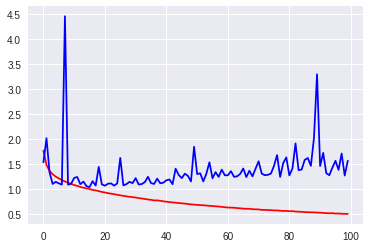

In [24]:
plt.plot(hist['loss'], 'red')
plt.plot(hist['val_loss'], 'blue')

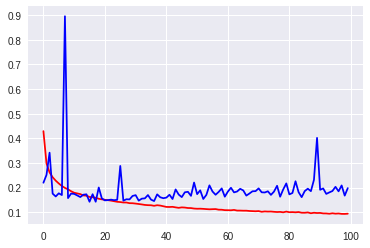

In [25]:
plt.plot(hist['gender_output_loss'], 'red')
plt.plot(hist['val_gender_output_loss'], 'blue')

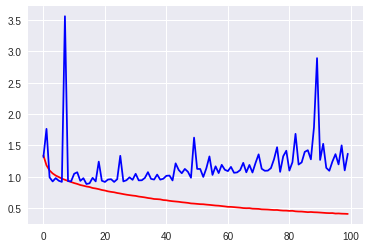

In [26]:
plt.plot(hist['age_output_loss'], 'red')
plt.plot(hist['val_age_output_loss'], 'blue')

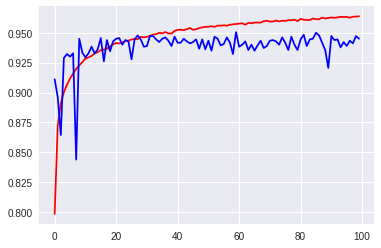

In [27]:
plt.plot(hist['gender_output_acc'], 'red')
plt.plot(hist['val_gender_output_acc'], 'blue')

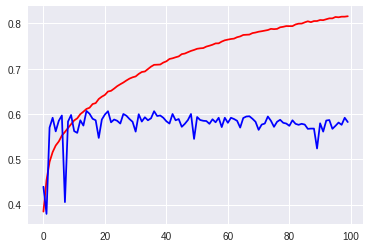

In [28]:
plt.plot(hist['age_output_acc'], 'red')
plt.plot(hist['val_age_output_acc'], 'blue')

In [0]:
model.save_weights('model-30-4-0.96-0.82.h5')

In [30]:
!ls -t

model-30-4-0.96-0.82.h5  data.tar.gz  datalab  MFIW_Dataset


In [33]:
# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'model-30-4-0.96-0.82.h5'})
uploaded.SetContentFile('/content/model-30-4-0.96-0.82.h5')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1oyqEFWENcnjOxDY6frWlbK6aMmKA2dN7
